<div style="font-variant: small-caps; 
      font-weight: normal; 
      font-size: 37px; 
      text-align: center; 
      padding: 15px; 
      margin: 10px;">
  Machine Learning<br>
  </div> 

<div style="font-variant: small-caps; 
      font-weight: normal; 
      font-size: 35px; 
      text-align: center; 
      padding: 15px; 
      margin: 10px;">
  -<br>
  </div> 
  
<div style="font-variant: small-caps; 
      font-weight: normal; 
      font-size: 35px; 
      text-align: center; 
      padding: 15px; 
      margin: 10px;">
      Illustration with Random Forests<br><br>
  </div> 

<div style="font-variant: small-caps; 
      font-weight: normal; 
      font-size: 25px; 
      text-align: center; 
      padding: 15px; 
      margin: 10px;">
      <font color=orange> Blue Book for Bulldozers </font>
  </div>

<div style="font-variant: small-caps; 
      font-weight: normal; 
      font-size: 20px; 
      text-align: center; 
      padding: 15px; 
      margin: 10px;">
      EM Lyon - spring 2021
  </div>

<a id="plan"></a>




### 1. Data Inspection

$\qquad \bullet$ [About the dataset and Kaggle](#about)<br>
$\qquad \bullet$ [Load the data](#load_data)<br>
$\qquad \bullet$ [Look at the data](#look_data)<br>
$\qquad \bullet$ [Look at the columns](#look_columns)<br>


### 2. Data Preprocessing

$\qquad \bullet$ [Variable to predict](#output_variable)<br>
$\qquad \bullet$ [Naive first model training](#naive_training)<br>
$\qquad \bullet$ [Convert date times](#convert_date)<br>
$\qquad \bullet$ [Convert strings into numerotated categories](#convert_strings)<br>
$\qquad \bullet$ [Inspect missing values](#nans)<br>
$\qquad \bullet$ [Save preprocessed data](#save_data)<br>
$\qquad \bullet$ [Fully numericalize data](#numericalize_data)<br>

### 3. Regression with Random Forests

$\qquad \bullet$ [Regression Model scoring, underfitting, overfitting](#model_scoring)<br>
$\qquad \bullet$ [Base model](#model_base)<br>
$\qquad \bullet$ [Decision Tree Regressor](#decision_tree)<br>
$\qquad \bullet$ [Tree bagging](#tree_bagging)<br>
$\qquad \bullet$ [OOB score](#oob_score)<br>
$\qquad \bullet$ [Stopping criteria](#tree_pruning)<br>
$\qquad \bullet$ [Data subsampling](#data_sampling)<br>
$\qquad \bullet$ [Feature subsampling](#feature_sampling)<br>
$\qquad \bullet$ [Bagging as general Ensemble method](#general_bagging)<br>
$\qquad \bullet$ [Cross validation](#cross_validation)<br>
$\qquad \bullet$ [Hyperparameter tuning for final model selection](#hyperparameter_tuning)<br>


### 4. Classification, and differences with Regression

$\qquad \bullet$ [Categorical target](#categorical_target)<br>
$\qquad \bullet$ [Decision Tree Classifier](#decision_tree_classifier)<br>
$\qquad \bullet$ [Random Forest Classifier](#random_forest_classifier)<br>
$\qquad \bullet$ [Evaluation criteria of binary classifiers](#binary_classifier_scoring)<br>
$\qquad \bullet$ [Dealing with imbalanced data 1 : Precision - Recall curve and threshold selection](#rec_prc_curve)<br>
$\qquad \bullet$ [Dealing with imbalanced data 2 : Class weights](#class_weight)<br>
$\qquad \bullet$ [Dealing with imbalanced data 3 : Model calibration](#model_calibration)<br>
$\qquad \bullet$ [Multiclass Classification](#multiclass_classification)<br>


### 5. Model Interpretation

$\qquad \bullet$ [Random Forest features importance](#RF_feature_importance)<br>
$\qquad \bullet$ [Permutation importance](#permutation_feature_importance)<br>
$\qquad \bullet$ [Feature correlations](#redundant_features)<br>
$\qquad \bullet$ [Individual feature explicability](#feature_explicability)<br>


### 6. Regression with XGBoost


[Bottom](#bottom)

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
# base modules
import os
import sys
import copy
import logging

# custom module
from emlyon_module.imports import *
from emlyon_module.structured import *

# for manipulating data
from pandas_summary import DataFrameSummary
#!pip install dill
import dill

# for Machine Learning
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.inspection import permutation_importance
from scipy.cluster import hierarchy

# for visualization
from IPython.display import display
from matplotlib import pyplot as plt
#!pip install -U plotnine
from plotnine import ggplot, aes
from plotnine.stats import stat_smooth
from pdpbox import pdp
# plotly
# seaborn
# altair

In [3]:
path_to_repo = os.path.dirname(os.getcwd())

path_to_bulldozers = os.path.join(path_to_repo, "data", "bulldozers", "")

In [4]:
path_to_bulldozers

'C:\\Users\\khara\\Documents\\EmLyon\\EMLyon-Machine-Learning-Course-main\\EMLyon-Machine-Learning-Course-main\\data\\bulldozers\\'

# 1. Data Inspection

<a id="about"></a>

### $\bullet$ About the dataset and Kaggle

[Back to top](#plan)

We will be looking at the Blue Book for Bulldozers Kaggle Competition: "The goal of the contest is to predict the sale price of a particular piece of heavy equiment at auction based on it's usage, equipment type, and configuration.  The data is sourced from auction result postings and includes information on usage and equipment configurations."

This is a very common type of dataset and prediciton problem, and similar to what you may see in your project or workplace.

Kaggle is an awesome resource for aspiring data scientists or anyone looking to improve their machine learning skills.  There is nothing like being able to get hands-on practice and receiving real-time feedback to help you improve your skills.

Kaggle provides:

1. Interesting data sets
2. Feedback on how you're doing
3. A leader board to see what's good, what's possible, and what's state-of-art.
4. Blog posts by winning contestants share useful tips and techniques.



Kaggle provides info about some of the fields of our dataset; on the [Kaggle Data info](https://www.kaggle.com/c/bluebook-for-bulldozers/data) page they say the following:

For this competition, you are predicting the sale price of bulldozers sold at auctions. The data for this competition is split into three parts:

- **Train.csv** is the training set, which contains data through the end of 2011.
- **Valid.csv** is the validation set, which contains data from January 1, 2012 - April 30, 2012. You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
- **Test.csv** is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

<a id="load_data"></a>

### $\bullet$ Import the data

[Back to top](#plan)

In [8]:
# chose one of the equivalent 
path_to_datasets = os.path.join(path_to_bulldozers, 'Train.csv')
print(path_to_datasets)

path_to_datasets = '{}Train.csv'.format(path_to_bulldozers)
print(path_to_datasets)

C:\Users\khara\Documents\EmLyon\EMLyon-Machine-Learning-Course-main\EMLyon-Machine-Learning-Course-main\data\bulldozers\Train.csv
C:\Users\khara\Documents\EmLyon\EMLyon-Machine-Learning-Course-main\EMLyon-Machine-Learning-Course-main\data\bulldozers\Train.csv


In [9]:
df_raw = pd.read_csv(path_to_datasets, low_memory = False, parse_dates = ["saledate"])

In [10]:
??pd.read_csv

<a id="look_data"></a>

### $\bullet$ Look at the data

[Back to top](#plan)

In any sort of data science work, it's **important to look at your data**, to make sure you understand the format, how it's stored, what type of values it holds, etc.<br> 
Even if you've read descriptions about your data, the actual data may not be what you expect.

The key fields that are in train.csv are:

- SalesID: the unique identifier of the sale
- MachineID: the unique identifier of a machine.  A machine can be sold multiple times
- saleprice: what the machine sold for at auction (only provided in train.csv)
- saledate: the date of the sale

In [11]:
# print the 5 first and last rows
df_raw

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401120,6333336,10500,1840702,21439,149,1.0,2005,NaN,NaN,2011-11-02,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401121,6333337,11000,1830472,21439,149,1.0,2005,NaN,NaN,2011-11-02,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401122,6333338,11500,1887659,21439,149,1.0,2005,NaN,NaN,2011-11-02,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401123,6333341,9000,1903570,21435,149,2.0,2005,NaN,NaN,2011-10-25,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [14]:
# print the first n rows (default is n = 5)
#df_raw.head(n = 3)
df_raw.head(10)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1139255,26500,1001274,4605,121,3.0,2004,508.0,Low,2008-12-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1139256,21000,772701,1937,121,3.0,1993,11540.0,High,2004-08-26,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
7,1139261,27000,902002,3539,121,3.0,2001,4883.0,High,2005-11-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1139272,21500,1036251,36003,121,3.0,2008,302.0,Low,2009-08-27,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
9,1139275,65000,1016474,3883,121,3.0,1000,20700.0,Medium,2007-08-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


In [15]:
help(df_raw.head)

Help on method head in module pandas.core.generic:

head(n:int=5) -> ~FrameOrSeries method of pandas.core.frame.DataFrame instance
    Return the first `n` rows.
    
    This function returns the first `n` rows for the object based
    on position. It is useful for quickly testing if your object
    has the right type of data in it.
    
    For negative values of `n`, this function returns all rows except
    the last `n` rows, equivalent to ``df[:-n]``.
    
    Parameters
    ----------
    n : int, default 5
        Number of rows to select.
    
    Returns
    -------
    same type as caller
        The first `n` rows of the caller object.
    
    See Also
    --------
    DataFrame.tail: Returns the last `n` rows.
    
    Examples
    --------
    >>> df = pd.DataFrame({'animal': ['alligator', 'bee', 'falcon', 'lion',
    ...                    'monkey', 'parrot', 'shark', 'whale', 'zebra']})
    >>> df
          animal
    0  alligator
    1        bee
    2     falcon
    3

<a id="look_columns"></a>

### $\bullet$ Look at the columns

[Back to top](#plan)

In [16]:
df_raw.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [17]:
len(df_raw.columns)

53

In [18]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   401125 non-null  int64         
 1   SalePrice                 401125 non-null  int64         
 2   MachineID                 401125 non-null  int64         
 3   ModelID                   401125 non-null  int64         
 4   datasource                401125 non-null  int64         
 5   auctioneerID              380989 non-null  float64       
 6   YearMade                  401125 non-null  int64         
 7   MachineHoursCurrentMeter  142765 non-null  float64       
 8   UsageBand                 69639 non-null   object        
 9   saledate                  401125 non-null  datetime64[ns]
 10  fiModelDesc               401125 non-null  object        
 11  fiBaseModel               401125 non-null  object        
 12  fi

In [19]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [20]:
df_raw.shape

(401125, 53)

In [21]:
display_all(df_raw.head().T)

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [22]:
display_all(df_raw.describe(include='all').T)

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
SalesID,401125,NaN,NaN,NaN,NaT,NaT,1.91971e+06,909021,1.13925e+06,1.41837e+06,1.63942e+06,2.24271e+06,6.33334e+06
SalePrice,401125,NaN,NaN,NaN,NaT,NaT,31099.7,23036.9,4750,14500,24000,40000,142000
MachineID,401125,NaN,NaN,NaN,NaT,NaT,1.2179e+06,440992,0,1.0887e+06,1.27949e+06,1.46807e+06,2.48633e+06
ModelID,401125,NaN,NaN,NaN,NaT,NaT,6889.7,6221.78,28,3259,4604,8724,37198
datasource,401125,NaN,NaN,NaN,NaT,NaT,134.666,8.96224,121,132,132,136,172
auctioneerID,380989,NaN,NaN,NaN,NaT,NaT,6.55604,16.9768,0,1,2,4,99
YearMade,401125,NaN,NaN,NaN,NaT,NaT,1899.16,291.797,1000,1985,1995,2000,2013
MachineHoursCurrentMeter,142765,NaN,NaN,NaN,NaT,NaT,3457.96,27590.3,0,0,0,3025,2.4833e+06
UsageBand,69639,3,Medium,33985,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,401125,3919,2009-02-16 00:00:00,1932,1989-01-17,2011-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Data Preprocessing

<a id="output_variable"></a>

### $\bullet$ Variable to predict

[Back to top](#plan)

The variable we want to predict is the sale price of a bulldozer, based on its description. This means that we seek to **predict** values within the _SalePrice_ column of the dataset, by using the other columns as **expainatory variables** for prediction.

It's important to note what metric is being used for a project. Generally, selecting the metric(s) is an important part of the project setup. However, in this case Kaggle tells us what metric to use: RMSLE (root mean squared log error) between the actual and predicted auction prices. Therefore we take the log of the prices, so that RMSE will give us what we need.

In [10]:
df_raw.SalePrice

0         66000
1         57000
2         10000
3         38500
4         11000
          ...  
401120    10500
401121    11000
401122    11500
401123     9000
401124     7750
Name: SalePrice, Length: 401125, dtype: int64

In [11]:
sale_prices = df_raw.SalePrice.tolist()

In [12]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

In [13]:
df_raw.SalePrice

0         11.097410
1         10.950807
2          9.210340
3         10.558414
4          9.305651
            ...    
401120     9.259131
401121     9.305651
401122     9.350102
401123     9.104980
401124     8.955448
Name: SalePrice, Length: 401125, dtype: float64

In [14]:
# same as 
# df_raw.SalePrice
df_raw['SalePrice']

0         11.097410
1         10.950807
2          9.210340
3         10.558414
4          9.305651
            ...    
401120     9.259131
401121     9.305651
401122     9.350102
401123     9.104980
401124     8.955448
Name: SalePrice, Length: 401125, dtype: float64

In [28]:
df_raw.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

<a id="naive_training"></a>

### $\bullet$ Naive first model training

[Back to top](#plan)

In [29]:
m = RandomForestRegressor(n_jobs=-1)

In [30]:
# The following code is supposed to fail due to string values in the input data
m.fit(df_raw.drop('SalePrice', axis = 1), df_raw.SalePrice)

ValueError: could not convert string to float: 'Low'

This dataset contains a mix of **continuous** and **categorical** variables.

The following method extracts particular date fields from a complete datetime for the purpose of constructing categoricals.  You should always consider this feature extraction step when working with date-time. Without expanding your date-time into these additional fields, you can't capture any trend/cyclical behavior as a function of time at any of these granularities.

<a id="convert_date"></a>

### $\bullet$ Convert date times

[Back to top](#plan)

In [31]:
df_raw.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [33]:
df_raw.saledate

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
401120   2011-11-02
401121   2011-11-02
401122   2011-11-02
401123   2011-10-25
401124   2011-10-25
Name: saledate, Length: 401125, dtype: datetime64[ns]

In [34]:
fld = df_raw.saledate

In [35]:
fld

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
401120   2011-11-02
401121   2011-11-02
401122   2011-11-02
401123   2011-10-25
401124   2011-10-25
Name: saledate, Length: 401125, dtype: datetime64[ns]

In [36]:
# date-time object, was created within the df with parse_dates=["saledate"]
fld.dt

In [37]:
help(add_datepart)

Help on function add_datepart in module emlyon_module.structured:

add_datepart(df, fldnames, drop=True, time=False, errors='raise')
    add_datepart converts a column of df from a datetime64 to many columns containing
    the information from the date. This applies changes inplace.
        
    Parameters:
    -----------
    df: A pandas data frame. df gain several new columns.
    fldname: A string or list of strings that is the name of the date column you wish to expand.
        If it is not a datetime64 series, it will be converted to one with pd.to_datetime.
    drop: If true then the original date column will be removed.
    time: If true time features: Hour, Minute, Second will be added.
    Examples:
    ---------
    >>> df = pd.DataFrame({ 'A' : pd.to_datetime(['3/11/2000', '3/12/2000', '3/13/2000'], infer_datetime_format=False) })
    >>> df
        A
    0   2000-03-11
    1   2000-03-12
    2   2000-03-13
    >>> add_datepart(df, 'A')
    >>> df
        AYear AMonth AWeek

In [38]:
??add_datepart

In [39]:
# exemple of utilisation of copy.deepcopy to avoid inplace operations
dicto = {'key' : 0}

def modifyDict(python_dict: dict):
    dict_copy = copy.deepcopy(python_dict)
    dict_copy['key2'] = 1
    return dict_copy

dicto2 = modifyDict(dicto)

print(dicto2)

{'key': 0, 'key2': 1}


In [45]:
dicto = {'key' : 0}
dicto1 = dicto

In [46]:
print(dicto)
print(dicto1)

{'key': 0}
{'key': 0}


In [47]:
dicto['key1'] = 2

In [48]:
print(dicto)
print(dicto1)

{'key': 0, 'key1': 2}
{'key': 0, 'key1': 2}


In [49]:
dicto2 = copy.deepcopy(dicto)

In [50]:
dicto2['key2'] = 3

In [51]:
print(dicto)
print(dicto2)

{'key': 0, 'key1': 2}
{'key': 0, 'key1': 2, 'key2': 3}


In [40]:
df_backup = copy.deepcopy(df_raw)

In [41]:
# add_datepart adds new columns to the dataframe, INPLACE
add_datepart(df_raw, 'saledate')

In [42]:
# comparaison of dataframe shape before & after applying add_datepart
print(df_backup.shape)
print(df_raw.shape)

(401125, 53)
(401125, 65)


In [31]:
df_raw.saleYear.head()

0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int64

In [53]:
df_raw.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',


In [55]:
df_raw.saleElapsed

0         1163635200
1         1080259200
2         1077753600
3         1305763200
4         1248307200
             ...    
401120    1320192000
401121    1320192000
401122    1320192000
401123    1319500800
401124    1319500800
Name: saleElapsed, Length: 401125, dtype: int64

In [56]:
len(df_raw.columns)

65

<a id="convert_strings"></a>

### $\bullet$ Convert strings into numerotated categories

[Back to top](#plan)

The categorical variables are currently stored as strings, which is inefficient, and doesn't provide the numeric coding required for a random forest. Therefore we call `train_cats` to convert strings to pandas categories.

In [57]:
help(train_cats)

Help on function train_cats in module emlyon_module.structured:

train_cats(df)
    Change any columns of strings in a panda's dataframe to a column of
    categorical values. This applies the changes inplace.
    Parameters:
    -----------
    df: A pandas dataframe. Any columns of strings will be changed to
        categorical values.
    Examples:
    ---------
    >>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    note the type of col2 is string
    >>> train_cats(df)
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    now the type of col2 is category



In [58]:
??train_cats

In [59]:
train_cats(df_raw)

We can specify the order to use for categorical variables if we wish:

In [60]:
df_raw.UsageBand

0            Low
1            Low
2           High
3           High
4         Medium
           ...  
401120       NaN
401121       NaN
401122       NaN
401123       NaN
401124       NaN
Name: UsageBand, Length: 401125, dtype: category
Categories (3, object): ['High' < 'Low' < 'Medium']

In [61]:
df_raw.UsageBand.cat.categories.tolist()

['High', 'Low', 'Medium']

In [62]:
df_raw.UsageBand.cat.set_categories(['Low', 'Medium', 'High'], ordered=True, inplace=True)

In [63]:
df_raw.UsageBand.cat.categories.tolist()

['Low', 'Medium', 'High']

Normally, pandas will continue displaying the text categories, while treating them as numerical data internally. Optionally, we can replace the text categories with numbers, which will make this variable non-categorical, like so:.

In [64]:
df_raw.UsageBand

0            Low
1            Low
2           High
3           High
4         Medium
           ...  
401120       NaN
401121       NaN
401122       NaN
401123       NaN
401124       NaN
Name: UsageBand, Length: 401125, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [65]:
df_raw.UsageBand.cat.categories

Index(['Low', 'Medium', 'High'], dtype='object')

In [67]:
df_raw.UsageBand.cat.codes

0         0
1         0
2         2
3         2
4         1
         ..
401120   -1
401121   -1
401122   -1
401123   -1
401124   -1
Length: 401125, dtype: int8

In [68]:
# This step overwrites the raw categories with integers
df_raw.UsageBand = df_raw.UsageBand.cat.codes

In [69]:
# - values corresponds to NaN values in the original column
df_raw.UsageBand

0         0
1         0
2         2
3         2
4         1
         ..
401120   -1
401121   -1
401122   -1
401123   -1
401124   -1
Name: UsageBand, Length: 401125, dtype: int8

<a id="nans"></a>

### $\bullet$ Inspect missing values

[Back to top](#plan)

We're still not quite done - for instance we have lots of missing values, which we can't pass directly to a random forest.

In [70]:
df_raw.isnull().describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
count,401125,401125,401125,401125,401125,401125,401125,401125,401125,401125,...,401125,401125,401125,401125,401125,401125,401125,401125,401125,401125
unique,1,1,1,1,1,2,1,2,1,1,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,401125,401125,401125,401125,401125,380989,401125,258360,401125,401125,...,401125,401125,401125,401125,401125,401125,401125,401125,401125,401125


In [71]:
display_all(df_raw.isnull().describe().T)

,count,unique,top,freq
SalesID,401125,1,False,401125
SalePrice,401125,1,False,401125
MachineID,401125,1,False,401125
ModelID,401125,1,False,401125
datasource,401125,1,False,401125
auctioneerID,401125,2,False,380989
YearMade,401125,1,False,401125
MachineHoursCurrentMeter,401125,2,True,258360
UsageBand,401125,1,False,401125
fiModelDesc,401125,1,False,401125


In [36]:
# display amount of missing values per column :
# column name              ratio of nans
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

NameError: name 'display_all' is not defined

In [72]:
# display amount of missing values per column :
# column name              ratio of nans
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

Backhoe_Mounting            0.803872
Blade_Extension             0.937129
Blade_Type                  0.800977
Blade_Width                 0.937129
Coupler                     0.466620
Coupler_System              0.891660
Differential_Type           0.826959
Drive_System                0.739829
Enclosure                   0.000810
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Forks                       0.521154
Grouser_Tracks              0.891899
Grouser_Type                0.752813
Hydraulics                  0.200823
Hydraulics_Flow             0.891899
MachineHoursCurrentMeter    0.644089
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.802720
Pattern_Changer             0.752651
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.525460
Pushblock                   0.937129
Ride_Control                0.629527
Ripper                      0.740388
S

<a id="save_data"></a>

### $\bullet$ Save preprocessed data

[Back to top](#plan)

But let's save this file for now, since it's already in format can we be stored and accessed efficiently.

In [73]:
path_to_tmp = os.path.join(path_to_repo, "data", "tmp")

In [74]:
path_to_tmp

'C:\\Users\\khara\\Documents\\EmLyon\\EMLyon-Machine-Learning-Course-main\\EMLyon-Machine-Learning-Course-main\\data\\tmp'

In [75]:
os.makedirs(path_to_tmp, exist_ok = True)

In [76]:
path_to_bulldozers_raw = os.path.join(path_to_tmp, 'bulldozers-raw')

In [77]:
path_to_bulldozers_raw

'C:\\Users\\khara\\Documents\\EmLyon\\EMLyon-Machine-Learning-Course-main\\EMLyon-Machine-Learning-Course-main\\data\\tmp\\bulldozers-raw'

In [78]:
# 18 MB
df_raw.to_feather(path_to_bulldozers_raw)

In [79]:
# 140 MB !!
df_raw.to_csv(path_to_bulldozers_raw + '.csv', index = False)

In [80]:
help(df_raw.to_csv)

Help on method to_csv in module pandas.core.generic:

to_csv(path_or_buf:Union[str, pathlib.Path, IO[~AnyStr], NoneType]=None, sep:str=',', na_rep:str='', float_format:Union[str, NoneType]=None, columns:Union[Sequence[collections.abc.Hashable], NoneType]=None, header:Union[bool, List[str]]=True, index:bool=True, index_label:Union[bool, str, Sequence[collections.abc.Hashable], NoneType]=None, mode:str='w', encoding:Union[str, NoneType]=None, compression:Union[str, Mapping[str, str], NoneType]='infer', quoting:Union[int, NoneType]=None, quotechar:str='"', line_terminator:Union[str, NoneType]=None, chunksize:Union[int, NoneType]=None, date_format:Union[str, NoneType]=None, doublequote:bool=True, escapechar:Union[str, NoneType]=None, decimal:Union[str, NoneType]='.', errors:str='strict') -> Union[str, NoneType] method of pandas.core.frame.DataFrame instance
    Write object to a comma-separated values (csv) file.
    
    .. versionchanged:: 0.24.0
        The order of arguments for Series

<a id="numericalize_data"></a>

### $\bullet$ Fully numericalize data

[Back to top](#plan)

In the future we can simply read it from this fast format.

In [15]:
path_to_bulldozers_raw = os.path.join(path_to_repo, 'data', 'tmp', 'bulldozers-raw')

df_raw = pd.read_feather(path_to_bulldozers_raw)
# or
#df_raw = pd.read_csv(path_to_bulldozers_raw + '.csv', low_memory = False)

We'll replace categories with their numeric codes, handle missing continuous values, and split the dependent variable into a separate variable.

In [5]:
help(proc_df)

Help on function proc_df in module emlyon_module.structured:

proc_df(df, y_fld=None, skip_flds=None, ignore_flds=None, do_scale=False, na_dict=None, preproc_fn=None, max_n_cat=None, subset=None, mapper=None)
    proc_df takes a data frame df and splits off the response variable, and
    changes the df into an entirely numeric dataframe. For each column of df 
    which is not in skip_flds nor in ignore_flds, na values are replaced by the
    median value of the column.
    Parameters:
    -----------
    df: The data frame you wish to process.
    y_fld: The name of the response variable
    skip_flds: A list of fields that dropped from df.
    ignore_flds: A list of fields that are ignored during processing.
    do_scale: Standardizes each column in df. Takes Boolean Values(True,False)
    na_dict: a dictionary of na columns to add. Na columns are also added if there
        are any missing values.
    preproc_fn: A function that gets applied to df.
    max_n_cat: The maximum number 

In [7]:
help(pd.Categorical)

Help on class Categorical in module pandas.core.arrays.categorical:

class Categorical(pandas.core.arrays._mixins.NDArrayBackedExtensionArray, pandas.core.base.PandasObject)
 |  Represent a categorical variable in classic R / S-plus fashion.
 |  
 |  `Categoricals` can only take on only a limited, and usually fixed, number
 |  of possible values (`categories`). In contrast to statistical categorical
 |  variables, a `Categorical` might have an order, but numerical operations
 |  (additions, divisions, ...) are not possible.
 |  
 |  All values of the `Categorical` are either in `categories` or `np.nan`.
 |  Assigning values outside of `categories` will raise a `ValueError`. Order
 |  is defined by the order of the `categories`, not lexical order of the
 |  values.
 |  
 |  Parameters
 |  ----------
 |  values : list-like
 |      The values of the categorical. If categories are given, values not in
 |      categories will be replaced with NaN.
 |  categories : Index-like (unique), optio

In [12]:
help(pd.get_dummies)

Help on function get_dummies in module pandas.core.reshape.reshape:

get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None) -> 'DataFrame'
    Convert categorical variable into dummy/indicator variables.
    
    Parameters
    ----------
    data : array-like, Series, or DataFrame
        Data of which to get dummy indicators.
    prefix : str, list of str, or dict of str, default None
        String to append DataFrame column names.
        Pass a list with length equal to the number of columns
        when calling get_dummies on a DataFrame. Alternatively, `prefix`
        can be a dictionary mapping column names to prefixes.
    prefix_sep : str, default '_'
        If appending prefix, separator/delimiter to use. Or pass a
        list or dictionary as with `prefix`.
    dummy_na : bool, default False
        Add a column to indicate NaNs, if False NaNs are ignored.
    columns : list-like, default None
        Colu

In [86]:
??proc_df

In [14]:
??fix_missing

In [15]:
??numericalize

In [16]:
df, y, nas = proc_df(df_raw, 'SalePrice')

In [17]:
print(nas)

{'auctioneerID': 2.0, 'MachineHoursCurrentMeter': 0.0}


In [10]:
df.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor',
       'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup',
       'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type',
       'Ride_Control', 'Stick', 'Transmission', 'Turbocharged',
       'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower',
       'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control',
       'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks',
       'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width',
       'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type',
       'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',
       'saleI

In [18]:
df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
0,1139246,999089,3157,121,3.0,2004,68.0,0,950,296,...,320,False,False,False,False,False,False,1163635200,False,False
1,1139248,117657,77,121,3.0,1996,4640.0,0,1725,527,...,86,False,False,False,False,False,False,1080259200,False,False
2,1139249,434808,7009,121,3.0,2001,2838.0,2,331,110,...,57,False,False,False,False,False,False,1077753600,False,False
3,1139251,1026470,332,121,3.0,2001,3486.0,2,3674,1375,...,139,False,False,False,False,False,False,1305763200,False,False
4,1139253,1057373,17311,121,3.0,2007,722.0,1,4208,1529,...,204,False,False,False,False,False,False,1248307200,False,False


We now have something we can pass to a random forest!

# 3. Random Forests

[Back to top](#plan)

<a id='model_scoring'></a>

### $\bullet$ Regression Model scoring, underfitting, overfitting

[Back to top](#plan)

In [19]:
# define the path to dataset
path_to_dataset = os.path.join(path_to_repo, "data", 'tmp', 'bulldozers-raw')
print(path_to_dataset)

# import raw data
df_raw = pd.read_feather(path_to_dataset)

# preprocess data
df, y, nas = proc_df(df_raw, 'SalePrice')

C:\Users\khara\Documents\EmLyon\EMLyon-Machine-Learning-Course-main\EMLyon-Machine-Learning-Course-main\data\tmp\bulldozers-raw


In [20]:
model = RandomForestRegressor(n_estimators = 20, n_jobs = -1, random_state = 42)

%time model.fit(df, y)
model.score(df, y)

Wall time: 37.7 s


0.9858691789949682

In statistics, the coefficient of determination, denoted R2 or r2 and pronounced "R squared", is the proportion of the variance in the dependent variable that is predictable from the independent variable(s). https://en.wikipedia.org/wiki/Coefficient_of_determination

Wow, an r^2 of 0.98 - that's great, right? Well, perhaps not...

Possibly **the most important idea** in machine learning is that of having separate training & validation data sets. As motivation, suppose you don't divide up your data, but instead use all of it.  And suppose you have lots of parameters:

<img src="img/underfitting_overfitting.png" alt="" style="width: 70%"/>
<center>
[Underfitting and Overfitting](https://datascience.stackexchange.com/questions/361/when-is-a-model-underfitted)
</center>

The error for the pictured data points is lowest for the model on the far right (the blue curve passes through the red points almost perfectly), yet it's not the best choice.  Why is that?  If you were to gather some new data points, they most likely would not be on that curve in the graph on the right, but would be closer to the curve in the middle graph.

This illustrates how using all our data can lead to **overfitting**. A validation set helps diagnose this problem.

In [19]:
def split_vals(df, n): 
    return df[:n].copy(), df[n:].copy()

In [20]:
n_total = len(df)
n_valid = 12000  # same as Kaggle's test set size
n_train = n_total - n_valid
n_small = 20000

print('full number of data points : {}'.format(n_total))
print('number of validation data points : {}'.format(n_valid))
print('number of training data points : {}'.format(n_train))
print('number of subsampled training points : {}'.format(n_small))

full number of data points : 401125
number of validation data points : 12000
number of training data points : 389125
number of subsampled training points : 20000


In [21]:
X_train, X_valid = split_vals(df, n_train)
y_train, y_valid = split_vals(y, n_train)

X_small, _ = split_vals(df, n_small)
y_small, _ = split_vals(y, n_small)

print('Number of small training data points: X = {}, y = {}'.format(X_small.shape, y_small.shape))
print('Number of full training data points: X = {}, y = {}'.format(X_train.shape, y_train.shape))
print('Number of validation data points: X = {}, y = {}'.format(X_valid.shape, y_valid.shape))

Number of small training data points: X = (20000, 66), y = (20000,)
Number of full training data points: X = (389125, 66), y = (389125,)
Number of validation data points: X = (12000, 66), y = (12000,)


<a id='model_base'></a>

### $\bullet$ Base model

[Back to top](#plan)

Let's try our model again, this time with separate training and validation sets.

In [23]:
def rmse(y_gold, y_pred): 
    return math.sqrt(((y_gold - y_pred)**2).mean())

In [17]:
def print_score(m, X_train, y_train, X_valid, y_valid):
    print('RMSE on train set: {:.4f}'.format(rmse(m.predict(X_train), y_train)))
    print('RMSE on valid set: {:.4f}'.format(rmse(m.predict(X_valid), y_valid)))
    print('R^2 on train set: {:.4f}'.format(m.score(X_train, y_train)))
    print('R^2 on valid set: {:.4f}'.format(m.score(X_valid, y_valid)))
    if hasattr(m, 'oob_score_'): print('R^2 on oob set: {:.4f}'.format(m.oob_score_))
    return

In [26]:
# model on small training data
base_model = RandomForestRegressor(n_estimators = 10, n_jobs = -1, random_state = 42)

%time base_model.fit(X_small, y_small)
print_score(base_model, X_small, y_small, X_valid, y_valid)

Wall time: 759 ms
RMSE on train set: 0.1044
RMSE on valid set: 0.3404
R^2 on train set: 0.9780
R^2 on valid set: 0.7931


In [22]:
# model on full training data
base_model = RandomForestRegressor(n_estimators = 10, n_jobs = -1, random_state = 42)

%time base_model.fit(X_train, y_train)
print_score(base_model, X_train, y_train, X_valid, y_valid)

Wall time: 30.6 s
RMSE on train set: 0.0906
RMSE on valid set: 0.2480
R^2 on train set: 0.9828
R^2 on valid set: 0.8901


An r^2 in the high-80's isn't bad at all (and the RMSLE puts us around rank 100 of 470 on the Kaggle leaderboard), but we can see from the validation set score that we're over-fitting badly. To understand this issue, let's simplify things down to a single small tree.

<a id="decision_tree"></a>

### $\bullet$ Decision Tree Regressor

[Back to top](#plan)


Let us describe the process of construction of a single decision tree, over a dataset $\mathcal{D}_1$ described by two explanatory variables $X_1$ and $X_2$ and an output variable $Y$ :<br>

| $X^1$ | $X^2$ | $Y$ |
|-----|-----|-----|
| $x^1_1$ | $x^2_1$ | $y_1$ |
| $x^1_2$ | $x^2_2$ | $y_2$ |
| $x^1_3$ | $x^2_3$ | $y_3$ |



#### 1. Splitting process

The decision tree will first split the dataset $\mathcal{D}_1$ into two sub-datasets $\mathcal{D}_2$ and $\mathcal{D}_3$, by choosing a variable among the explanatory variables (let's say $X^1$) and a separation threshold $d_1$ for this variable. The way of selecting a variable and a threshold is detailed in the *Splitting Strategy* paragraph below.<br> Such choice divides the dataset $\mathcal{D}_1$ into <br>

$$\mathcal{D}_2 = \displaystyle \lbrace  (x^1, x^2, y) \in \mathcal{D}_1 \, | \, x^1 \leqslant d_1 \rbrace \qquad \qquad \mathcal{D}_3 = \{ (x^1, x^2, y) \in \mathcal{D}_1 \, | \, x^1 > d_1 \}$$

<img src="img/decision_tree_1_.png" alt="" style="width: 50%"/>

If the tree construction would stop here, the resulting decision tree $\mathcal{T}$ is a prediction model that associates, to any new data point $(o^1, o^2)$, the value accoring to the following two cases : if $o^1 \leqslant d_1$, then $\mathcal{T}(o^1, o^2)$ is the average values of the output values among the $\mathcal{D}_2$ subset, whereas if $o^1 > d_1$, then $\mathcal{T}(o^1, o^2)$ is the average values of the output values among the $\mathcal{D}_3$ subset.<br>
This is more formally written as :

$$ \mathcal{T}(o^1, o^2) = 
\begin{cases}
\displaystyle \frac{1}{\vert \mathcal{D}_2 \vert } \sum _{(x^1, x^2, y) \, \in \, \mathcal{D}_2} y & \text{if } o^1 \leqslant d_1 \\
\displaystyle \frac{1}{\vert \mathcal{D}_3 \vert} \sum _{(x^1, x^2, y) \, \in \, \mathcal{D}_3} y & \text{if } o^1 > d_1\\
\end{cases}
$$


Actually the tree does not stop here in general, but implement subsequent splittings as detained in the *Recurrence process* paragraph below.


#### 2. Splitting Strategy

The splitting strategy depends on the choice of a measure of *Heterogeneity* of a set of output values. For decision tree regression, the heterogeneity of a set $Y = \{ y_1, y_2, y_3, ...\}$ of real values (i.e. floating numbers) is taken as its variance $Var(Y)$ :

$$ \overline{Y} = \frac{1}{\vert Y \vert}\displaystyle \sum _{y\, \in \, Y} y \qquad \qquad Var(Y) = \frac{1}{\vert Y \vert}\displaystyle \sum _{y\, \in \, Y} ( y - \overline{Y} ) ^2$$


It is a heterogeneity measure as the more the set $Y$ is concentrated around a single value (e.g. its average) then the less the variance is.<br>

Now that the homogeneity of a set has been defined, the splitting strategy consists in chosing, given a set of data $\mathcal{D}$, a variable $X^*$ among $X^1$ and $X^2$ as well as a threshold $d^*$ that minimizes, among the possible variables and thresholds, the summed heterogeneity

$$
H(\mathcal{D}, X^i, d) =  Var(\lbrace y \, | \, (x^1, x^2, y) \in \mathcal{D}, \;  x^i \leqslant d \rbrace) +  Var(\lbrace y \, | \, (x^1, x^2, y) \in \mathcal{D}, \;  x^i > d \rbrace)
$$

This quantity is the variance which is obtained by splitting the dataset along the $X^*$ variable about the threshold $d^*$, and the resulting best choice is the one that minimizes this variance.


#### 3. Recurrence process

The full decision tree is built by _iterating_ the splitting process : If the splitting strategy yields a first decision along a variable $X^1$ with threshold $d_1$, yielding two sub-datasets $\mathcal{D}_2$ and $\mathcal{D}_3$, then the same splitting strategy is performed on $\mathcal{D}_2$ and $\mathcal{D}_3$ independently. The process stops when the splitting strategy does not find any candidate variable and threshold over any of the sub-datasets obtained so far.<br>

As an illustration, let us suppose that, after the first splitting step descrived earlier, that the splitting strategy finds no splitting on $\mathcal{D}_3$ and a splitting of $\mathcal{D}_2$ according to the variable $X^2$ and threshold $d_2$, yielding 

$$\mathcal{D}_4 = \displaystyle \lbrace  (x^1, x^2, y) \in \mathcal{D}_2 \, | \, x^2 \leqslant d_2 \rbrace \qquad \qquad \mathcal{D}_5 = \{ (x^1, x^2, y) \in \mathcal{D}_2 \, | \, x^2 > d_2 \}$$

Suppose moreover that a third step yields a splitting of $\mathcal{D}_5$ according to the variable $X^1$ and threshold $d_3$, yielding 

$$\mathcal{D}_6 = \displaystyle \lbrace  (x^1, x^2, y) \in \mathcal{D}_5 \, | \, x^1 \leqslant d_3 \rbrace \qquad \qquad \mathcal{D}_7 = \{ (x^1, x^2, y) \in \mathcal{D}_5 \, | \, x^1 > d_3 \}$$

Then the resulting decision tree can be pictured as follows :

<img src="img/decision_tree_3.png" alt="" style="width: 50%"/>


The resulting prediction model $\mathcal{T}$ is then given by the following function on a new data point $(o^1, o^2)$ :

$$ \mathcal{T}(o^1, o^2) = 
\begin{cases}
\displaystyle \frac{1}{\vert \mathcal{D}_3 \vert} \sum _{(x^1, x^2, y) \, \in \, \mathcal{D}_3} y & \text{if } o^1 > d_1\\
\displaystyle \frac{1}{\vert \mathcal{D}_4 \vert} \sum _{(x^1, x^2, y) \, \in \, \mathcal{D}_4} y & \text{if } o^1 \leqslant d_1 \text{ and } o^2 \leqslant d_2 \\
\displaystyle \frac{1}{\vert \mathcal{D}_6 \vert} \sum _{(x^1, x^2, y) \, \in \, \mathcal{D}_6} y & \text{if } o^1 \leqslant d_1 \text{ and } o^2 > d_2 \text{ and } o^1 \leqslant d_3 \\
\displaystyle \frac{1}{\vert \mathcal{D}_7 \vert} \sum _{(x^1, x^2, y) \, \in \, \mathcal{D}_7} y & \text{if } o^1 \leqslant d_1 \text{ and } o^2 > d_2 \text{ and } o^1 > d_3 \\
\end{cases}
$$


#### Final remarks 

- A single splitting step consists in finding the best splits *for each subsample where splitting is possible*. 
- When looking at an optimal choice of splitting, *all variables are systematically used* even if they were selected in a revious splitting.
- The splitting of a subsample stops when it contains a single data point, or when a certain *stopping criterion has been reached*, which prevents any subsequent splitting.

**Option 1**: Using _sklearn.tree.DecisionTreeRegressor_

In [27]:
model_dt = DecisionTreeRegressor(
    criterion = 'mse', # 'mse', 
    splitter = 'best', 
    max_depth = 3, # None
    min_samples_split = 2, 
    min_samples_leaf = 1,
    min_weight_fraction_leaf = 0.0, 
    max_features = 'auto', 
    max_leaf_nodes = None, 
    min_impurity_decrease = 0.0, 
    min_impurity_split = None,  
    ccp_alpha = 0.0,
    random_state = 42, # None, 
)

In [28]:
%time model_dt.fit(X_small, y_small)
print_score(model_dt, X_small, y_small, X_valid, y_valid)

Wall time: 162 ms
RMSE on train set: 0.4966
RMSE on valid set: 0.5247
R^2 on train set: 0.5015
R^2 on valid set: 0.5084


[Text(1743.75, 1981.875, 'X[37] <= 0.5\nmse = 0.495\nsamples = 20000\nvalue = 10.189'),
 Text(871.875, 1415.625, 'X[19] <= 2.0\nmse = 0.414\nsamples = 16815\nvalue = 10.345'),
 Text(435.9375, 849.375, 'X[2] <= 4573.0\nmse = 0.331\nsamples = 4400\nvalue = 9.955'),
 Text(217.96875, 283.125, 'mse = 0.315\nsamples = 2002\nvalue = 10.226'),
 Text(653.90625, 283.125, 'mse = 0.232\nsamples = 2398\nvalue = 9.728'),
 Text(1307.8125, 849.375, 'X[19] <= 4.5\nmse = 0.37\nsamples = 12415\nvalue = 10.484'),
 Text(1089.84375, 283.125, 'mse = 0.29\nsamples = 7193\nvalue = 10.736'),
 Text(1525.78125, 283.125, 'mse = 0.272\nsamples = 5222\nvalue = 10.137'),
 Text(2615.625, 1415.625, 'X[5] <= 1999.5\nmse = 0.109\nsamples = 3185\nvalue = 9.363'),
 Text(2179.6875, 849.375, 'X[14] <= 40.5\nmse = 0.101\nsamples = 468\nvalue = 8.988'),
 Text(1961.71875, 283.125, 'mse = 0.069\nsamples = 293\nvalue = 8.896'),
 Text(2397.65625, 283.125, 'mse = 0.118\nsamples = 175\nvalue = 9.143'),
 Text(3051.5625, 849.375, 'X[6

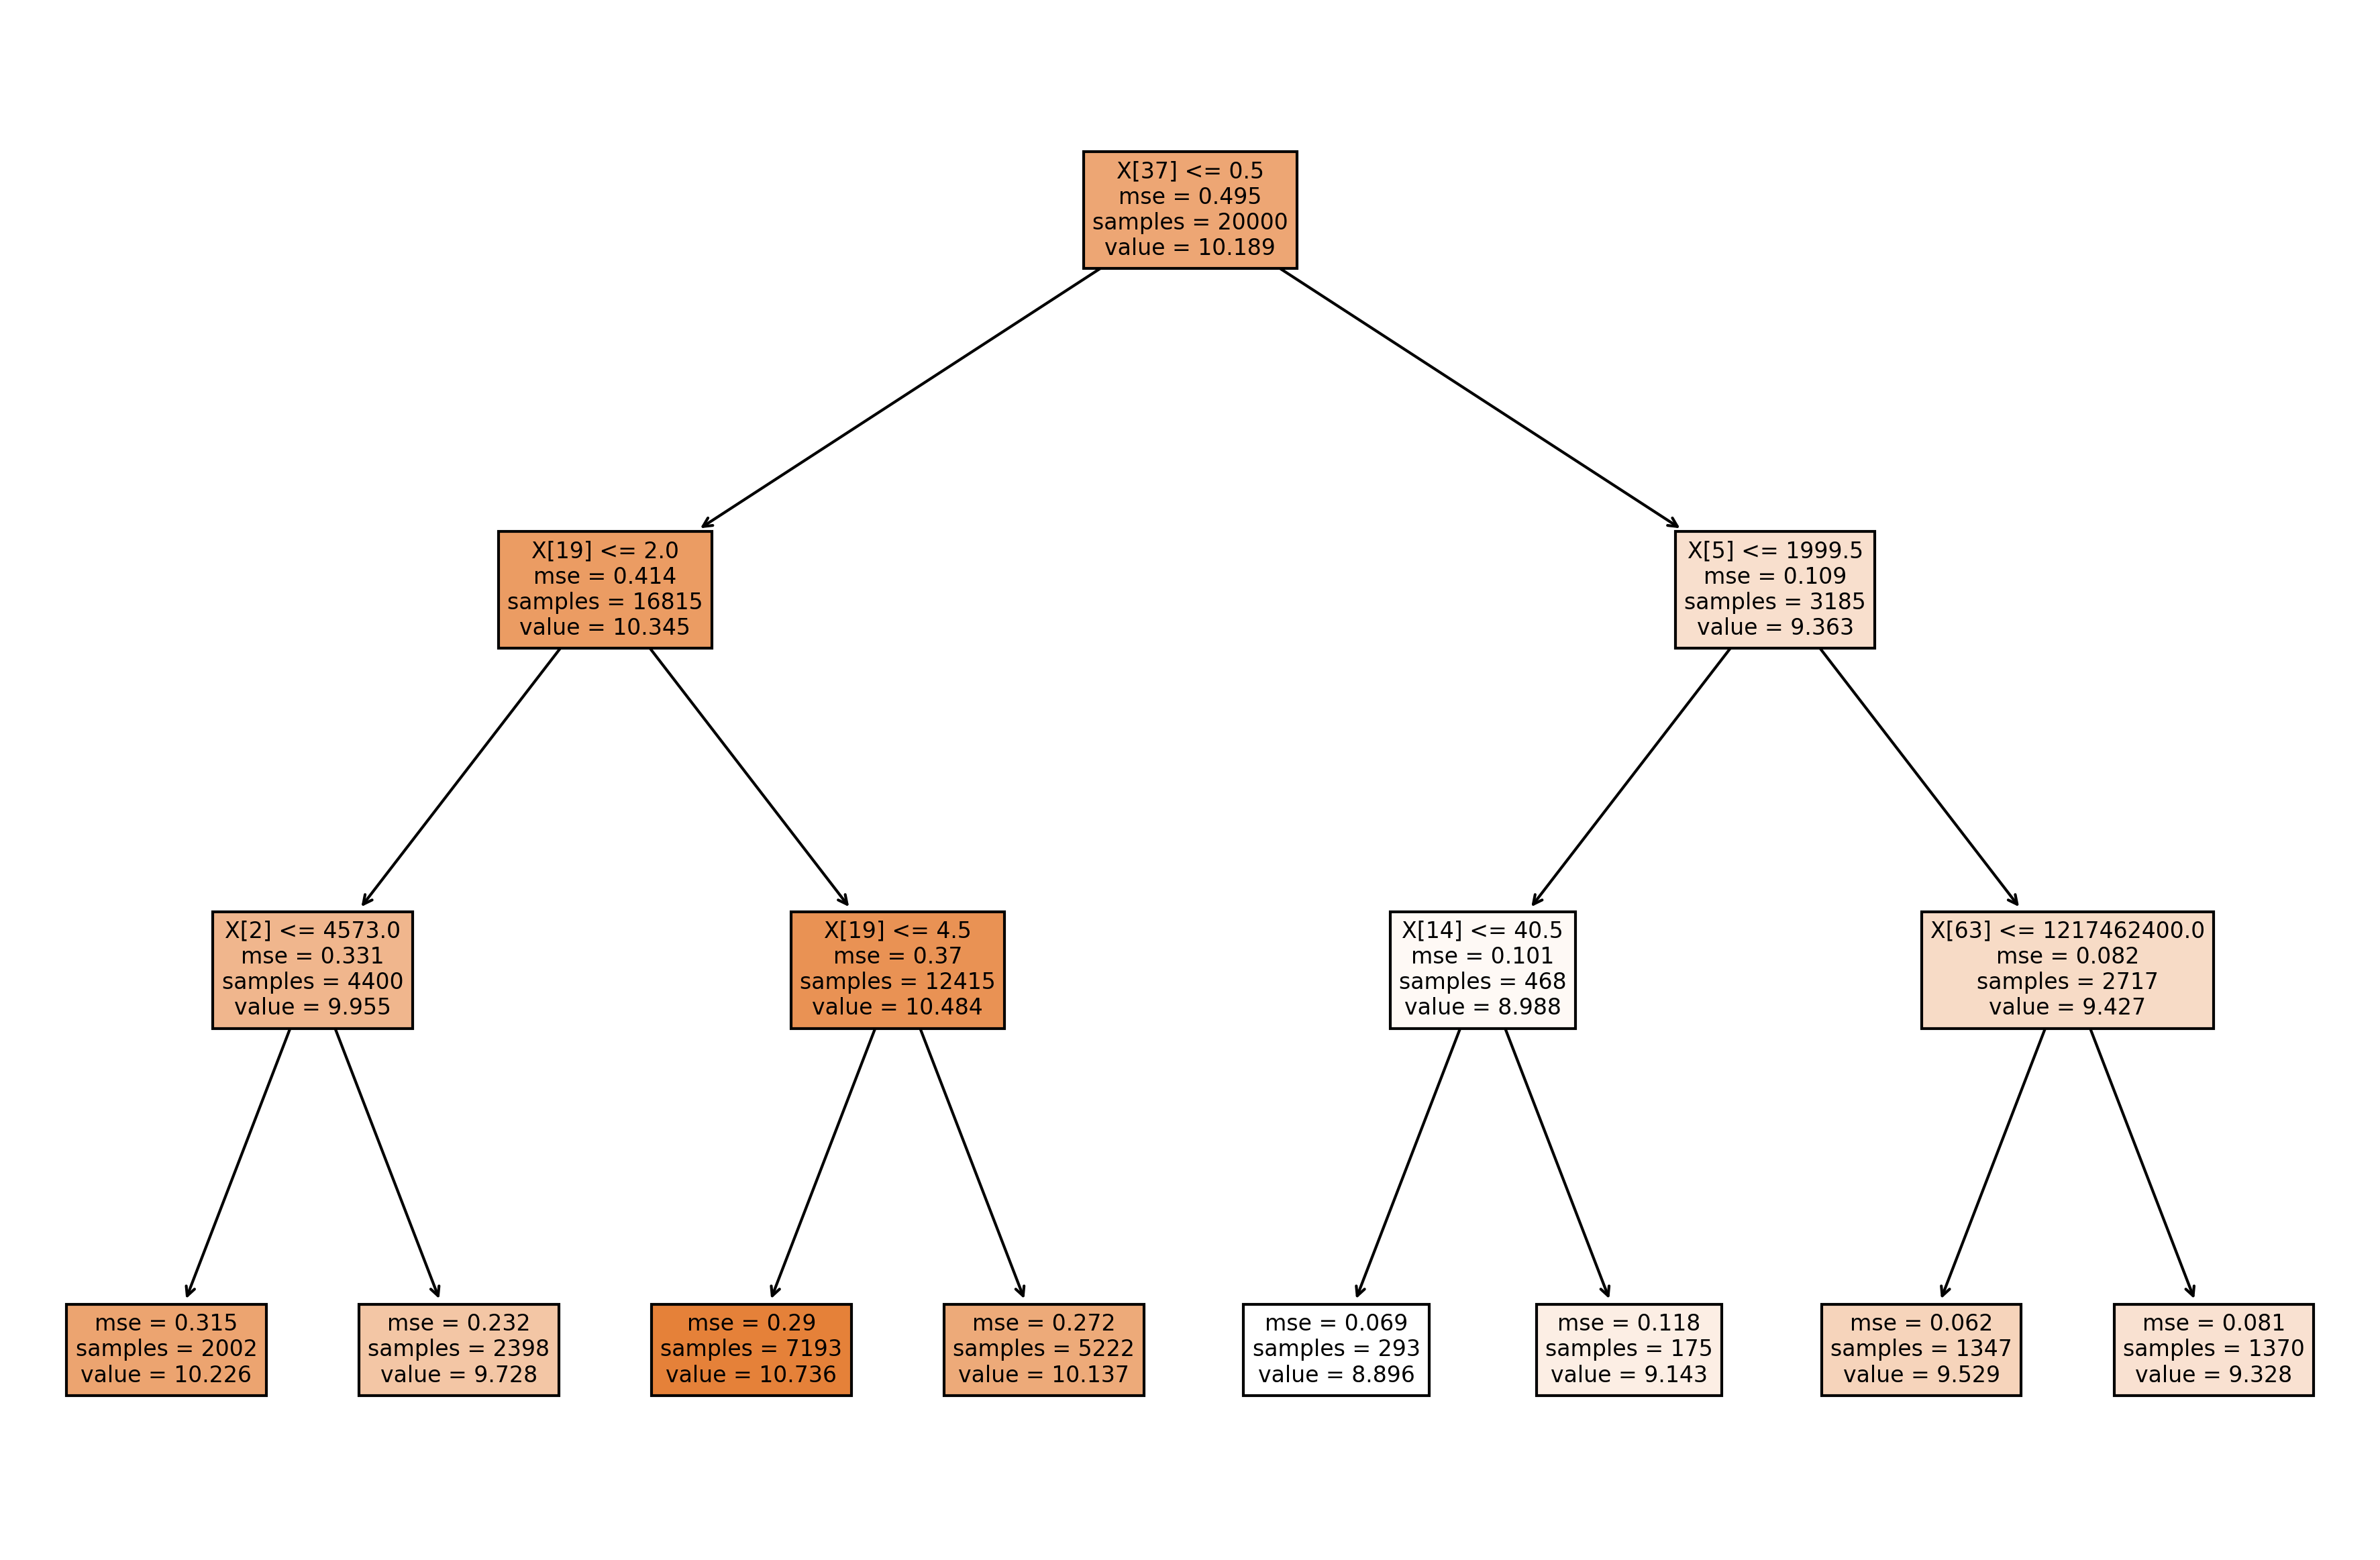

In [29]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (15, 10), dpi = 300)
plot_tree(model_dt, filled = True)

In [46]:
draw_tree(model_dt, X_small, precision = 3)

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

**Option 2**: Using _sklearn.ensemble.RandomForestRegressor_

In [31]:
model_rf = RandomForestRegressor(
    # parameters shared with DecisionTreeRegressor
    n_estimators = 1, # 100 # 1 = the model is a single tree
    criterion = 'mse', 
    max_depth = 3, # None
    min_samples_split = 2, 
    min_samples_leaf = 1,
    min_weight_fraction_leaf = 0.0, 
    max_features = 'auto', 
    max_leaf_nodes = None, 
    min_impurity_decrease = 0.0, 
    min_impurity_split = None, 
    ccp_alpha = 0.0, 
    random_state = 42, # None, 
    
    # RandomForestRegressor specific hyperparameters
    bootstrap = False, # default = True 
    oob_score = False, 
    max_samples = None,

    # extra parameters
    warm_start = False, 
    n_jobs = -1, # None 
    verbose = 0, 
)

In [32]:
%time model_rf.fit(X_small, y_small)
print_score(model_rf, X_small, y_small, X_valid, y_valid)

Wall time: 184 ms
RMSE on train set: 0.4966
RMSE on valid set: 0.5247
R^2 on train set: 0.5015
R^2 on valid set: 0.5084


In [37]:
model_rf2 = RandomForestRegressor(
    # parameters shared with DecisionTreeRegressor
    n_estimators = 1, # 100 # 1 = the model is a single tree
    criterion = 'mse', 
    max_depth = 3, # None
    min_samples_split = 2, 
    min_samples_leaf = 1,
    min_weight_fraction_leaf = 0.0, 
    max_features = 'auto', 
    max_leaf_nodes = None, 
    min_impurity_decrease = 0.0, 
    min_impurity_split = None, 
    ccp_alpha = 0.0, 
    random_state = 42, # None, 
    
    # RandomForestRegressor specific hyperparameters
    bootstrap = False, # default = True 
    oob_score = False, 
    max_samples = None,

    # extra parameters
    warm_start = False, 
    n_jobs = -1, # None 
    verbose = 0, 
)

%time model_rf2.fit(X_small, y_small)
print_score(model_rf2, X_small, y_small, X_valid, y_valid)

Wall time: 177 ms
RMSE on train set: 0.4966
RMSE on valid set: 0.5247
R^2 on train set: 0.5015
R^2 on valid set: 0.5084


In [38]:
# first install graphviz source files, see:
# https://forum.graphviz.org/t/new-simplified-installation-procedure-on-windows/224#abbreviated-installation-instructions-recommended-for-users-with-installation-experience

draw_tree(model_rf.estimators_[0], X_small, precision = 3)

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [39]:
X_small.fiProductClassDesc

0        59
1        62
2        39
3         8
4        40
         ..
19995    67
19996    61
19997    27
19998    62
19999    35
Name: fiProductClassDesc, Length: 20000, dtype: int8

In [40]:
df_raw.fiProductClassDesc.tolist()[:50]

['Wheel Loader - 110.0 to 120.0 Horsepower',
 'Wheel Loader - 150.0 to 175.0 Horsepower',
 'Skid Steer Loader - 1351.0 to 1601.0 Lb Operating Capacity',
 'Hydraulic Excavator, Track - 12.0 to 14.0 Metric Tons',
 'Skid Steer Loader - 1601.0 to 1751.0 Lb Operating Capacity',
 'Backhoe Loader - 14.0 to 15.0 Ft Standard Digging Depth',
 'Hydraulic Excavator, Track - 21.0 to 24.0 Metric Tons',
 'Backhoe Loader - 14.0 to 15.0 Ft Standard Digging Depth',
 'Hydraulic Excavator, Track - 3.0 to 4.0 Metric Tons',
 'Wheel Loader - 350.0 to 500.0 Horsepower',
 'Backhoe Loader - 14.0 to 15.0 Ft Standard Digging Depth',
 'Track Type Tractor, Dozer - 20.0 to 75.0 Horsepower',
 'Hydraulic Excavator, Track - 19.0 to 21.0 Metric Tons',
 'Backhoe Loader - 14.0 to 15.0 Ft Standard Digging Depth',
 'Backhoe Loader - 14.0 to 15.0 Ft Standard Digging Depth',
 'Backhoe Loader - 14.0 to 15.0 Ft Standard Digging Depth',
 'Hydraulic Excavator, Track - 3.0 to 4.0 Metric Tons',
 'Hydraulic Excavator, Track - 4.0 to

Let's see what happens if we create a bigger tree.

In [41]:
model_dt = DecisionTreeRegressor(
    criterion = 'mse', # 'mse', 
    splitter = 'best', 
    max_depth = None,
    min_samples_split = 2, 
    min_samples_leaf = 1,
    min_weight_fraction_leaf = 0.0, 
    max_features = 'auto', 
    max_leaf_nodes = None, 
    min_impurity_decrease = 0.0, 
    min_impurity_split = None, 
    random_state = 42, # None,  
    ccp_alpha = 0.0, 
)

In [42]:
model_dt.fit(X_small, y_small)
print_score(model_dt, X_small, y_small, X_valid, y_valid)

RMSE on train set: 0.0000
RMSE on valid set: 0.4664
R^2 on train set: 1.0000
R^2 on valid set: 0.6116


<a id="tree_bagging"></a>

### $\bullet$ Tree bagging

[Back to top](#plan)

The training set result looks great! But the validation set is worse than our original model. This is why we need to use *bagging* of multiple trees to get more generalizable results. To learn about bagging in random forests, let's start with our basic model again.<br>

By the way, Bagging is the reduction of __B__oostrap **Agg**regation.

In [50]:
base_model = RandomForestRegressor(n_estimators = 10, n_jobs = -1, random_state = 42)

%time base_model.fit(X_small, y_small)
print_score(base_model, X_small, y_small, X_valid, y_valid)

Wall time: 822 ms
RMSE on train set: 0.1044
RMSE on valid set: 0.3404
R^2 on train set: 0.9780
R^2 on valid set: 0.7931


In [48]:
base_model = RandomForestRegressor(n_estimators = 10, max_depth = 15, min_samples_split = 15, n_jobs = -1, random_state = 42)

%time base_model.fit(X_small, y_small)
print_score(base_model, X_small, y_small, X_valid, y_valid)

Wall time: 729 ms
RMSE on train set: 0.1749
RMSE on valid set: 0.3326
R^2 on train set: 0.9382
R^2 on valid set: 0.8024


In [51]:
base_model = RandomForestRegressor(n_estimators = 10, n_jobs = -1, random_state = 42)

%time base_model.fit(X_train, y_train)
print_score(base_model, X_train, y_train, X_valid, y_valid)

Wall time: 19.9 s
RMSE on train set: 0.0906
RMSE on valid set: 0.2480
R^2 on train set: 0.9828
R^2 on valid set: 0.8901


In [52]:
point = X_valid.iloc[0,:]
print(point)

price = y_valid[0]
print(price, np.exp(price))

SalesID                           4364751
MachineID                         2300944
ModelID                               665
datasource                            172
auctioneerID                            1
                                  ...    
saleIs_year_end                     False
saleIs_year_start                   False
saleElapsed                    1284595200
auctioneerID_na                     False
MachineHoursCurrentMeter_na         False
Name: 389125, Length: 66, dtype: object
9.104979856318357 9000.000000000004


In [53]:
# the model makes prediction with model.predict method
# base_model.predict

# predict takes a list as input, so we turn our single point as a list (with a single element)
base_model.predict([point])

# the model returns a list, so we take the first element, and apply exponetial
np.exp(base_model.predict([point])[0])

9876.605598569762

We'll grab the predictions for each individual tree, and look at one example.

In [54]:
# model prediction on single data point
trees = base_model
point = [X_valid.iloc[0, :]]
pred = trees.predict(point)

print('Type:', type(pred))
print('Shape:', pred.shape)
print('Value:', np.exp(pred[0]))

Type: <class 'numpy.ndarray'>
Shape: (1,)
Value: 9876.605598569762


In [55]:
# first tree prediction on single data point
tree = base_model.estimators_[0] # chose between 0 and 9 since we have 10 estimators
point = [X_valid.iloc[0, :]]     # tree.predict takes an iterable of data points as input
pred = tree.predict(point)       # tree.predict returns a numpy tensor of predictions as output

print('Type:', type(pred))
print('Shape:', pred.shape)
print('Value:', np.exp(pred[0]))

Type: <class 'numpy.ndarray'>
Shape: (1,)
Value: 9600.000000000004


In [56]:
# first tree prediction on single data point
tree = base_model.estimators_[1] # chose between 0 and 9 since we have 10 estimators
point = [X_valid.iloc[0, :]]     # tree.predict takes an iterable of data points as input
pred = tree.predict(point)       # tree.predict returns a numpy tensor of predictions as output

print('Type:', type(pred))
print('Shape:', pred.shape)
print('Value:', np.exp(pred[0]))

Type: <class 'numpy.ndarray'>
Shape: (1,)
Value: 22000.0


In [57]:
# all tree predictions on single data point
trees = base_model.estimators_
point = [X_valid.iloc[0, :]]
preds = np.asarray([tree.predict(point) for tree in trees])

print('Type:', type(preds))
print('Shape:', preds.shape)
print('Value:', np.exp(preds))

Type: <class 'numpy.ndarray'>
Shape: (10, 1)
Value: [[ 9600.]
 [22000.]
 [ 9500.]
 [ 7750.]
 [10000.]
 [ 9000.]
 [ 8500.]
 [10000.]
 [ 9000.]
 [ 8250.]]


In [58]:
# all tree predictions on all data
preds = np.stack([tree.predict(X_valid) for tree in base_model.estimators_]) # or np.asarray()

# predictions of the 10 trees, mean, and actual value (for first point in validation set)
preds.shape, preds[:,0], np.mean(preds[:,0]), y_valid[0]

((10, 12000),
 array([9.16952, 9.9988 , 9.15905, 8.95545, 9.21034, 9.10498, 9.04782, 9.21034, 9.10498, 9.01797]),
 9.197924168812863,
 9.104979856318357)

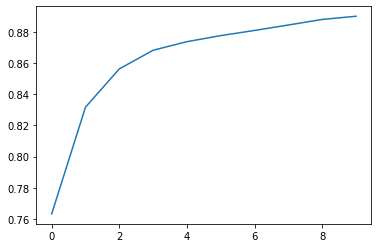

In [59]:
plt.plot([
    metrics.r2_score(y_valid, np.mean(preds[:num_trees], axis = 0)) 
    for num_trees in range(1, 11)
])

The shape of this curve suggests that adding more trees isn't going to help us much. Let's check. (Compare this to our original model on a sample)

In [60]:
model = RandomForestRegressor(n_estimators = 20, n_jobs = -1, random_state = 42)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

Wall time: 1.29 s
RMSE on train set: 0.0945
RMSE on valid set: 0.3323
R^2 on train set: 0.9820
R^2 on valid set: 0.8027


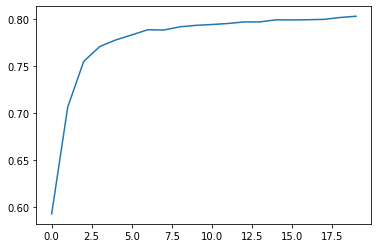

In [61]:
# all tree predictions on all data
preds = np.stack([tree.predict(X_valid) for tree in model.estimators_]) # or np.asarray()

# predictions of the 10 trees, mean, and actual value (for first point in validation set)
preds.shape, preds[:,0], np.mean(preds[:,0]), y_valid[0]

plt.plot([
    metrics.r2_score(y_valid, np.mean(preds[:num_trees], axis = 0)) 
    for num_trees in range(1, 21)
])

In [62]:
model = RandomForestRegressor(n_estimators = 30, n_jobs = -1, random_state = 42)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

Wall time: 1.76 s
RMSE on train set: 0.0915
RMSE on valid set: 0.3285
R^2 on train set: 0.9831
R^2 on valid set: 0.8073


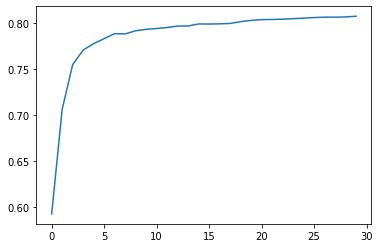

In [63]:
# all tree predictions on all data
preds = np.stack([tree.predict(X_valid) for tree in model.estimators_]) # or np.asarray()

# predictions of the 10 trees, mean, and actual value (for first point in validation set)
preds.shape, preds[:,0], np.mean(preds[:,0]), y_valid[0]

plt.plot([
    metrics.r2_score(y_valid, np.mean(preds[:num_trees], axis = 0)) 
    for num_trees in range(1, 31)
])

In [64]:
model = RandomForestRegressor(n_estimators = 40, n_jobs = -1, random_state = 42)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

Wall time: 2.39 s
RMSE on train set: 0.0895
RMSE on valid set: 0.3250
R^2 on train set: 0.9838
R^2 on valid set: 0.8113


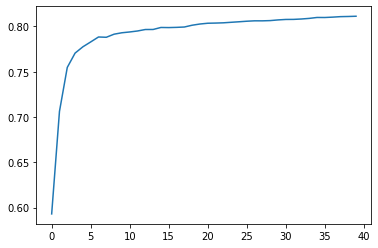

In [65]:
# all tree predictions on all data
preds = np.stack([tree.predict(X_valid) for tree in model.estimators_]) # or np.asarray()

# predictions of the 10 trees, mean, and actual value (for first point in validation set)
preds.shape, preds[:,0], np.mean(preds[:,0]), y_valid[0]

plt.plot([
    metrics.r2_score(y_valid, np.mean(preds[:num_trees], axis = 0)) 
    for num_trees in range(1, 41)
])

In [66]:
model = RandomForestRegressor(n_estimators = 40,  max_depth = 15, min_samples_split = 15, n_jobs = -1, random_state = 42)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

Wall time: 1.61 s
RMSE on train set: 0.1676
RMSE on valid set: 0.3215
R^2 on train set: 0.9432
R^2 on valid set: 0.8154


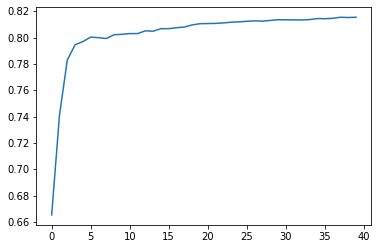

In [67]:
# all tree predictions on all data
preds = np.stack([tree.predict(X_valid) for tree in model.estimators_]) # or np.asarray()

# predictions of the 10 trees, mean, and actual value (for first point in validation set)
preds.shape, preds[:,0], np.mean(preds[:,0]), y_valid[0]

plt.plot([
    metrics.r2_score(y_valid, np.mean(preds[:num_trees], axis = 0)) 
    for num_trees in range(1, 41)
])

In [68]:
model = RandomForestRegressor(n_estimators = 200, n_jobs = -1, random_state = 42)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

Wall time: 10.1 s
RMSE on train set: 0.0852
RMSE on valid set: 0.3193
R^2 on train set: 0.9853
R^2 on valid set: 0.8180


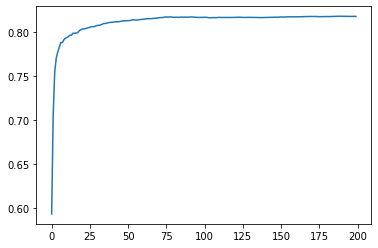

In [69]:
# all tree predictions on all data
preds = np.stack([tree.predict(X_valid) for tree in model.estimators_]) # or np.asarray()

# predictions of the 10 trees, mean, and actual value (for first point in validation set)
preds.shape, preds[:,0], np.mean(preds[:,0]), y_valid[0]

plt.plot([
    metrics.r2_score(y_valid, np.mean(preds[:num_trees], axis = 0)) 
    for num_trees in range(1, 201)
])

In [70]:
model = RandomForestRegressor(n_estimators = 200, max_depth = 15, min_samples_split = 15,  n_jobs = -1, random_state = 42)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

Wall time: 6.95 s
RMSE on train set: 0.1658
RMSE on valid set: 0.3176
R^2 on train set: 0.9445
R^2 on valid set: 0.8198


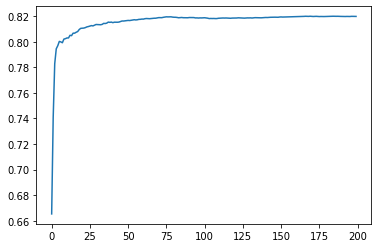

In [71]:
# all tree predictions on all data
preds = np.stack([tree.predict(X_valid) for tree in model.estimators_]) # or np.asarray()

# predictions of the 10 trees, mean, and actual value (for first point in validation set)
preds.shape, preds[:,0], np.mean(preds[:,0]), y_valid[0]

plt.plot([
    metrics.r2_score(y_valid, np.mean(preds[:num_trees], axis = 0)) 
    for num_trees in range(1, 201)
])

<a id='oob_score'></a>

### $\bullet$ Out-of-bag (OOB) score

[Back to top](#plan)

Is our validation set worse than our training set because we're over-fitting, or because the validation set is for a different time period, or a bit of both? With the existing information we've shown, we can't tell. However, random forests have a very clever trick called *out-of-bag (OOB) error* which can handle this (and more!)

The idea is to calculate error on the training set, but only include the trees in the calculation of a row's error where that row was *not* included in training that tree. This allows us to see whether the model is over-fitting, without needing a separate validation set.

This also has the benefit of allowing us to see whether our model generalizes, even if we only have a small amount of data so want to avoid separating some out to create a validation set.

This is as simple as adding one more parameter to our model constructor. We print the OOB error last in our `print_score` function below.

In [72]:
model = RandomForestRegressor(
    n_estimators = 40, 
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = None,
)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

Wall time: 2.3 s
RMSE on train set: 0.0895
RMSE on valid set: 0.3250
R^2 on train set: 0.9838
R^2 on valid set: 0.8113
R^2 on oob set: 0.8829


Bagging trick :

| -| Tree 1  | Tree 2 |
|-----|-----|-----|
|Data 1 | (2 times) | - |
|Data 2  | (1 time) |(2 times) |
|Data 3 | - |(1 time) |

$$
R^2 \text{ on train set } > R^2 \text{ on oob set } \implies \text{ The model is overfitting} \\ 
R^2 \text{ on oob set } > R^2 \text{ on valid set } \implies \text{ Training / Validation sets carry differences} \\
$$

In [92]:
model = RandomForestRegressor(
    n_estimators = 40, 
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = None,
)

%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_valid, y_valid)

Wall time: 1min 16s
RMSE on train set: 0.0785
RMSE on valid set: 0.2361
R^2 on train set: 0.9871
R^2 on valid set: 0.9005
R^2 on oob set: 0.9084


<a id='tree_pruning'></a>

### $\bullet$ Stopping criteria

[Back to top](#plan)

A way to reduce over-fitting is to grow our trees less deeply. We do this by specifying (with `min_samples_leaf` and `min_samples_split`) that we require some minimum number of rows in every leaf node. This has two benefits:

- There are less decision rules for each leaf node; simpler models should generalize better
- The predictions are made by averaging more rows in the leaf node, resulting in less volatility

In [129]:
def decision_tree_max_depth(tree):
    children_left = tree.children_left
    children_right = tree.children_right

    def walk(node_id):
        if (children_left[node_id] != children_right[node_id]):
            left_max = 1 + walk(children_left[node_id])
            right_max = 1 + walk(children_right[node_id])
            return max(left_max, right_max)
        else: # leaf
            return 0

    root_node_id = 0
    return walk(root_node_id)

Baseline model

In [130]:
model = RandomForestRegressor(
    n_estimators = 40, 
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = None,
)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

Wall time: 3.44 s
RMSE on train set: 0.0895
RMSE on valid set: 0.3250
R^2 on train set: 0.9838
R^2 on valid set: 0.8113
R^2 on oob set: 0.8829


In [131]:
tree = model.estimators_[0].tree_

decision_tree_max_depth(tree)

34

In [97]:
print(model.estimators_[0].tree_.children_left[0])
print(model.estimators_[0].tree_.children_right[0])
print(model.estimators_[0].tree_.children_left[1])
print(model.estimators_[0].tree_.children_right[1])
print(model.estimators_[0].tree_.children_left[19466])
print(model.estimators_[0].tree_.children_right[19466])


1
19466
2
5145
19467
19780


In [132]:
model.estimators_[0].get_depth()

34

In [101]:
model = RandomForestRegressor(
    n_estimators = 40, 
    min_samples_split = 15,
    min_samples_leaf = 15,
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = None,
)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

Wall time: 1.63 s
RMSE on train set: 0.2201
RMSE on valid set: 0.3288
R^2 on train set: 0.9021
R^2 on valid set: 0.8069
R^2 on oob set: 0.8640


In [102]:
tree = model.estimators_[0].tree_

decision_tree_max_depth(tree)

21

<a id='data_sampling'></a>

### $\bullet$ Data subsampling

[Back to top](#plan)

It turns out that one of the easiest ways to avoid over-fitting is also one of the best ways to speed up analysis: *subsampling*.<br>

**Let's return to using our full dataset**, so that we can demonstrate the impact of this technique.<br>

The basic idea is this: rather than limit the total amount of data that our model can access, let's instead limit it to a *different* random subset per tree. That way, given enough trees, the model can still see *all* the data, but for each individual tree it'll be just as fast as if we had cut down our dataset as before.

In [100]:
model = RandomForestRegressor(
    n_estimators = 40,
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = None,
)

%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_valid, y_valid)

Wall time: 1min 12s
RMSE on train set: 0.0785
RMSE on valid set: 0.2361
R^2 on train set: 0.9871
R^2 on valid set: 0.9005
R^2 on oob set: 0.9084


In [103]:
model = RandomForestRegressor(
    n_estimators = 40,
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = 0.15, # default = None,
)

%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_valid, y_valid)

Wall time: 23.5 s
RMSE on train set: 0.1910
RMSE on valid set: 0.2466
R^2 on train set: 0.9237
R^2 on valid set: 0.8914
R^2 on oob set: 0.8975


In [104]:
model = RandomForestRegressor(
    n_estimators = 200,
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = 0.15, # default = None,
)

%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_valid, y_valid)

Wall time: 1min 53s
RMSE on train set: 0.1876
RMSE on valid set: 0.2427
R^2 on train set: 0.9265
R^2 on valid set: 0.8948
R^2 on oob set: 0.9008


<a id='feature_sampling'></a>

### $\bullet$ Feature subsampling

[Back to top](#plan)

We can also increase the amount of variation amongst the trees by not only use a sample of rows for each tree, but to also using a sample of *columns* for each *split*. We do this by specifying `max_features`, which is the proportion of features to randomly select from at each split.

- None
- 0.5
- 'sqrt'

In [108]:
model = RandomForestRegressor(
    n_estimators = 40,
    #max_features = 0.5, # default = 'auto'/None
    max_features = None,
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = None,
)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

Wall time: 2.52 s
RMSE on train set: 0.0895
RMSE on valid set: 0.3250
R^2 on train set: 0.9838
R^2 on valid set: 0.8113
R^2 on oob set: 0.8829


In [106]:
model = RandomForestRegressor(
    n_estimators = 40,
    max_features = 0.5, # default = 'auto'/None
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = None,
)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

Wall time: 1.39 s
RMSE on train set: 0.0872
RMSE on valid set: 0.3246
R^2 on train set: 0.9846
R^2 on valid set: 0.8118
R^2 on oob set: 0.8890


In [109]:
model = RandomForestRegressor(
    n_estimators = 40,
    max_features = 0.5, # default = 'auto'/None
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = None,
)

%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_valid, y_valid)

Wall time: 41.9 s
RMSE on train set: 0.0770
RMSE on valid set: 0.2284
R^2 on train set: 0.9876
R^2 on valid set: 0.9068
R^2 on oob set: 0.9120


In [110]:
model = RandomForestRegressor(
    n_estimators = 40,
    max_features = None, # default = 'auto'/None
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = None,
)

%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_valid, y_valid)

Wall time: 1min 14s
RMSE on train set: 0.0785
RMSE on valid set: 0.2361
R^2 on train set: 0.9871
R^2 on valid set: 0.9005
R^2 on oob set: 0.9084


In [115]:
model = RandomForestRegressor(
    n_estimators = 40,
    max_features = 'sqrt',
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = None,
)

%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_valid, y_valid)

Wall time: 16.8 s
RMSE on train set: 0.0819
RMSE on valid set: 0.2583
R^2 on train set: 0.9860
R^2 on valid set: 0.8809
R^2 on oob set: 0.9002


Let us plot the oob error as a function of the number of trees, for some feature sampling euristics (see [sklearn documentation](http://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html))

<img src="img/oob_error_rates.png" alt="" style="width: 100%"/>

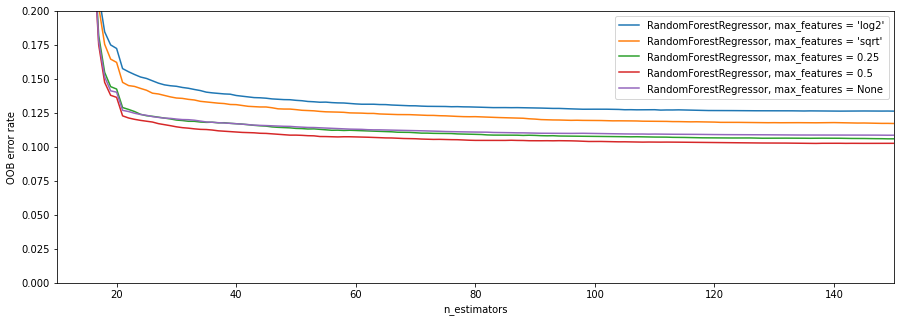

In [116]:
logging.info('warn')

# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    ("RandomForestRegressor, max_features = 'log2'",
        RandomForestRegressor(
            warm_start = True, 
            oob_score = True,
            max_features = "log2",
            random_state = 42)),
    ("RandomForestRegressor, max_features = 'sqrt'",
        RandomForestRegressor(
            warm_start = True, 
            oob_score = True,
            max_features = "sqrt",
            random_state = 42)),
    ("RandomForestRegressor, max_features = 0.25",
        RandomForestRegressor(
            warm_start = True, 
            oob_score = True,
            max_features = 0.25,
            random_state = 42)),
    ("RandomForestRegressor, max_features = 0.5",
        RandomForestRegressor(
            warm_start = True, 
            oob_score = True,
            max_features = 0.5,
            random_state = 42)),
    ("RandomForestRegressor, max_features = None",
        RandomForestRegressor(
            warm_start = True, 
            oob_score = True,
            max_features = None,
            random_state = 42)),
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 10
max_estimators = 150

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators = i)
        clf.fit(X_small, y_small)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
plt.figure(figsize = (15, 5))
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label = label)

# Show the plot
plt.xlim(min_estimators, max_estimators)
plt.ylim(0., 0.2)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc = "upper right")
plt.show()

#### Combining all together

In [117]:
model = RandomForestRegressor(
    n_estimators = 100,
    min_samples_split = 10,
    max_features = 0.5, # default = 'auto'/None
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = 0.75, # default = None,
)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

Wall time: 2.79 s
RMSE on train set: 0.1472
RMSE on valid set: 0.3220
R^2 on train set: 0.9562
R^2 on valid set: 0.8149
R^2 on oob set: 0.8914


In [118]:
model = RandomForestRegressor(
    n_estimators = 100,
    min_samples_split = 15,
    max_features = 0.75, # default = 'auto'/None
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = 0.75, # default = None,
)

%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_valid, y_valid)

Wall time: 1min 50s
RMSE on train set: 0.1436
RMSE on valid set: 0.2297
R^2 on train set: 0.9569
R^2 on valid set: 0.9058
R^2 on oob set: 0.9128


In [23]:
model = RandomForestRegressor(
    n_estimators = 150,
    min_samples_split = 10,
    max_features = 0.5, # default = 'auto'/None
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = 0.75, # default = None,
)

%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_valid, y_valid)

Wall time: 3min 1s
RMSE on train set: 0.1307
RMSE on valid set: 0.2284
R^2 on train set: 0.9643
R^2 on valid set: 0.9068
R^2 on oob set: 0.9150


In [122]:
# save model on disk
path_to_model = os.path.join(path_to_repo, 'app Streamlit', 'saves', 'RF_regressor.pk')
with open(path_to_model, 'wb') as file:
    dill.dump(model, file) 

<a id='general_bagging'></a>

### $\bullet$ Bagging as general Ensemble method

[Back to top](#plan)

The Bagging (Bootstrap Aggregation) strategy does not need to be applied to trees only, it can be applied to many different base models. This is done using the `BaggingRegressor` meta-model.<br>

A model generated with `RandomForestRegressor` is almost identical to a model instanciated from `BaggingRegressor`over a base `DecisionTreeRegressor`, with two differences:
- It has its own implementation, making it faster for training
- The feature sampling is _different at every tree node_ (when used)

The 2nd aspect does not hold for models instanciated with `BaggingRegressor`, where feature sampling is done _once and for all_ for each tree at instanciation.

In [123]:
# native Random Forest
model = RandomForestRegressor(
    n_estimators = 100,
    min_samples_split = 2,
    max_features = 0.5, # default = 'auto'/None
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = None,
)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

Wall time: 4.47 s
RMSE on train set: 0.0837
RMSE on valid set: 0.3221
R^2 on train set: 0.9858
R^2 on valid set: 0.8147
R^2 on oob set: 0.8959


In [ ]:
# Random Forest built using the Bagging meta-model
base_model = DecisionTreeRegressor(
    criterion = 'mse', # 'mse', 
    splitter = 'best', 
    max_depth = None,
    min_samples_split = 2, 
    min_samples_leaf = 1,
    min_weight_fraction_leaf = 0.0, 
    max_features = 'auto', 
    max_leaf_nodes = None, 
    min_impurity_decrease = 0.0, 
    min_impurity_split = None,  
    ccp_alpha = 0.0,
    random_state = 42, # None, 
)

model = BaggingRegressor(
    base_estimator = base_model, 
    n_estimators = 100, 

    max_features = 0.5, 
    max_samples = 1.0, 
    
    bootstrap = True, 
    bootstrap_features = False, 
    oob_score = True, 
    
    warm_start = False, 
    n_jobs = -1, 
    random_state = 42, 
    verbose = 0,
)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

<a id='cross_validation'></a>

### $\bullet$ Cross validation

[Back to top](#plan)

Random Forests, and more generally Bagging models, come natively with the computation of an out-of-bag score. Non-ensemblist methods does not come with such score, and an alternative is to consider a **Cross validation score**. This score can be computationally expensive, but does not waste too much data (as is the case when fixing an arbitrary validation set).

In $k$-fold CV, the training set is split into $k$ smaller sets (by default $k$ consecutive evenly-sized splits, with $k=5$). The following procedure is followed for each of the $k$ “folds”:

- A model is trained using $k-1$ of the folds as training data;
- the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute the model's `score` method).

The performance measure reported by $k$-fold cross-validation is then the average of the values computed in the loop. 


<img src="img/cross_valid.png" alt="" style="width: 40%"/>
<center>
Cross validation
</center>

See the [scikitlearn documentation](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)

This score is dependant on some parameters, such as the number $k$ of folds. Cross validation is also useful for Random Forests when performing **hyperparameter tuning**, addressed in next paragraph.

In [124]:
# native Random Forest
model = RandomForestRegressor(
    n_estimators = 100,
    min_samples_split = 2,
    max_features = None, # default = 'auto'/None
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = None,
)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

Wall time: 5.78 s
RMSE on train set: 0.0861
RMSE on valid set: 0.3201
R^2 on train set: 0.9850
R^2 on valid set: 0.8170
R^2 on oob set: 0.8900


In [125]:
# default is cv = 5
scores = cross_val_score(model, X_small, y_small, cv = 8, n_jobs = -1)

print(scores)
print("r2 is {:.3f} with a standard deviation of {:.3f}".format(scores.mean(), scores.std()))

[0.87733 0.88688 0.89353 0.88831 0.87542 0.87583 0.87314 0.84653]
r2 is 0.877 with a standard deviation of 0.013


- Cross validation with a randomized splitting strategy.<br>
This strategy is recommended when the data does not follow a particular order, but *should be avoided for ordered data* (ex data with a temporal ordering).

In [22]:
help(model.score)

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.ensemble._forest.RandomForestRegressor instance
    Return the coefficient of determination :math:`R^2` of the
    prediction.
    
    The coefficient :math:`R^2` is defined as :math:`(1 - \frac{u}{v})`,
    where :math:`u` is the residual sum of squares ``((y_true - y_pred)
    ** 2).sum()`` and :math:`v` is the total sum of squares ``((y_true -
    y_true.mean()) ** 2).sum()``. The best possible score is 1.0 and it
    can be negative (because the model can be arbitrarily worse). A
    constant model that always predicts the expected value of `y`,
    disregarding the input features, would get a :math:`R^2` score of
    0.0.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples. For some estimators this may be a precomputed
        kernel matrix or a list of generic objects instead with shape
        ``(n_samples, n_samples_fitted)``, 

In [126]:
# randomized splitting strategy
cv = KFold(n_splits = 8, shuffle = True, random_state = 42)

scores = cross_val_score(model, X_small, y_small, cv = cv, n_jobs = -1)

print(scores)
print("r2 is {:.3f} with a standard deviation of {:.3f}".format(scores.mean(), scores.std()))

[0.88757 0.89018 0.88894 0.88795 0.89778 0.88651 0.88805 0.87965]
r2 is 0.888 with a standard deviation of 0.005


- Change the score formula (ex: switch from $R^2$ to Root Mean Squared Error)

In [127]:
scores = cross_val_score(model, X_small, y_small, cv = 8, scoring = 'r2', n_jobs = -1)

print(scores)
print("r2 is {:.3f} with a standard deviation of {:.3f}".format(scores.mean(), scores.std()))

[0.87733 0.88688 0.89353 0.88831 0.87542 0.87583 0.87314 0.84653]
r2 is 0.877 with a standard deviation of 0.013


In [128]:
scores = cross_val_score(model, X_small, y_small, cv = 8, scoring = 'neg_root_mean_squared_error', n_jobs = -1)

print(scores)
print("RMSE is {:.3f} with a standard deviation of {:.3f}".format(-scores.mean(), scores.std()))

[-0.24738 -0.23191 -0.22384 -0.23161 -0.24855 -0.25792 -0.25471 -0.27139]
RMSE is 0.246 with a standard deviation of 0.015


In [59]:
# list of possible keys for scoring
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

<a id='hyperparameter_tuning'></a>

### $\bullet$ Hyperparameter tuning for final model selection

[Back to top](#plan)

Hyper-parameters are parameters that are not directly learnt by calling the model's `fit` method. These hyperparameters are usually set manually, and each different choice will lead to a possibly different result when computing the model's score on a test set. It is however important **not to finetune these hyperparameters on results obtained on the test set**: They must instead be selected using either a dedicated validation set, or through cross validation. 

<img src="img/hyperparameter_tuning.png" alt="" style="width: 40%"/>
<center>
$\textit{Place of Hyperparameter tuning in the process of building a prediction model}$
</center>


<br>
It is completely ok for a Data Scientist to calibrate a model's hyperparameters manually on a separate validation set, as it also informs on the most impacting ones. To complete this approach, we describe here automatic hyperparameter finetuning with cross validation.

Concretely, a hyperparameter search consists of:

- an estimator (classifier or regressor such as `RandomForestRegressor`)

- a parameter space

- a method for searching or sampling candidate parameters

- a cross-validation scheme

- a score function

Two generic approaches to parameter search are provided in scikit-learn: for given values, `GridSearchCV` exhaustively considers all parameter combinations, while `RandomizedSearchCV` can sample a given number of candidates from a parameter space with a specified distribution. Both these tools have successive halving counterparts `HalvingGridSearchCV` and `HalvingRandomSearchCV`, which can be much faster at finding a good parameter combination.



See the [scikitlearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

In [133]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 40,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [134]:
# several grids can be cast into a list
# here we provide only one grid
param_grid = [
    {'n_estimators': [5, 10],
     'max_depth': [10, 20, None],
     'min_samples_split': [2, 10, 50],
     'max_features': [0.25, 0.5, 0.75],
     'max_samples': [0.2, 0.5, 1],
    },
 ]

model = RandomForestRegressor(
    random_state = 42,
    bootstrap = True,
)

In [135]:
tuned_model = GridSearchCV(
    estimator = model, 
    param_grid = param_grid, 
    scoring = None, # uses estimator's default score method
    n_jobs = -1, 
    refit = True, # keep a fitted version of the overall best model
    cv = 5, 
    return_train_score = True,
    verbose = 2,
)

In [136]:
tuned_model.fit(X_small, y_small)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'max_depth': [10, 20, None],
                          'max_features': [0.25, 0.5, 0.75],
                          'max_samples': [0.2, 0.5, 1],
                          'min_samples_split': [2, 10, 50],
                          'n_estimators': [5, 10]}],
             return_train_score=True, verbose=2)

In [137]:
best_model = tuned_model.best_estimator_
best_model

RandomForestRegressor(max_depth=20, max_features=0.75, max_samples=0.5,
                      min_samples_split=10, n_estimators=10, random_state=42)

In [138]:
print_score(best_model, X_small, y_small, X_valid, y_valid)

RMSE on train set: 0.1843
RMSE on valid set: 0.3429
R^2 on train set: 0.9314
R^2 on valid set: 0.7900


In [143]:
# randomized splitting strategy
cv = KFold(n_splits = 5, shuffle = True, random_state = 42)

scores = cross_val_score(best_model, X_small, y_small, cv = cv, n_jobs = -1)

print(scores)
print("r2 is {:.3f} with a standard deviation of {:.3f}".format(scores.mean(), scores.std()))

[0.87226 0.86161 0.86902 0.86473 0.86215]
r2 is 0.866 with a standard deviation of 0.004


In [149]:
from sklearn.linear_model import LinearRegression

df_test , y, nas = proc_df(df_raw, 'SalePrice')

model = LinearRegression()
#model.fit(X_train, y_train)

#print_score(model, X_train, y_train, X_valid, y_valid)
#print(scores)
#print("r2 is {:.3f} with a standard deviation of {:.3f}".format(scores.mean(), scores.std()))
scores = cross_val_score(model, X_train, y_train, cv = 8, n_jobs = -1)

#print(scores)
#print("r2 is {:.3f} with a standard deviation of {:.3f}".format(scores.mean(), scores.std()))

In [ ]:
from sklearn.linear_model import LogisticRegression

df_test , y, nas = proc_df(df_raw, 'SalePrice')

model = LogisticRegression()
scores = cross_val_score(model, df_test, y, cv = 8, n_jobs = -1)

print(scores)
print("r2 is {:.3f} with a standard deviation of {:.3f}".format(scores.mean(), scores.std()))

# 4. Classification, and differences with Regression

[Back to top](#plan)

We shall change our target variable from log sale prices to a set of _categorical sale prices_. Then we will use the `RandomForestClassifier` model to compute prediction. Classifiers are typically used in order to predict one class among a finite set of possibilities, however these models actually generate a *probability estimate* over the full set of possibilities. The resulting prediction is then simply taken as the most likely class given this output probability estimate.


Let us introduce the use of classifiers on out dataset, with the continuous variable *SalePrice* converted into a categorical one.

In [150]:
# define the path to dataset
path_to_dataset = os.path.join(path_to_repo, "data", 'tmp', 'bulldozers-raw')
print(path_to_dataset)

# import raw data
df_raw = pd.read_feather(path_to_dataset)

# preprocess data
df, y, nas = proc_df(df_raw, 'SalePrice')

C:\Users\khara\Documents\EmLyon\EMLyon-Machine-Learning-Course-main\EMLyon-Machine-Learning-Course-main\data\tmp\bulldozers-raw


In [151]:
def split_vals(df, n): 
    return df[:n].copy(), df[n:].copy()

In [152]:
n_total = len(df)
n_valid = 12000  # same as Kaggle's test set size
n_train = n_total - n_valid
n_small = 20000

X_train, X_valid = split_vals(df, n_train)
y_train, y_valid = split_vals(y, n_train)

X_small, _ = split_vals(df, n_small)
y_small, _ = split_vals(y, n_small)

print('Number of small training data points: X = {}, y = {}'.format(X_small.shape, y_small.shape))
print('Number of full training data points: X = {}, y = {}'.format(X_train.shape, y_train.shape))
print('Number of validation data points: X = {}, y = {}'.format(X_valid.shape, y_valid.shape))

Number of small training data points: X = (20000, 66), y = (20000,)
Number of full training data points: X = (389125, 66), y = (389125,)
Number of validation data points: X = (12000, 66), y = (12000,)


In [153]:
len(X_train.columns)

66

In [154]:
X_train.head(3)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
0,1139246,999089,3157,121,3.0,2004,68.0,0,950,296,...,320,False,False,False,False,False,False,1163635200,False,False
1,1139248,117657,77,121,3.0,1996,4640.0,0,1725,527,...,86,False,False,False,False,False,False,1080259200,False,False
2,1139249,434808,7009,121,3.0,2001,2838.0,2,331,110,...,57,False,False,False,False,False,False,1077753600,False,False


<a id='categorical_target'></a>

### $\bullet$ Categorical target

[Back to top](#plan)

We shall change our target variable from log sale prices to a set of _categorical sale prices_.

<AxesSubplot:ylabel='Density'>

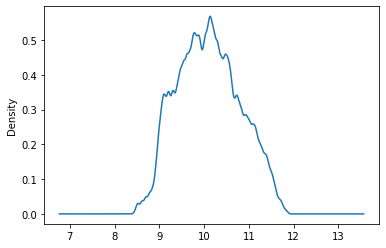

In [155]:
pd.Series(y_train).plot(kind = 'density', bw_method = 0.05)

# alternatively
# sns.set_style('whitegrid')
# sns.kdeplot(np.array(y_train), bw_method = 0.05)

<AxesSubplot:ylabel='Density'>

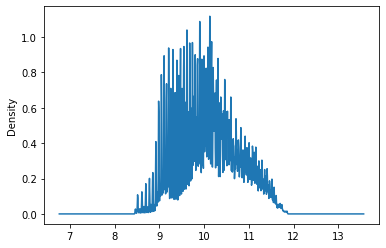

In [156]:
pd.Series(y_train).plot(kind = 'density', bw_method = 0.01)

We will recast the sale Price prediction problem as a _binary classification_ problem:

In [157]:
y[:10]

array([11.09741, 10.95081,  9.21034, 10.55841,  9.30565, 10.1849 ,  9.95228, 10.20359,  9.97581, 11.08214])

In [158]:
# intervals are taken along the median (10.165):
# ]8.463, 10.165]
# ]10.165, 11.864]
intervals_2 = pd.cut(y, bins = 2)

In [159]:
intervals_2[:10].tolist()

[Interval(10.165, 11.864, closed='right'),
 Interval(10.165, 11.864, closed='right'),
 Interval(8.463, 10.165, closed='right'),
 Interval(10.165, 11.864, closed='right'),
 Interval(8.463, 10.165, closed='right'),
 Interval(10.165, 11.864, closed='right'),
 Interval(8.463, 10.165, closed='right'),
 Interval(10.165, 11.864, closed='right'),
 Interval(8.463, 10.165, closed='right'),
 Interval(10.165, 11.864, closed='right')]

In [160]:
type(intervals_2[0])

pandas._libs.interval.Interval

In [255]:
label_encoder = LabelEncoder()

y_cat_2 = label_encoder.fit_transform(intervals_2)

In [162]:
y_cat_2[:10]

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [163]:
label_encoder.classes_.tolist()

[Interval(8.463, 10.165, closed='right'),
 Interval(10.165, 11.864, closed='right')]

In [164]:
# some fictive example
strings = ['hi', 'how', 'is', 'it', 'going', 'hi']

strings_encoder = LabelEncoder()

strings_int = strings_encoder.fit_transform(strings)
print(strings_int.tolist())

strings_encoder.classes_.tolist()

[1, 2, 3, 4, 0, 1]


['going', 'hi', 'how', 'is', 'it']

In [165]:
y_cat_2_train, y_cat_2_valid = split_vals(y_cat_2, n_train)
y_cat_2_small, _ = split_vals(y_cat_2, n_small)

y_cat_2_train.shape, y_cat_2_valid.shape, y_cat_2_small.shape

((389125,), (12000,), (20000,))

<a id='decision_tree_classifier'></a>

### $\bullet$ Decision Tree Classifier

[Back to top](#plan)

Implementing a Decision Tree Classifier is similar to implementing a Decision Tree Regressor, except on:<br>

- The Hererogeneity criterion, specified with the `criterion` option
- The possible imbalance of importance of each category, specified with the `class_weight` option


We give here an explanation of the construction of a single decision tree classifier, similar to [Decision Tree Regressor](#decision_tree).<br>

Suppose we are given a dataset $\mathcal{D}_1$ described by two explanatory variables $X_1$ and $X_2$ and an output variable $Y$ taking values in a finite set of categories $\mathcal{C}$ :<br>

| $X^1$ | $X^2$ | $Y$ |
|-----|-----|-----|
| $x^1_1$ | $x^2_1$ | $y_1$ |
| $x^1_2$ | $x^2_2$ | $y_2$ |
| $x^1_3$ | $x^2_3$ | $y_3$ |



#### 1. Splitting process

The decision tree will first split the dataset $\mathcal{D}_1$ into two sub-datasets $\mathcal{D}_2$ and $\mathcal{D}_3$, by choosing a variable among the explanatory variables (let's say $X^1$) and a separation threshold $d_1$ for this variable. The way of selecting a variable and a threshold is detailed in the *Splitting Strategy* paragraph below.<br> Such choice divides the dataset $\mathcal{D}_1$ into <br>

$$\mathcal{D}_2 = \displaystyle \lbrace  (x^1, x^2, y) \in \mathcal{D}_1 \, | \, x^1 \leqslant d_1 \rbrace \qquad \qquad \mathcal{D}_3 = \{ (x^1, x^2, y) \in \mathcal{D}_1 \, | \, x^1 > d_1 \}$$

<img src="img/decision_tree_1_.png" alt="" style="width: 50%"/>

If the tree construction would stop here, the resulting decision tree $\mathcal{T}$ is a prediction model that associates, to any new data point $(o^1, o^2)$, the *probability distribution* over $\mathcal{C}$ according to the following two cases : if $o^1 \leqslant d_1$, then the probability $\mathcal{T}(o^1, o^2)(c)$ that $(o^1, o^2)$ has output class $c$ is given by the ratio of data points of $\mathcal{D}_2$ with $c$ as output class, whereas if $o^1 > d_1$, then the probability $\mathcal{T}(o^1, o^2)(c)$ that $(o^1, o^2)$ has output class $c$ is given by the ratio of data points of $\mathcal{D}_3$ with $c$ as output class.<br>

This is more formally written, for each class $c \in \mathcal{C}$, as :

$$ \mathcal{T}(o^1, o^2)(c) = 
\begin{cases}
\displaystyle \frac{\vert \{(x^1, x^2, c) \, \in \, \mathcal{D}_2 \} \vert}{\vert \mathcal{D}_2 \vert } & \text{if } o^1 \leqslant d_1 \\
\displaystyle \frac{\vert \{(x^1, x^2, c) \, \in \, \mathcal{D}_3 \} \vert}{\vert \mathcal{D}_3 \vert } & \text{if } o^1 > d_1\\
\end{cases}
$$

As a byproduct, the subsequent classification of the point $(o^1, o^2)$ provided by the model is the most represented class in $\mathcal{D}_2$ if $o^1 \leqslant d_1$, and the most represented class in $\mathcal{D}_3$ else.

The tree construction does not stop here in general, but implement subsequent splittings as detained in the *Recurrence process* paragraph below.


#### 2. Splitting Strategy

The splitting strategy depends on the choice of a measure of *Heterogeneity* of a set of output values. For regression the heterogeneity was taken as the *variance* of a set of real values. For classification there are two measures of heterogeneity that are typically used, given a set $Y = \{ y_1, y_2, ...\}$ with each value $y_i$ belonging to a finite set $\mathcal{C}$, namely the *Gini impurity* and the *Entropy*.

Precisely, consider for each class $c\in \mathcal{C}$ the ratio of values in $Y$ equal to $c$:

$$\widehat{p}_c = \frac{\vert \{y_i \, \in \, Y \, | \, y_i = c \} \vert}{\vert Y \vert } $$

Then Gini impurity and Entropy are respectively defined by:

$$Gini(Y) = \sum _{c \, \in \, \mathcal{C}} \widehat{p}_c (1 - \widehat{p}_c) \qquad \qquad Ent(Y) = - \sum _{c \, \in \, \mathcal{C}} \widehat{p}_c \log _2(\widehat{p}_c) $$


Both quantities are positive, and cancel out (e.g. the impurity is null) if and only if $Y$ consists of multiple copies of a single class. The worse results are obtained when the probability $\widehat{p}$ is equidistributed, e.g. when $Y$ consists of the same number of copies of each class.<br>

Now that the homogeneity of a set has been defined, the splitting strategy consists in chosing, given a set of data $\mathcal{D}$, a variable $X^*$ among $X^1$ and $X^2$ as well as a threshold $d^*$ that minimizes, among the possible variables and thresholds, the summed heterogeneity (we formulate it with Gini but Entropy works the same)

$$
H(\mathcal{D}, X^i, d) =  Gini(\lbrace y \, | \, (x^1, x^2, y) \in \mathcal{D}, \;  x^i \leqslant d \rbrace) +  Gini(\lbrace y \, | \, (x^1, x^2, y) \in \mathcal{D}, \;  x^i > d \rbrace)
$$

This quantity is the impurity obtained by splitting the dataset along the $X^*$ variable about the threshold $d^*$, and the resulting best choice is the one that minimizes this impurity.


#### 3. Recurrence process

The full decision tree is built by _iterating_ the splitting process : If the splitting strategy yields a first decision along a variable $X^1$ with threshold $d_1$, yielding two sub-datasets $\mathcal{D}_2$ and $\mathcal{D}_3$, then the same splitting strategy is performed on $\mathcal{D}_2$ and $\mathcal{D}_3$ independently. The process stops when the splitting strategy does not find any candidate variable and threshold over any of the sub-datasets obtained so far.<br>

As an illustration, let us suppose that, after the first splitting step descrived earlier, that the splitting strategy finds no splitting on $\mathcal{D}_3$ and a splitting of $\mathcal{D}_2$ according to the variable $X^2$ and threshold $d_2$, yielding 

$$\mathcal{D}_4 = \displaystyle \lbrace  (x^1, x^2, y) \in \mathcal{D}_2 \, | \, x^2 \leqslant d_2 \rbrace \qquad \qquad \mathcal{D}_5 = \{ (x^1, x^2, y) \in \mathcal{D}_2 \, | \, x^2 > d_2 \}$$

Suppose moreover that a third step yields a splitting of $\mathcal{D}_5$ according to the variable $X^1$ and threshold $d_3$, yielding 

$$\mathcal{D}_6 = \displaystyle \lbrace  (x^1, x^2, y) \in \mathcal{D}_5 \, | \, x^1 \leqslant d_3 \rbrace \qquad \qquad \mathcal{D}_7 = \{ (x^1, x^2, y) \in \mathcal{D}_5 \, | \, x^1 > d_3 \}$$

Then the resulting decision tree can be pictured as follows :

<img src="img/decision_tree_3.png" alt="" style="width: 50%"/>


The resulting prediction model $\mathcal{T}$ is then given by the following function that yields for any data point $(o^1, o^2)$ and class $c \in \mathcal{C}$ the probability :

$$ \mathcal{T}(o^1, o^2)(c) = 
\begin{cases}
\displaystyle \frac{\vert \{(x^1, x^2, c) \, \in \, \mathcal{D}_3 \} \vert}{\vert \mathcal{D}_3 \vert } & \text{if } o^1 > d_1\\
\displaystyle \frac{\vert \{(x^1, x^2, c) \, \in \, \mathcal{D}_4 \} \vert}{\vert \mathcal{D}_4 \vert } & \text{if } o^1 \leqslant d_1 \text{ and } o^2 \leqslant d_2 \\
\displaystyle \frac{\vert \{(x^1, x^2, c) \, \in \, \mathcal{D}_6 \} \vert}{\vert \mathcal{D}_6 \vert } & \text{if } o^1 \leqslant d_1 \text{ and } o^2 > d_2 \text{ and } o^1 \leqslant d_3 \\
\displaystyle \frac{\vert \{(x^1, x^2, c) \, \in \, \mathcal{D}_7 \} \vert}{\vert \mathcal{D}_7 \vert } & \text{if } o^1 \leqslant d_1 \text{ and } o^2 > d_2 \text{ and } o^1 > d_3 \\
\end{cases}
$$

Finally, the resulting classifier attibutes to each point $(o^1, o^2)$ the most frequent class among $\mathcal{D}_3$, $\mathcal{D}_4$, $\mathcal{D}_6$ or $\mathcal{D}_7$ according to the above conditions on $o^1$ and $o^2$. 

In [167]:
tree_classifier = DecisionTreeClassifier(
    class_weight = None, # specific to classifiers
    criterion = 'gini',  # specific to classifiers
    splitter = 'best', 
    max_depth = 3, 
    min_samples_split = 2, 
    min_samples_leaf = 1, 
    min_weight_fraction_leaf = 0.0, 
    max_features = None, 
    max_leaf_nodes = None, 
    min_impurity_decrease = 0.0, 
    min_impurity_split = None,  
    ccp_alpha = 0.0,
    random_state = None, 
)

In [168]:
%time tree_classifier.fit(X_small, y_cat_2_small)

print(tree_classifier.score(X_small, y_cat_2_small))
print(tree_classifier.score(X_valid, y_cat_2_valid))

Wall time: 4.19 s
0.75195
0.7346666666666667


[Text(2179.6875, 1981.875, 'X[37] <= 0.5\ngini = 0.499\nsamples = 20000\nvalue = [9640, 10360]'),
 Text(1743.75, 1415.625, 'X[19] <= 2.0\ngini = 0.473\nsamples = 16815\nvalue = [6455, 10360]'),
 Text(871.875, 849.375, 'X[2] <= 4573.0\ngini = 0.465\nsamples = 4400\nvalue = [2785, 1615]'),
 Text(435.9375, 283.125, 'gini = 0.487\nsamples = 2002\nvalue = [839, 1163]'),
 Text(1307.8125, 283.125, 'gini = 0.306\nsamples = 2398\nvalue = [1946, 452]'),
 Text(2615.625, 849.375, 'X[19] <= 4.5\ngini = 0.416\nsamples = 12415\nvalue = [3670, 8745]'),
 Text(2179.6875, 283.125, 'gini = 0.252\nsamples = 7193\nvalue = [1065, 6128]'),
 Text(3051.5625, 283.125, 'gini = 0.5\nsamples = 5222\nvalue = [2605, 2617]'),
 Text(2615.625, 1415.625, 'gini = 0.0\nsamples = 3185\nvalue = [3185, 0]')]

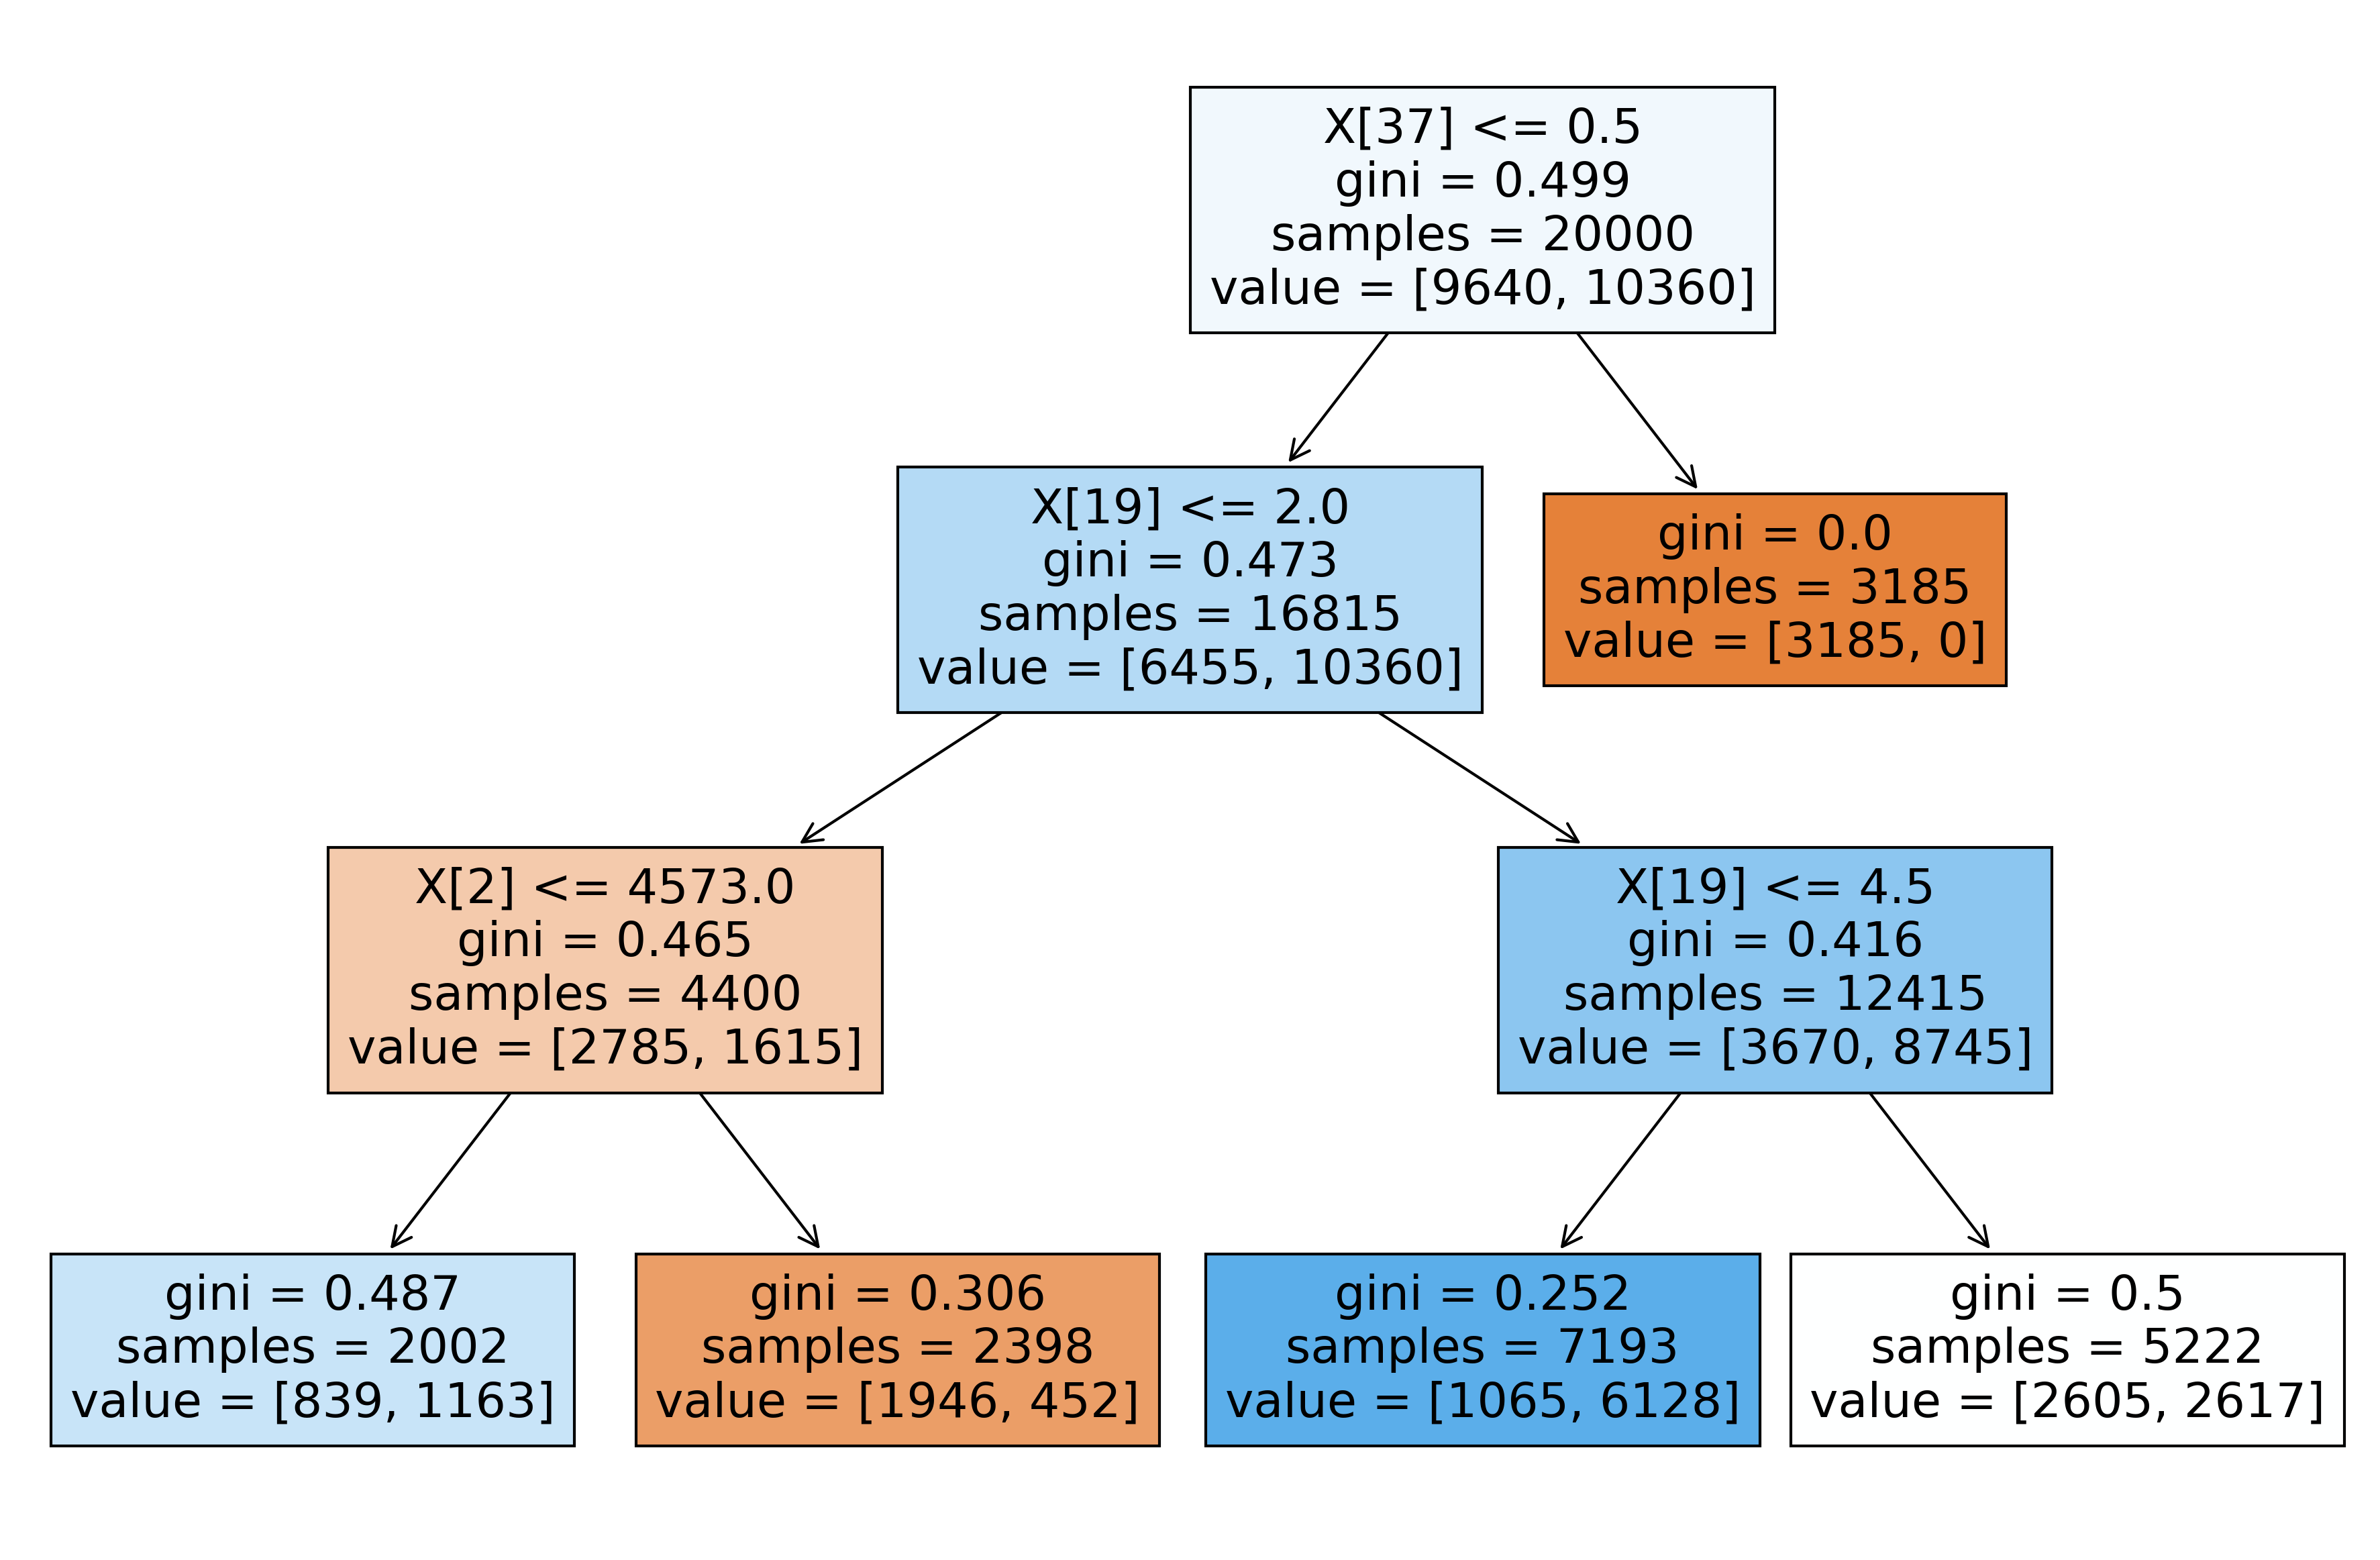

In [169]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (15, 10), dpi = 300)
plot_tree(tree_classifier, filled = True)

In [170]:
draw_tree(tree_classifier, X_small, precision = 3)

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [189]:
tree_classifier.predict_proba(X_valid[:1])[0]

array([0.41908, 0.58092])

In [190]:
tree_classifier.predict_proba(X_valid[:1])

array([[0.41908, 0.58092]])

In [191]:
tree_classifier.predict(X_valid[:1])[0]

1

In [191]:
839/(839 + 1163), 1163/(839 + 1163)

(0.4190809190809191, 0.580919080919081)

<a id='random_forest_classifier'></a>

### $\bullet$ Random Forest Classifier

[Back to top](#plan)

Implementing a Random Forest Classifier is similar to implementing a Random Forest Regressor, except on :

- The Hererogeneity criterion, specified with the `criterion` option
- The possible imbalance of importance of each category, specified with the `class_weight` option

In [257]:
classifier = RandomForestClassifier(
    n_estimators = 20, 
    class_weight = None, # classifier specific
    criterion = 'gini',  # classifier specific
    max_depth = 3, 
    min_samples_split = 2, 
    min_samples_leaf = 1, 
    min_weight_fraction_leaf = 0.0, 
    max_features = 'auto', 
    max_leaf_nodes = None, 
    min_impurity_decrease = 0.0, 
    min_impurity_split = None, 
    ccp_alpha = 0.0, 
    random_state = 42, 
    bootstrap = True, 
    oob_score = True, 
    max_samples = None,
    warm_start = False, 
    n_jobs = -1, 
    verbose = 0, 
)


In [258]:
%time classifier.fit(X_small, y_cat_2_small)

print(classifier.score(X_small, y_cat_2_small)) # classification accuracy on training set
print(classifier.score(X_valid, y_cat_2_valid)) # classification accuracy on validation set
print(classifier.oob_score_)                    # classification accuracy on oob samples

Wall time: 9.72 s
Parser   : 177 ms
0.8018
0.79925
0.78835


In [259]:
classifier.predict_proba(X_valid[:1])[0]

array([0.44641, 0.55359])

In [264]:
classifier.predict_proba(X_valid)

array([[0.44641, 0.55359],
       [0.57982, 0.42018],
       [0.57689, 0.42311],
       ...,
       [0.52792, 0.47208],
       [0.54056, 0.45944],
       [0.54056, 0.45944]])

In [261]:
classifier.predict(X_valid[:1])[0]

1

In [196]:
# The predicted label is 1 precisely when its estimated probability is > 0.5
probas_1 = classifier.predict_proba(X_valid)[:, 1]
prob_labels = [int(p > 0.5) for p in probas_1]

pred_labels = classifier.predict(X_valid)

sum(prob_labels == pred_labels)/len(pred_labels)

1.0

In [200]:
classifier.predict_proba(X_valid)


array([[0.44641, 0.55359],
       [0.57982, 0.42018],
       [0.57689, 0.42311],
       ...,
       [0.52792, 0.47208],
       [0.54056, 0.45944],
       [0.54056, 0.45944]])

In [202]:
classifier.predict_proba(X_valid)[:, 0]

array([0.44641, 0.57982, 0.57689, ..., 0.52792, 0.54056, 0.54056])

In [203]:
# all tree predictions on single data point
trees = classifier.estimators_
point = X_valid[:1]
preds = np.asarray([tree.predict_proba(point)[0] for tree in trees])

avg = preds.sum(0) 
avg = avg/sum(avg)

print('Tree probabilities:\n', preds)
print('\nAverage probability:\n', avg)

Tree probabilities:
 [[0.24547 0.75453]
 [0.6924  0.3076 ]
 [0.76346 0.23654]
 [0.22862 0.77138]
 [0.27948 0.72052]
 [0.5118  0.4882 ]
 [0.39241 0.60759]
 [0.39525 0.60475]
 [0.5945  0.4055 ]
 [0.34529 0.65471]
 [0.70305 0.29695]
 [0.26291 0.73709]
 [0.75804 0.24196]
 [0.276   0.724  ]
 [0.23358 0.76642]
 [0.25343 0.74657]
 [0.45822 0.54178]
 [0.18488 0.81512]
 [0.65259 0.34741]
 [0.69687 0.30313]]

Average probability:
 [0.44641 0.55359]


In [207]:
preds.sum(0)

array([ 8.92822, 11.07178])

In [208]:
sum(preds.sum(0))

20.000000000000004

<a id='binary_classifier_scoring'></a>

### $\bullet$ Evaluation criteria of binary classifiers

[Back to top](#plan)

The default scoring function of a classifier is its *Accuracy*, that is, the percentage of well-predicted classes among an evaluation dataset. This way of evaluating a model can be very misleading when this evaluation dataset is *imbalanced*, in the sense that some classes are over-represented and some other classes are under-represented in the evaluation set.

Take for instance the situation on a binary classification problem where the evaluation set consists of 90% of data points belonging tho the class $0$ whereas the remaining 10% belong to the class $1$. Then the trivial classifier constantly predicting the class $0$ will achieve 90% accuracy on this evaluation set !

In order to get a better estimation of the quality of a binary classifier, we consider a total of four different scores :

- Accuracy
- Recall
- Precision
- Specificity

<img src="img/precision_recall_specificity.bmp" alt="" style="width: 50%"/>
<center>
The four metrics for binary classification
</center>




Overall, The recall and precision scores are in general the most informative ones regarding the quality of a binary classifier. These two scores are often fusioned into a single **F1-score** :

$$ \text{F}_1\text{-score} = 2. \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$


#### Exercice

Suppose we dispose of a dataset with 100 points, with the task of predicting a binary label 0 or 1 for each data point. Assume that the true label is 0 for points 1 to 80, and 1 for points 81 to 100. What is the accuracy, recall, precision, specificity, f1-score of :

- The classifier constantly predicting 0 ?
- The classifier constantly predincting 1 ?
- A classifier that predicts the label 1 for data points 75 to 90, and 0 else ?
- A classifier that predicts even points as 0 and odd points as 1 ?

#### Correction

The classifier constantly predicting 0

- accuracy = 80/100 = 0.8
- precision = 0/0 = 0 by convention
- recall = 0/20 = 0
- specificity = 80/80 = 1
- f1-score = 0

The classifier constantly predicting 1

- accuracy = 20/100 = 0.2
- precision = 20/100 = 0.2
- recall = 20/20 = 1
- specificity = 0/80 = 0
- f1-score = 2*(0.2 * 1 / (0.2 + 1)) = 0.33

The classifier predicting 1 for points 75-90

- accuracy = (75 + 10)/100 = 0.85
- precision = 10/15 = 0.66
- recall = 10/20 = 0.5
- specificity = 75/80 = 0.9375
- f1-score = 2*(0.66 * 0.5)/ (0.66 + 0.5) = 0.66/1.16 = 0.57

The classifier predicting even points as 0 and odd points as 1

- accuracy = (40 + 10)/100 = 0.5
- precision = 10/50 = 0.2
- recall = 10/20 = 0.5
- specificity = 40/80 = 0.5
- f1-score = 2*(0.2 * 0.5)/ (0.2 + 0.5) = 0.2/0.7 = 0.29

In [246]:
classifier = RandomForestClassifier(
    n_estimators = 20, 
    class_weight = None, # classifier specific
    criterion = 'gini',  # classifier specific
    max_depth = 3, 
    min_samples_split = 2, 
    min_samples_leaf = 1, 
    min_weight_fraction_leaf = 0.0, 
    max_features = 'auto', 
    max_leaf_nodes = None, 
    min_impurity_decrease = 0.0, 
    min_impurity_split = None, 
    ccp_alpha = 0.0, 
    random_state = 42, 
    bootstrap = True, 
    oob_score = True, 
    max_samples = None,
    warm_start = False, 
    n_jobs = -1, 
    verbose = 0, 
)

In [247]:
%time classifier.fit(X_small, y_cat_2_small)

print(classifier.score(X_small, y_cat_2_small)) # classification accuracy on training set
print(classifier.score(X_valid, y_cat_2_valid)) # classification accuracy on validation set
print(classifier.oob_score_)                    # classification accuracy on oob samples

Wall time: 306 ms
0.8018
0.79925
0.78835


In [248]:
def specificity_score(y_true, y_predict):
    '''
    Computes the proba that a label is 0 knowing that the prediction is 0
    '''
    y_predict_0  = [(pred, true) for pred, true in zip(y_predict, y_true) if true == 0]
    y_predict_00 = [(pred, true) for pred, true in y_predict_0 if pred == 0]
    specificity  = (0 if len(y_predict_0) == 0 else len(y_predict_00)/len(y_predict_0))
    return specificity

In [249]:
y_predict_valid = classifier.predict(X_valid)

acc = metrics.accuracy_score(y_cat_2_valid, y_predict_valid)
rec = metrics.recall_score(y_cat_2_valid, y_predict_valid)
prc = metrics.precision_score(y_cat_2_valid, y_predict_valid)
spe = specificity_score(y_cat_2_valid, y_predict_valid)
f1  = metrics.f1_score(y_cat_2_valid, y_predict_valid)

print('Accuracy : {:.2f}%'.format(acc*100))
print('Recall : {:.2f}%'.format(rec*100))
print('Precision : {:.2f}%'.format(prc*100))
print('Specificity : {:.2f}%'.format(spe*100))
print('F1-score : {:.2f}%'.format(f1*100))

Accuracy : 79.92%
Recall : 88.58%
Precision : 70.77%
Specificity : 73.70%
F1-score : 78.68%


In [254]:
label_encoder.classes_.tolist()

[Interval(8.463, 9.145, closed='right'),
 Interval(9.145, 9.825, closed='right'),
 Interval(9.825, 10.505, closed='right'),
 Interval(10.505, 11.184, closed='right'),
 Interval(11.184, 11.864, closed='right')]

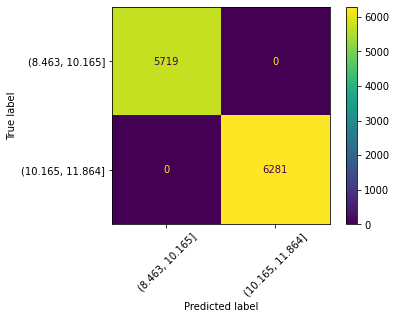

In [256]:
metrics.plot_confusion_matrix(
    classifier, 
    X_valid, 
    y_predict_valid, 
    display_labels = [str(interval) for interval in label_encoder.classes_.tolist()],
    include_values = True, 
    xticks_rotation = 45, 
    values_format = None, 
    cmap = 'viridis', 
    colorbar = True,
)

**Conclusion** : The model has a tendency to over-estimate the price of a Buldozer, since buldozers that are predicted as high-priced will be so for only 70.77 % of them (the precision is 70.77%). The model is on the other hand able to recognize high-priced buldozers since 88.58% of expensive buldozers were predicted so by the model (the recall is 88.58%).

<a id='rec_prc_curve'></a>

### $\bullet$ Dealing with imbalanced data 1 : Precision - Recall curve and threshold selection

[Back to top](#plan)


Most of Scikit-learn classifiers not only transform a data point into a predicted class, but in fact into a probability of membership over the full set of classes. In the case of binary classifiers, the predicted label $\widehat{c} \in \{0, 1\}$ is deduced from this probability $\widehat{p}$ over $\{0, 1\}$ by comparing the probability attributed to the label 1 with the reference threshold 0.5 :

$$ \widehat{c} = 1 \; \Longleftrightarrow \;  \widehat{p}(1) \geqslant 0.5 $$


This threshold is natural, but can be changed if for instance one wants to counter-balance the effect of an unbalanced training dataset, or wants to favor recall (resp. precision) at the cost of precision (resp. recall). Indeed, selecting a threshold equal to 0.0 yields a (rather trivial) classifier that will always predicts label 1, so with low precision, and conversely selecting the threshold equal to 1.0 yields an (equally trivial) classifier that always predics the label 0, so with zero recall. By continuously moving this threshold from 0.0 to 1.0, one gets a classifier that continuously evolve from a low-precision model towards a low-recall model, with a certain threshold yielding optimal precision-recall scores lying somewhere in between.

The evolution of the precision and recall scores of the binary classifier obtained by continuously shifting the threshold from 0.0 to 1.0 is calld the **Precision-Recall curve**.

**Remark** _The binary classifier is trained once and for all prior to computing its precision-recall curve!_ The fact of having precision and recall scores that change is only caused by varying the threshold serving to convert probabilistic predictions into deterministic predictions.

In [213]:
def precision_recall_curve_with_threshold(targets, probas, threshold = 0.5):
    
    def sort_pair(X, Y):
        rangee = [(x, y) for x, y in sorted(zip(X, Y), key = lambda pair: pair[0])]
        return [pair[0] for pair in rangee], [pair[1] for pair in rangee]
    
    # --- main
    targets, probas = sort_pair(targets, probas)
    precision, recall, thresholds = metrics.precision_recall_curve(targets, probas)
    
    # calculate precision-recall AUC
    auc_val = metrics.auc(recall, precision)
    print('Area Under Curve (AUC) : {:.3f}'.format(auc_val))
    # plot no skill
    if threshold is not None : 
        index = len([y for y in thresholds if y <= threshold]) # thresholds are sorted

        print('Recall with threshold = {}: {:.2f}%'.format(threshold, recall[index]*100))
        print('Precision with threshold = {} : {:.2f}%'.format(threshold, precision[index]*100))

        plt.plot([0, 1], [precision[index], precision[index]], linestyle='--', color = 'grey')
        plt.plot([recall[index], recall[index]], [0, 1], linestyle='--', color = 'grey')
        
        # plot the precision-recall curve for the model
        plt.plot(recall[:index], precision[:index], color = 'navy', marker='.')
        plt.plot(recall[index:], precision[index:], color = 'orange', marker='.')
        
        # show the plot
        plt.title('Precision-Recall curve with threshold = {}'.format(threshold))
        plt.xlabel('Recall $P(\, \widehat{1}\, | 1)$')
        plt.ylabel('Precision $P(\, 1\, | \widehat{1})$                                ', rotation = 'horizontal')
    else :
        # plot the precision-recall curve for the model
        plt.plot(recall, precision, color = 'orange', marker='.')
        
        # show the plot
        plt.title('Precision-Recall curve')
        plt.xlabel('Recall $P(\, \widehat{1}\, | 1)$')
        plt.ylabel('Precision $P(\, 1\, | \widehat{1})$                                ', rotation = 'horizontal')

    plt.show()
    return

In [214]:
# The predicted label is 1 precisely when its estimated probability is >= 0.5
threshold = 0.5

probas_1 = classifier.predict_proba(X_valid)[:, 1]
prob_labels = [int(p > threshold) for p in probas_1]

pred_labels = classifier.predict(X_valid)

sum(prob_labels == pred_labels)/len(pred_labels)

1.0

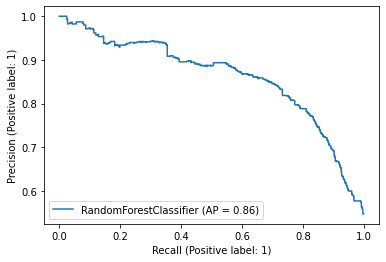

In [215]:
# beware that y axis is along [0.5, 1]
rec_prc_curve = metrics.plot_precision_recall_curve(, y_cat_2_valid)
rec_prc_curve

TypeError: 'PrecisionRecallDisplay' object is not iterable

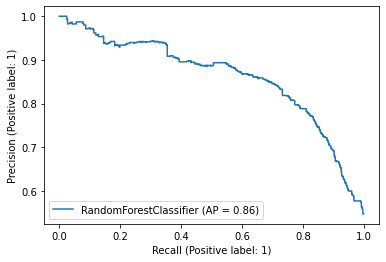

In [216]:
ptest, recalltest, thresholdstest = metrics.plot_precision_recall_curve(classifier, X_valid, y_cat_2_valid)

In [217]:
y_predict_valid = classifier.predict(X_valid)

acc = metrics.accuracy_score(y_cat_2_valid, y_predict_valid)
rec = metrics.recall_score(y_cat_2_valid, y_predict_valid)
prc = metrics.precision_score(y_cat_2_valid, y_predict_valid)
spe = specificity_score(y_cat_2_valid, y_predict_valid)
f1  = metrics.f1_score(y_cat_2_valid, y_predict_valid)

print('Accuracy : {:.2f}%'.format(acc*100))
print('Recall : {:.2f}%'.format(rec*100))
print('Precision : {:.2f}%'.format(prc*100))
print('Specificity : {:.2f}%'.format(spe*100))
print('F1-score : {:.2f}%'.format(f1*100))

Accuracy : 79.92%
Recall : 88.58%
Precision : 70.77%
Specificity : 73.70%
F1-score : 78.68%


In [218]:
probs = classifier.predict_proba(X_valid)[:, 1] 
preds = [int(prob > 0.55) for prob in probs]
y_predict_valid = preds

acc = metrics.accuracy_score(y_cat_2_valid, y_predict_valid)
rec = metrics.recall_score(y_cat_2_valid, y_predict_valid)
prc = metrics.precision_score(y_cat_2_valid, y_predict_valid)
spe = specificity_score(y_cat_2_valid, y_predict_valid)
f1  = metrics.f1_score(y_cat_2_valid, y_predict_valid)

print('Accuracy : {:.2f}%'.format(acc*100))
print('Recall : {:.2f}%'.format(rec*100))
print('Precision : {:.2f}%'.format(prc*100))
print('Specificity : {:.2f}%'.format(spe*100))
print('F1-score : {:.2f}%'.format(f1*100))

Accuracy : 82.74%
Recall : 81.51%
Precision : 78.16%
Specificity : 83.63%
F1-score : 79.80%


In this situation a threshold of 0.55 seems to yield a more balanced classifier :

Area Under Curve (AUC) : 0.862
Recall with threshold = 0.5: 88.58%
Precision with threshold = 0.5 : 70.77%


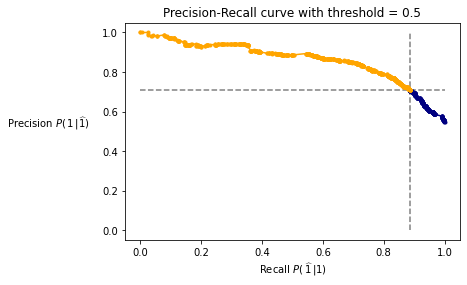

In [219]:
probas = classifier.predict_proba(X_valid)[:, 1]

precision_recall_curve_with_threshold(y_cat_2_valid, probas, threshold = 0.5)

Area Under Curve (AUC) : 0.862
Recall with threshold = 0.55: 81.51%
Precision with threshold = 0.55 : 78.16%


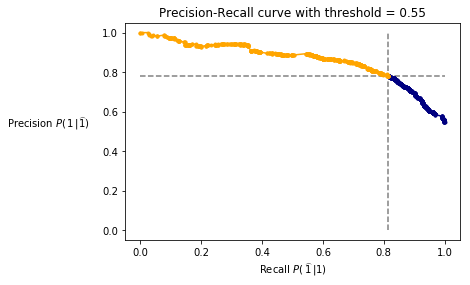

In [296]:
probas = classifier.predict_proba(X_valid)[:, 1]

precision_recall_curve_with_threshold(y_cat_2_valid, probas, threshold = 0.55)

In [220]:
classifier.predict(X_valid[:1])[0]

1

In [221]:
proba = classifier.predict_proba(X_valid[:1])[:, 1] 
pred = int(proba > 0.4)
pred

1

The Area Under Curve (AUC) is a score between 0.0 (worst) and 1.0 (best), which is the area of the zone located below the precision-recall curve (e.g. the AUC is the integral of this curve).<br>
It is a measure of quality of the underlying probabilistic classifier, but does not qualify the quality of the resulting deterministic classifier, whatever the chosen threshold.

<a id='class_weight'></a>

### $\bullet$ Dealing with imbalanced data 2 : Class weights

[Back to top](#plan)


In [222]:
classifier = RandomForestClassifier(
    n_estimators = 20, 
    class_weight = 'balanced', # classifier specific
    criterion = 'gini',  # classifier specific
    max_depth = 3, 
    min_samples_split = 2, 
    min_samples_leaf = 1, 
    min_weight_fraction_leaf = 0.0, 
    max_features = 'auto', 
    max_leaf_nodes = None, 
    min_impurity_decrease = 0.0, 
    min_impurity_split = None, 
    ccp_alpha = 0.0, 
    random_state = 42, 
    bootstrap = True, 
    oob_score = True, 
    max_samples = None,
    warm_start = False, 
    n_jobs = -1, 
    verbose = 0, 
)

In [223]:
%time classifier.fit(X_small, y_cat_2_small)

print(classifier.score(X_small, y_cat_2_small)) # classification accuracy on training set
print(classifier.score(X_valid, y_cat_2_valid)) # classification accuracy on validation set
print(classifier.oob_score_)                    # classification accuracy on oob samples

Wall time: 1.9 s
0.8107
0.8120833333333334
0.80015


In [224]:
y_predict_valid = classifier.predict(X_valid)

acc = metrics.accuracy_score(y_cat_2_valid, y_predict_valid)
rec = metrics.recall_score(y_cat_2_valid, y_predict_valid)
prc = metrics.precision_score(y_cat_2_valid, y_predict_valid)
spe = specificity_score(y_cat_2_valid, y_predict_valid)
f1  = metrics.f1_score(y_cat_2_valid, y_predict_valid)

print('Accuracy : {:.2f}%'.format(acc*100))
print('Recall : {:.2f}%'.format(rec*100))
print('Precision : {:.2f}%'.format(prc*100))
print('Specificity : {:.2f}%'.format(spe*100))
print('F1-score : {:.2f}%'.format(f1*100))

Accuracy : 81.21%
Recall : 86.81%
Precision : 73.22%
Specificity : 77.18%
F1-score : 79.44%


Area Under Curve (AUC) : 0.865
Recall with threshold = 0.5: 86.81%
Precision with threshold = 0.5 : 73.22%


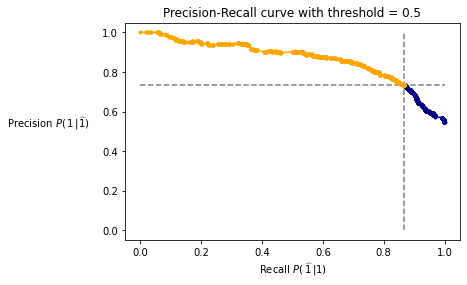

In [225]:
probas = classifier.predict_proba(X_valid)[:, 1]

precision_recall_curve_with_threshold(y_cat_2_valid, probas, threshold = 0.5)

Area Under Curve (AUC) : 0.865
Recall with threshold = 0.55: 78.44%
Precision with threshold = 0.55 : 79.85%


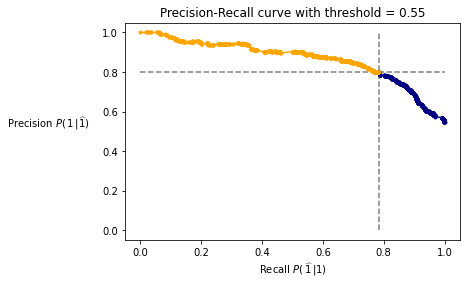

In [226]:
probas = classifier.predict_proba(X_valid)[:, 1]

precision_recall_curve_with_threshold(y_cat_2_valid, probas, threshold = 0.55)

<a id='model_calibration'></a>

### $\bullet$ Model calibration

[Back to top](#plan)


Manually selecting the threshold in order to balance precision and recall can be dangerous for _uncalibrated_ classifiers, that is, classifiers where determinisitc predictions change a lot for a small change of threshold :

In [227]:
classifier = RandomForestClassifier(
    n_estimators = 20, 
    class_weight = 'balanced', # classifier specific
    criterion = 'gini',  # classifier specific
    max_depth = 3, 
    min_samples_split = 2, 
    min_samples_leaf = 1, 
    min_weight_fraction_leaf = 0.0, 
    max_features = 'auto', 
    max_leaf_nodes = None, 
    min_impurity_decrease = 0.0, 
    min_impurity_split = None, 
    ccp_alpha = 0.0, 
    random_state = 42, 
    bootstrap = True, 
    oob_score = True, 
    max_samples = None,
    warm_start = False, 
    n_jobs = -1, 
    verbose = 0, 
)

In [228]:
%time classifier.fit(X_small, y_cat_2_small)

print(classifier.score(X_small, y_cat_2_small)) # classification accuracy on smalling set
print(classifier.score(X_valid, y_cat_2_valid)) # classification accuracy on validation set
print(classifier.oob_score_)                    # classification accuracy on oob samples

Wall time: 705 ms
0.8107
0.8120833333333334
0.80015


Area Under Curve (AUC) : 0.865
Recall with threshold = 0.4: 95.06%
Precision with threshold = 0.4 : 59.40%


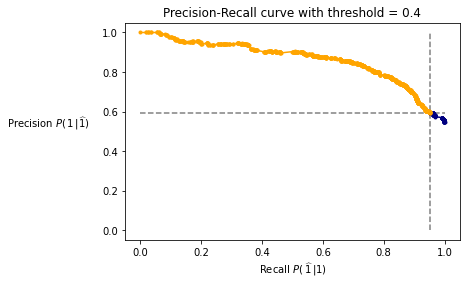

In [229]:
probas = classifier.predict_proba(X_valid)[:, 1]

precision_recall_curve_with_threshold(y_cat_2_valid, probas, threshold = 0.4)

Area Under Curve (AUC) : 0.865
Recall with threshold = 0.6: 61.00%
Precision with threshold = 0.6 : 87.51%


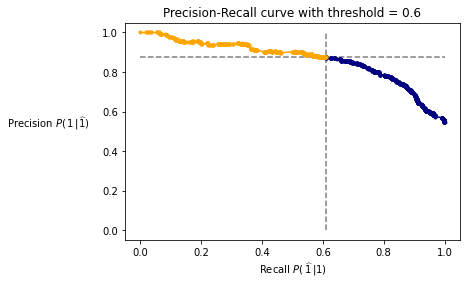

In [230]:
probas = classifier.predict_proba(X_valid)[:, 1]

precision_recall_curve_with_threshold(y_cat_2_valid, probas, threshold = 0.6)

Shifting the classification threshold from 0.4 to 0.6 induces a 28% precision jump and a 34% recall jump !

Let us now try with a _calibrated_ Random Forest :

In [231]:
calibrated_classifier = CalibratedClassifierCV(
    base_estimator = classifier,
    method = 'sigmoid', # 'sigmoid' or 'isotonic'
    ensemble = True,
    cv = 8, # int of 'prefit'
    n_jobs = -1,
)

In [232]:
%time calibrated_classifier.fit(X_small, y_cat_2_small)

print(calibrated_classifier.score(X_small, y_cat_2_small)) # classification accuracy on smalling set
print(calibrated_classifier.score(X_valid, y_cat_2_valid)) # classification accuracy on validation set

Wall time: 34 s
0.8371
0.8300833333333333


In [233]:
y_predict_valid = calibrated_classifier.predict(X_valid)

acc = metrics.accuracy_score(y_cat_2_valid, y_predict_valid)
rec = metrics.recall_score(y_cat_2_valid, y_predict_valid)
prc = metrics.precision_score(y_cat_2_valid, y_predict_valid)
spe = specificity_score(y_cat_2_valid, y_predict_valid)
f1  = metrics.f1_score(y_cat_2_valid, y_predict_valid)

print('Accuracy : {:.2f}%'.format(acc*100))
print('Recall : {:.2f}%'.format(rec*100))
print('Precision : {:.2f}%'.format(prc*100))
print('Specificity : {:.2f}%'.format(spe*100))
print('F1-score : {:.2f}%'.format(f1*100))

Accuracy : 83.01%
Recall : 76.42%
Precision : 81.75%
Specificity : 87.74%
F1-score : 79.00%


Area Under Curve (AUC) : 0.868
Recall with threshold = 0.4: 84.42%
Precision with threshold = 0.4 : 76.73%


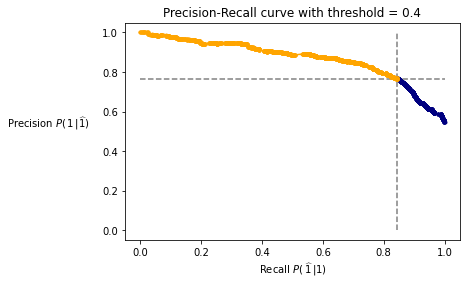

In [236]:
probas = calibrated_classifier.predict_proba(X_valid)[:, 1]

precision_recall_curve_with_threshold(y_cat_2_valid, probas, threshold = 0.4)

Area Under Curve (AUC) : 0.868
Recall with threshold = 0.6: 66.62%
Precision with threshold = 0.6 : 85.61%


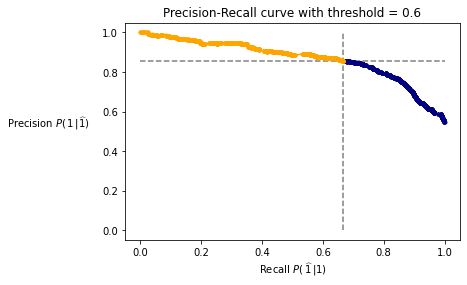

In [237]:
probas = calibrated_classifier.predict_proba(X_valid)[:, 1]

precision_recall_curve_with_threshold(y_cat_2_valid, probas, threshold = 0.6)

The calibrated version of the Random Forest Classifier has more balanced precision and recall scores. These scores are moreover more stable with respect to the chosen threshold, as shifting the classification threshold from 0.4 to 0.6 induces this time a reduced 9% precision jump and 18% recall jump.

#### Calibration for probability interpretation as confidence levels

We use here calibration as a mean to reduce variance in the resulting deterministic classifiers when shifting the decision threshold. Originally, this method was designed in order to get probabilistic models whose _probability estimates truly correspond to confidence levels_, in the sense that the region of input points that were assigned a probability of $p$ to be of a given label should form a region where the empirical ratio of points with this label is $p$.<br>
For more details see the [scikit-learn documentation](https://scikit-learn.org/stable/modules/calibration.html#calibration)

<a id='multiclass_classification'></a>

### $\bullet$ Multiclass classification

[Back to top](#plan)


Let us replicate the process followed for binary classification to the case of 5-fold classification

#### Data categorization

Area Under Curve (AUC) : 0.868
Recall with threshold = 0.5: 76.42%
Precision with threshold = 0.5 : 81.75%


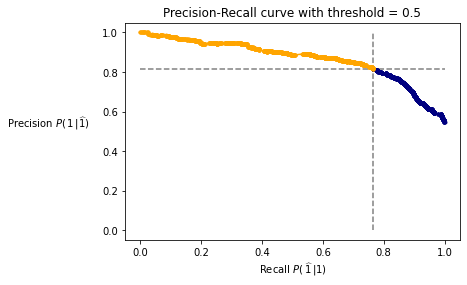

In [238]:
probas = calibrated_classifier.predict_proba(X_valid)[:, 1]

precision_recall_curve_with_threshold(y_cat_2_valid, probas, threshold = 0.5)

In [239]:
intervals_5 = pd.cut(y, bins = 5)
intervals_5[:10].tolist()

[Interval(10.505, 11.184, closed='right'),
 Interval(10.505, 11.184, closed='right'),
 Interval(9.145, 9.825, closed='right'),
 Interval(10.505, 11.184, closed='right'),
 Interval(9.145, 9.825, closed='right'),
 Interval(9.825, 10.505, closed='right'),
 Interval(9.825, 10.505, closed='right'),
 Interval(9.825, 10.505, closed='right'),
 Interval(9.825, 10.505, closed='right'),
 Interval(10.505, 11.184, closed='right')]

In [240]:
label_encoder = LabelEncoder()

y_cat_5 = label_encoder.fit_transform(intervals_5)
y_cat_5[:10]

array([3, 3, 1, 3, 1, 2, 2, 2, 2, 3])

In [241]:
label_encoder.classes_.tolist()

[Interval(8.463, 9.145, closed='right'),
 Interval(9.145, 9.825, closed='right'),
 Interval(9.825, 10.505, closed='right'),
 Interval(10.505, 11.184, closed='right'),
 Interval(11.184, 11.864, closed='right')]

In [242]:
y_cat_5_train, y_cat_5_valid = split_vals(y_cat_5, n_train)
y_cat_5_small, _ = split_vals(y_cat_5, n_small)

y_cat_5_train.shape, y_cat_5_valid.shape, y_cat_5_small.shape

((389125,), (12000,), (20000,))

#### Model training

In [243]:
classifier = RandomForestClassifier(
    n_estimators = 20, 
    class_weight = 'balanced', # classifier specific
    criterion = 'gini',  # classifier specific
    max_depth = 3, 
    min_samples_split = 2, 
    min_samples_leaf = 1, 
    min_weight_fraction_leaf = 0.0, 
    max_features = 'auto', 
    max_leaf_nodes = None, 
    min_impurity_decrease = 0.0, 
    min_impurity_split = None, 
    ccp_alpha = 0.0, 
    random_state = 42, 
    bootstrap = True, 
    oob_score = True, 
    max_samples = None,
    warm_start = False, 
    n_jobs = -1, 
    verbose = 0, 
)


calibrated_classifier = CalibratedClassifierCV(
    base_estimator = classifier,
    method = 'sigmoid', # 'sigmoid' or 'isotonic'
    ensemble = True,
    cv = 5, # int of 'prefit'
    n_jobs = -1,
)

In [244]:
%time classifier.fit(X_small, y_cat_5_small)

print(classifier.score(X_small, y_cat_5_small)) # classification accuracy on training set
print(classifier.score(X_valid, y_cat_5_valid)) # classification accuracy on validation set

Wall time: 272 ms
0.39525
0.41108333333333336


In [245]:
%time calibrated_classifier.fit(X_small, y_cat_5_small)

print(calibrated_classifier.score(X_small, y_cat_5_small)) # classification accuracy on training set
print(calibrated_classifier.score(X_valid, y_cat_5_valid)) # classification accuracy on validation set

Wall time: 5.45 s
0.5465
0.5075833333333334


#### Evaluation

We remind that intuitively, precision is the ability of a binary classifier not to label as positive a sample that is negative, and recall is the ability of the classifier to find all the positive samples.

Evaluation of a multiclass classifier can, in addition to computing the overall accuracy, either be computed using  `macro` average or `weighted` macro-average of precision, recall and F1-score :

- macro : the macro-average of the recall score is obtained by taking the average, over all classes $c$, of the ratio of well-classified points among points with true class $c$, whereas the precision score is obtained by taking the average, over all classes $c$, of the ratio of well-classified points among points with predicted class $c$. The macro-averaged F1-score is taken by applying the F1-score formula to the macro-averages of precision and recall scores.


- weighted macro-average : Same as macro, but averages over classes are ponderated by the ratio of points belonging to each class. This permits to take into account the dataset imbalance over the different classes : scores computed over well-represented classes have more weight on the resulting scores, whereas poorly-represented classes have little impact on the resulting scores. This gives a more realistic evaluation since future point sets to classify will typically follow the same imbalance as observed during evaluation.


For _multi-label_ classification there is also the notion of `micro` average as alternative to macro and weighted-macro averages.

Macro-averages :

In [321]:
y_predict_valid = classifier.predict(X_valid)

average = 'macro'

acc = metrics.accuracy_score(y_cat_5_valid, y_predict_valid)
rec = metrics.recall_score(y_cat_5_valid, y_predict_valid, average = average)
prc = metrics.precision_score(y_cat_5_valid, y_predict_valid, average = average)
f1  = metrics.f1_score(y_cat_5_valid, y_predict_valid, average = average)

print('Accuracy : {:.2f}%'.format(acc*100))
print('Recall : {:.2f}%'.format(rec*100))
print('Precision : {:.2f}%'.format(prc*100))
print('F1-score : {:.2f}%'.format(f1*100))

Accuracy : 41.11%
Recall : 49.03%
Precision : 46.19%
F1-score : 42.16%


In [322]:
y_predict_valid = calibrated_classifier.predict(X_valid)

average = 'macro'

acc = metrics.accuracy_score(y_cat_5_valid, y_predict_valid)
rec = metrics.recall_score(y_cat_5_valid, y_predict_valid, average = average)
prc = metrics.precision_score(y_cat_5_valid, y_predict_valid, average = average)
f1  = metrics.f1_score(y_cat_5_valid, y_predict_valid, average = average)

print('Accuracy : {:.2f}%'.format(acc*100))
print('Recall : {:.2f}%'.format(rec*100))
print('Precision : {:.2f}%'.format(prc*100))
print('F1-score : {:.2f}%'.format(f1*100))

Accuracy : 50.76%
Recall : 43.26%
Precision : 60.99%
F1-score : 43.12%


Weighted macro-averages :

In [323]:
y_predict_valid = classifier.predict(X_valid)

average = 'weighted'

acc = metrics.accuracy_score(y_cat_5_valid, y_predict_valid)
rec = metrics.recall_score(y_cat_5_valid, y_predict_valid, average = average)
prc = metrics.precision_score(y_cat_5_valid, y_predict_valid, average = average)
f1  = metrics.f1_score(y_cat_5_valid, y_predict_valid, average = average)

print('Accuracy : {:.2f}%'.format(acc*100))
print('Recall : {:.2f}%'.format(rec*100))
print('Precision : {:.2f}%'.format(prc*100))
print('F1-score : {:.2f}%'.format(f1*100))

Accuracy : 41.11%
Recall : 41.11%
Precision : 52.99%
F1-score : 41.71%


In [324]:
y_predict_valid = calibrated_classifier.predict(X_valid)

average = 'weighted'

acc = metrics.accuracy_score(y_cat_5_valid, y_predict_valid)
rec = metrics.recall_score(y_cat_5_valid, y_predict_valid, average = average)
prc = metrics.precision_score(y_cat_5_valid, y_predict_valid, average = average)
f1  = metrics.f1_score(y_cat_5_valid, y_predict_valid, average = average)

print('Accuracy : {:.2f}%'.format(acc*100))
print('Recall : {:.2f}%'.format(rec*100))
print('Precision : {:.2f}%'.format(prc*100))
print('F1-score : {:.2f}%'.format(f1*100))

Accuracy : 50.76%
Recall : 50.76%
Precision : 58.16%
F1-score : 48.90%


The different scores are better summarized in the following report :

In [325]:
y_predict_valid = classifier.predict(X_valid)

report = metrics.classification_report(
    y_cat_5_valid, 
    y_predict_valid, 
    target_names = [str(interval) for interval in label_encoder.classes_.tolist()],
)
print(report)

                  precision    recall  f1-score   support

  (8.463, 9.145]       0.46      0.57      0.51      1345
  (9.145, 9.825]       0.75      0.29      0.42      3962
 (9.825, 10.505]       0.56      0.37      0.44      3352
(10.505, 11.184]       0.26      0.41      0.32      2323
(11.184, 11.864]       0.28      0.81      0.42      1018

        accuracy                           0.41     12000
       macro avg       0.46      0.49      0.42     12000
    weighted avg       0.53      0.41      0.42     12000



In [326]:
y_predict_valid = calibrated_classifier.predict(X_valid)

report = metrics.classification_report(
    y_cat_5_valid, 
    y_predict_valid, 
    target_names = [str(interval) for interval in label_encoder.classes_.tolist()],
)
print(report)

                  precision    recall  f1-score   support

  (8.463, 9.145]       0.88      0.18      0.30      1345
  (9.145, 9.825]       0.68      0.49      0.57      3962
 (9.825, 10.505]       0.43      0.61      0.51      3352
(10.505, 11.184]       0.44      0.74      0.55      2323
(11.184, 11.864]       0.62      0.14      0.23      1018

        accuracy                           0.51     12000
       macro avg       0.61      0.43      0.43     12000
    weighted avg       0.58      0.51      0.49     12000



#### Confusion matrix

Ultimately, classification preformances are better understood though the _confusion matrix_ of the model on the evaluation set:

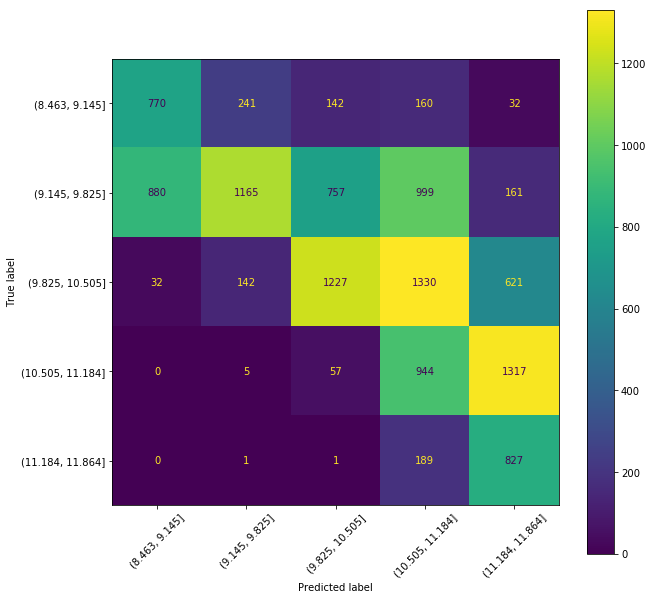

In [327]:
fig, ax = plt.subplots(figsize=(10, 10))

metrics.plot_confusion_matrix(
    classifier, 
    X_valid, 
    y_cat_5_valid, 
    display_labels = [str(interval) for interval in label_encoder.classes_.tolist()],
    include_values = True, 
    xticks_rotation = 45, 
    values_format = None, 
    cmap = 'viridis', 
    ax = ax,
    colorbar = True,
)

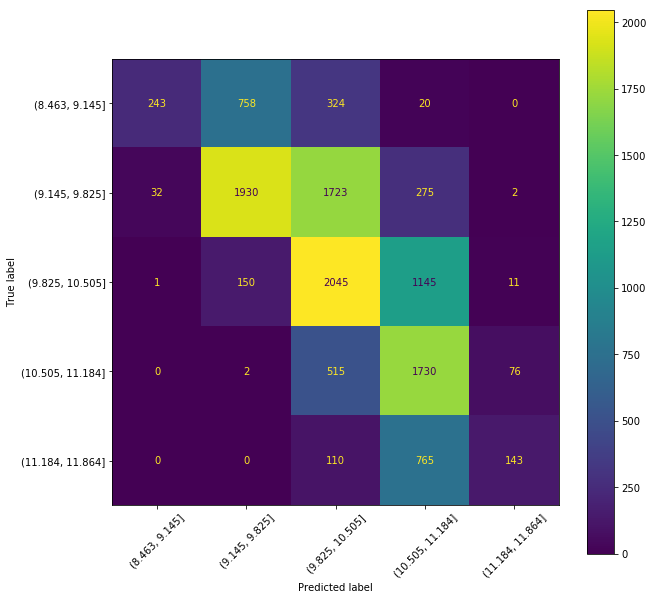

In [328]:
fig, ax = plt.subplots(figsize=(10, 10))

metrics.plot_confusion_matrix(
    calibrated_classifier, 
    X_valid, 
    y_cat_5_valid, 
    display_labels = [str(interval) for interval in label_encoder.classes_.tolist()],
    include_values = True, 
    xticks_rotation = 45, 
    values_format = None, 
    cmap = 'viridis', 
    ax = ax,
    colorbar = True,
)

# 5. Model Interpretation

[Back to top](#plan)

In [6]:
# define the path to dataset
path_to_dataset = os.path.join(path_to_repo, "data", 'tmp', 'bulldozers-raw')
print(path_to_dataset)

# import raw data
#df_raw = pd.read_csv(path_to_datasets, low_memory = False, parse_dates = ["saledate"])
#df_raw.SalePrice = np.log(df_raw.SalePrice)
df_raw = pd.read_feather(path_to_dataset)

# preprocess data
df, y, nas = proc_df(df_raw, 'SalePrice')

C:\Users\Jb\Desktop\NLP\EMLyon-Machine-Learning-Course\data\tmp\bulldozers-raw


In [7]:
def split_vals(df, n): 
    return df[:n].copy(), df[n:].copy()

In [8]:
n_total = len(df)
n_valid = 12000  # same as Kaggle's test set size
n_train = n_total - n_valid
n_small = 20000

X_train, X_valid = split_vals(df, n_train)
y_train, y_valid = split_vals(y, n_train)

X_small, _ = split_vals(df, n_small)
y_small, _ = split_vals(y, n_small)

print('Number of small training data points: X = {}, y = {}'.format(X_small.shape, y_small.shape))
print('Number of full training data points: X = {}, y = {}'.format(X_train.shape, y_train.shape))
print('Number of validation data points: X = {}, y = {}'.format(X_valid.shape, y_valid.shape))

Number of small training data points: X = (20000, 66), y = (20000,)
Number of full training data points: X = (389125, 66), y = (389125,)
Number of validation data points: X = (12000, 66), y = (12000,)


In [9]:
def rmse(y_gold, y_pred): 
    return math.sqrt(((y_gold - y_pred)**2).mean())


def print_score(m, X_train, y_train, X_valid, y_valid):
    print('RMSE on train set: {:.4f}'.format(rmse(m.predict(X_train), y_train)))
    print('RMSE on valid set: {:.4f}'.format(rmse(m.predict(X_valid), y_valid)))
    print('R^2 on train set: {:.4f}'.format(m.score(X_train, y_train)))
    print('R^2 on valid set: {:.4f}'.format(m.score(X_valid, y_valid)))
    if hasattr(m, 'oob_score_'): print('R^2 on oob set: {:.4f}'.format(m.oob_score_))
    return

<a id='RF_feature_importance'></a>

### $\bullet$ Random Forest feature importance

[Back to top](#plan)

It's not normally enough to just to know that a model can make accurate predictions - we also want to know *how* it's making predictions. The most important way to see this is with *feature importance*.

Scikit-learn's implementation of Random Forests carry _impurity-based_ feature importance scores (the higher, the more important the feature) in the attribute `model.feature_importances_` of a fitted model. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature on the training set. 

Since they are computed on the training set these scores should be taken with caution, as the importances can be high even for features that are not predictive of the target variable, as long as the model has the capacity to use them to overfit. As a result, features that are deemed of low importance for a bad model (high training score but low validation/cross-validation score) could be very important for a good model. Therefore it is always important to evaluate the predictive power of a model using a validation set (or better with cross-validation) prior to computing importances. These feature importance does not reflect to the intrinsic predictive value of a feature by itself, but how important this feature is for a particular random forest.


See more on the [scikit-learn documentation](https://scikit-learn.org/stable/modules/partial_dependence.html).

In [5]:
def rf_feat_importance(model, df):
    feat_importance = pd.DataFrame({
        'cols': df.columns, 
        'imp': model.feature_importances_,
    })
    feat_importance = feat_importance.sort_values('imp', ascending = False)
    return feat_importance


def rf_unfolded_feat_importance(model, df):
    feat_importance = pd.DataFrame({
        'cols': df.columns, 
        'imp': model.feature_importances_,
    })
    for i, tree in enumerate(model.estimators_):
        feat_importance['imp_' + str(i)] = tree.feature_importances_
    feat_importance = feat_importance.sort_values('imp', ascending = False)
    return feat_importance


# found at
# https://stackoverflow.com/questions/49170296/scikit-learn-feature-importance-calculation-in-decision-trees
def tree_feature_importance(model, normalize = True):

    left_c = model.tree_.children_left
    right_c = model.tree_.children_right

    impurity = model.tree_.impurity    
    node_samples = model.tree_.weighted_n_node_samples 

    # Initialize the feature importance, those not used remain zero
    feature_importance = np.zeros((model.tree_.n_features,))

    for idx, node in enumerate(model.tree_.feature):
        if node >= 0:
            # Accumulate the feature importance over all the nodes where it's used
            feature_importance[node] += (
                impurity[idx]*node_samples[idx] -
                impurity[left_c[idx]]*node_samples[left_c[idx]] -
                impurity[right_c[idx]]*node_samples[right_c[idx]])

    # Number of samples at the root node
    feature_importance /= node_samples[0]

    if normalize:
        normalizer = feature_importance.sum()
        if normalizer > 0:
            feature_importance /= normalizer

    return feature_importance

In [35]:
model = RandomForestRegressor(
    n_estimators = 50,
    min_samples_split = 10,
    max_features = 0.5, # default = 'auto'/None
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = 0.75, # default = None,
)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

Wall time: 1.3 s
RMSE on train set: 0.1486
RMSE on valid set: 0.3271
R^2 on train set: 0.9554
R^2 on valid set: 0.8090
R^2 on oob set: 0.8885


In [36]:
model.feature_importances_

array([0.01003, 0.02306, 0.03529, 0.     , 0.     , 0.09489, 0.02381, 0.02944, 0.02999, 0.02217, 0.05636,
       0.00499, 0.02065, 0.05587, 0.06958, 0.00673, 0.01183, 0.01146, 0.00403, 0.1334 , 0.00135, 0.00296,
       0.0004 , 0.00207, 0.00565, 0.0005 , 0.00054, 0.00273, 0.00059, 0.00073, 0.01029, 0.00061, 0.00495,
       0.00136, 0.00065, 0.00705, 0.00179, 0.1205 , 0.03167, 0.07676, 0.00979, 0.00215, 0.00298, 0.00093,
       0.00098, 0.00035, 0.00026, 0.00226, 0.00547, 0.00018, 0.00024, 0.00893, 0.00227, 0.0041 , 0.00547,
       0.00114, 0.00552, 0.00016, 0.00018, 0.00013, 0.0001 , 0.     , 0.     , 0.02966, 0.     , 0.     ])

#### Feature importance of a single tree

In [26]:
# pick the first tree of the forest
tree = model.estimators_[0]

We propose 3 ways to access the feature importances of a single tree, with one given by the function `tree_feature_importance` which can serve as an explanation of how these scores are computed:

In [27]:
# method 1
# tree.tree_.compute_feature_importances(normalize = True)

# method 2
# tree_feature_importance(tree, normalize = True)

# method 3
tree.feature_importances_

array([0.00769, 0.01406, 0.05586, 0.     , 0.     , 0.07888, 0.02105, 0.00956, 0.0388 , 0.02246, 0.04593,
       0.00319, 0.02859, 0.03175, 0.02858, 0.00639, 0.01858, 0.00833, 0.00037, 0.326  , 0.01844, 0.00011,
       0.00032, 0.00022, 0.00369, 0.00026, 0.     , 0.00008, 0.00005, 0.00146, 0.1292 , 0.00003, 0.00327,
       0.00044, 0.00125, 0.00805, 0.00223, 0.00772, 0.00021, 0.00425, 0.00094, 0.00137, 0.00036, 0.00064,
       0.00027, 0.00043, 0.00019, 0.0009 , 0.00136, 0.00005, 0.00026, 0.00634, 0.00272, 0.0052 , 0.00582,
       0.00088, 0.00618, 0.00012, 0.00002, 0.00029, 0.     , 0.     , 0.     , 0.03829, 0.     , 0.     ])

In [28]:
feat_importance = rf_feat_importance(tree, X_small)
feat_importance[:20]

,cols,imp
19,Enclosure,0.325997
30,Hydraulics,0.129204
5,YearMade,0.078881
2,ModelID,0.055862
10,fiSecondaryDesc,0.045930
8,fiModelDesc,0.038802
63,saleElapsed,0.038287
13,ProductSize,0.031747
12,fiModelDescriptor,0.028591
14,fiProductClassDesc,0.028581


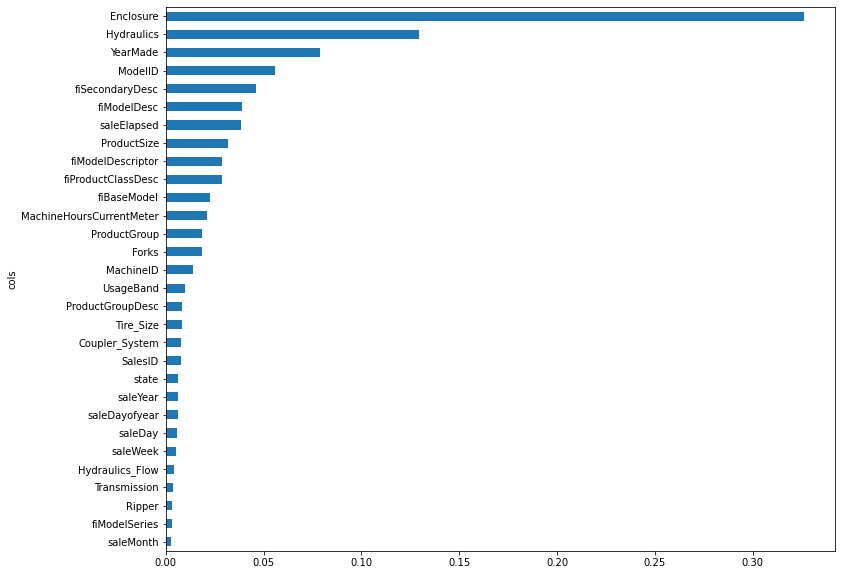

In [29]:
barh = feat_importance[:30].plot('cols', 'imp', 'barh', figsize = (12,10), legend = False)
barh = barh.invert_yaxis()
barh

#### Feature importance of the whole random forest

Each tree of the random forest carries its own feature importance along the explanatory variables (variables unseen during training simply have score 0.0). The overall feature importance of the random forest is then naturally defined as the _average, feature by feature, of the importance scores computed by each tree_.

In [30]:
feat_importance = rf_feat_importance(model, X_small)
feat_importance[:20]

,cols,imp
19,Enclosure,0.133401
37,Coupler_System,0.120500
5,YearMade,0.094892
39,Hydraulics_Flow,0.076761
14,fiProductClassDesc,0.069585
10,fiSecondaryDesc,0.056360
13,ProductSize,0.055868
2,ModelID,0.035295
38,Grouser_Tracks,0.031671
8,fiModelDesc,0.029988


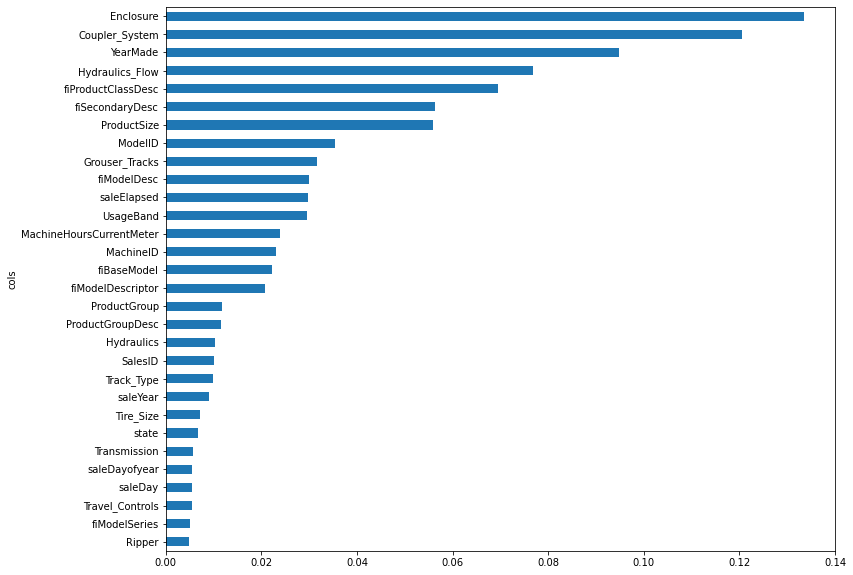

In [31]:
barh = feat_importance[:30].plot('cols', 'imp', 'barh', figsize = (12,10), legend = False)
barh = barh.invert_yaxis()
barh

#### Ablation of least important features

Least important features can be discarded before re-training the random forest, where it yields a slight improvement of the model's validation $R^2$ score :

In [32]:
to_keep = feat_importance[feat_importance.imp > 0.005].cols
len(to_keep)

28

In [34]:
feat_importance.imp

19    0.133401
37    0.120500
5     0.094892
39    0.076761
14    0.069585
        ...   
4     0.000000
62    0.000000
3     0.000000
64    0.000000
65    0.000000
Name: imp, Length: 66, dtype: float64

In [38]:
to_keep

19                   Enclosure
37              Coupler_System
5                     YearMade
39             Hydraulics_Flow
14          fiProductClassDesc
10             fiSecondaryDesc
13                 ProductSize
2                      ModelID
38              Grouser_Tracks
8                  fiModelDesc
63                 saleElapsed
7                    UsageBand
6     MachineHoursCurrentMeter
1                    MachineID
9                  fiBaseModel
12           fiModelDescriptor
16                ProductGroup
17            ProductGroupDesc
30                  Hydraulics
0                      SalesID
40                  Track_Type
51                    saleYear
35                   Tire_Size
15                       state
24                Transmission
56               saleDayofyear
54                     saleDay
48             Travel_Controls
Name: cols, dtype: object

In [39]:
# perform ablation of columns with low importance
df_keep = df[to_keep].copy()

n_total = len(df_keep)
n_valid = 12000  # same as Kaggle's test set size
n_train = n_total - n_valid
n_small = 20000

X_train_keep, X_valid_keep = split_vals(df_keep, n_train)
y_train, y_valid = split_vals(y, n_train)

X_small_keep, _ = split_vals(df_keep, n_small)
y_small, _ = split_vals(y, n_small)

print('Number of small training data points: X = {}, y = {}'.format(X_small.shape, y_small.shape))
print('Number of full training data points: X = {}, y = {}'.format(X_train.shape, y_train.shape))
print('Number of validation data points: X = {}, y = {}'.format(X_valid.shape, y_valid.shape))

Number of small training data points: X = (20000, 66), y = (20000,)
Number of full training data points: X = (389125, 66), y = (389125,)
Number of validation data points: X = (12000, 66), y = (12000,)


In [40]:
model = RandomForestRegressor(
    n_estimators = 50,
    min_samples_split = 10,
    max_features = 0.5, # default = 'auto'/None
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = 0.75, # default = None,
)

%time model.fit(X_small_keep, y_small)
print_score(model, X_small_keep, y_small, X_valid_keep, y_valid)

Wall time: 979 ms
RMSE on train set: 0.1510
RMSE on valid set: 0.3234
R^2 on train set: 0.9539
R^2 on valid set: 0.8132
R^2 on oob set: 0.8881


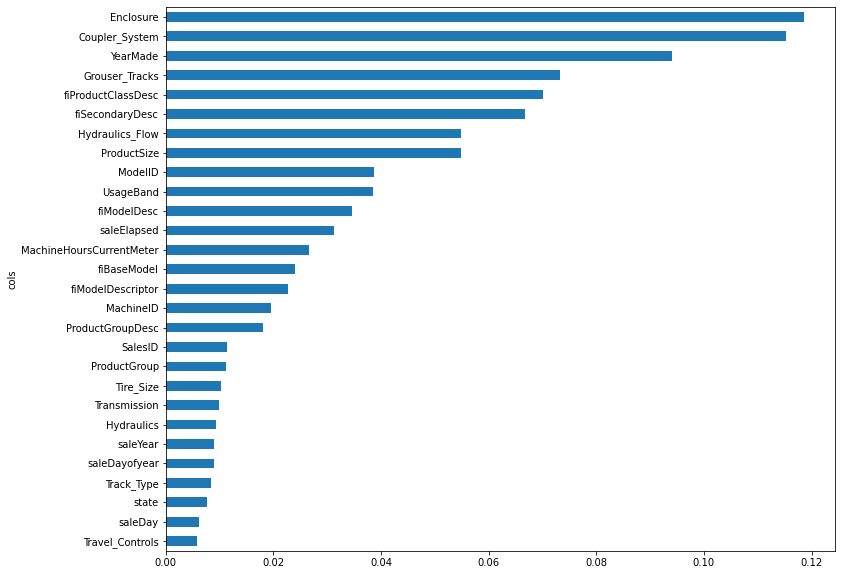

In [41]:
feat_importance = rf_feat_importance(model, X_small_keep)

barh = feat_importance.plot('cols', 'imp', 'barh', figsize = (12,10), legend = False)
barh = barh.invert_yaxis()
barh

<a id='permutation_feature_importance'></a>

### $\bullet$ Permutation importance

[Back to top](#plan)

Permutation feature importance is a model inspection technique that can be used for any fitted estimator, and is not restricted to Random Forests. This is especially useful for non-linear or opaque estimators.


The permutation feature importance is defined to be the decrease in a model score when a single feature value is randomly shuffled. This procedure breaks the relationship between the feature and the target, thus the drop in the model score is indicative of how much the model depends on the feature. Precisely, the `permutation_importance` function takes as input a fitted model and a validation set $\mathcal{D}$ with $d$ features, and compute the reference $R^2$ score sc of the model on this dataset. It then loops over a predefined number $k$ of repetitions, where during each loop $i$ a set of $d$ copies of the data are created, with in each copy $\mathcal{D}_{i, j}$ having feature $j$ being randomly shuffled (aka the term _permutation_). The $R^2$ score of the model is then computed on each of these corrupted copies of $\mathcal{D}$, yielding a set $\text{sc}_{i, j}$ of scores. The resulting importance score of each feature $j$ is then given by 

$$ \text{sc}_j = \text{sc} - \frac{1}{k}\sum_{i}\text{sc}_{i, j}$$


The importance of a feature is then higher as the model score decreases after corrupting this feature.
 


As for Random Forests impurity-based feature importance, feature importance based on permutation is of value only for good models (not overfitted and with descent cross-validated score), and does not reflect to the intrinsic predictive value of a feature by itself, but how important this feature is for a particular model.


See more on [scikit-learn documentation](https://scikit-learn.org/stable/modules/permutation_importance.html#permutation-importance)

In [42]:
model = RandomForestRegressor(
    n_estimators = 50,
    min_samples_split = 10,
    max_features = 0.5, # default = 'auto'/None
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = 0.75, # default = None,
)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

Wall time: 1.29 s
RMSE on train set: 0.1486
RMSE on valid set: 0.3271
R^2 on train set: 0.9554
R^2 on valid set: 0.8090
R^2 on oob set: 0.8885


In [43]:
result = permutation_importance(
    model, 
    X_valid, 
    y_valid, 
    n_repeats = 10,
    random_state = 42, n_jobs = -1,
)
sorted_idx = result.importances_mean.argsort()

In [44]:
result

{'importances_mean': array([-0.     ,  0.00872,  0.02236,  0.     ,  0.     ,  0.21217,  0.00425, -0.00113,  0.02141,  0.0158 ,
         0.08312,  0.0032 ,  0.02148,  0.13096,  0.07837, -0.00002,  0.00667,  0.00579,  0.00219,  0.12281,
        -0.00046,  0.00084, -0.00016,  0.00027,  0.00456,  0.00046,  0.00021,  0.0009 ,  0.00018,  0.00035,
         0.00504,  0.0001 ,  0.00413,  0.00058,  0.00013,  0.00743, -0.00039,  0.18014,  0.01678,  0.06551,
         0.01207,  0.00288,  0.00371,  0.00027,  0.00066,  0.00023,  0.00017,  0.0005 ,  0.00074,  0.00009,
         0.00019,  0.00016, -0.00027, -0.00051,  0.00004, -0.00004, -0.00058, -0.     ,  0.00001,  0.00003,
         0.     ,  0.     , -0.     , -0.00007,  0.     , -0.     ]),
 'importances_std': array([0.     , 0.00034, 0.00053, 0.     , 0.     , 0.00363, 0.00031, 0.00053, 0.00046, 0.00046, 0.00113,
        0.00021, 0.00059, 0.00221, 0.00148, 0.0002 , 0.00026, 0.00018, 0.00011, 0.00181, 0.00006, 0.00006,
        0.00005, 0.00007, 0.0

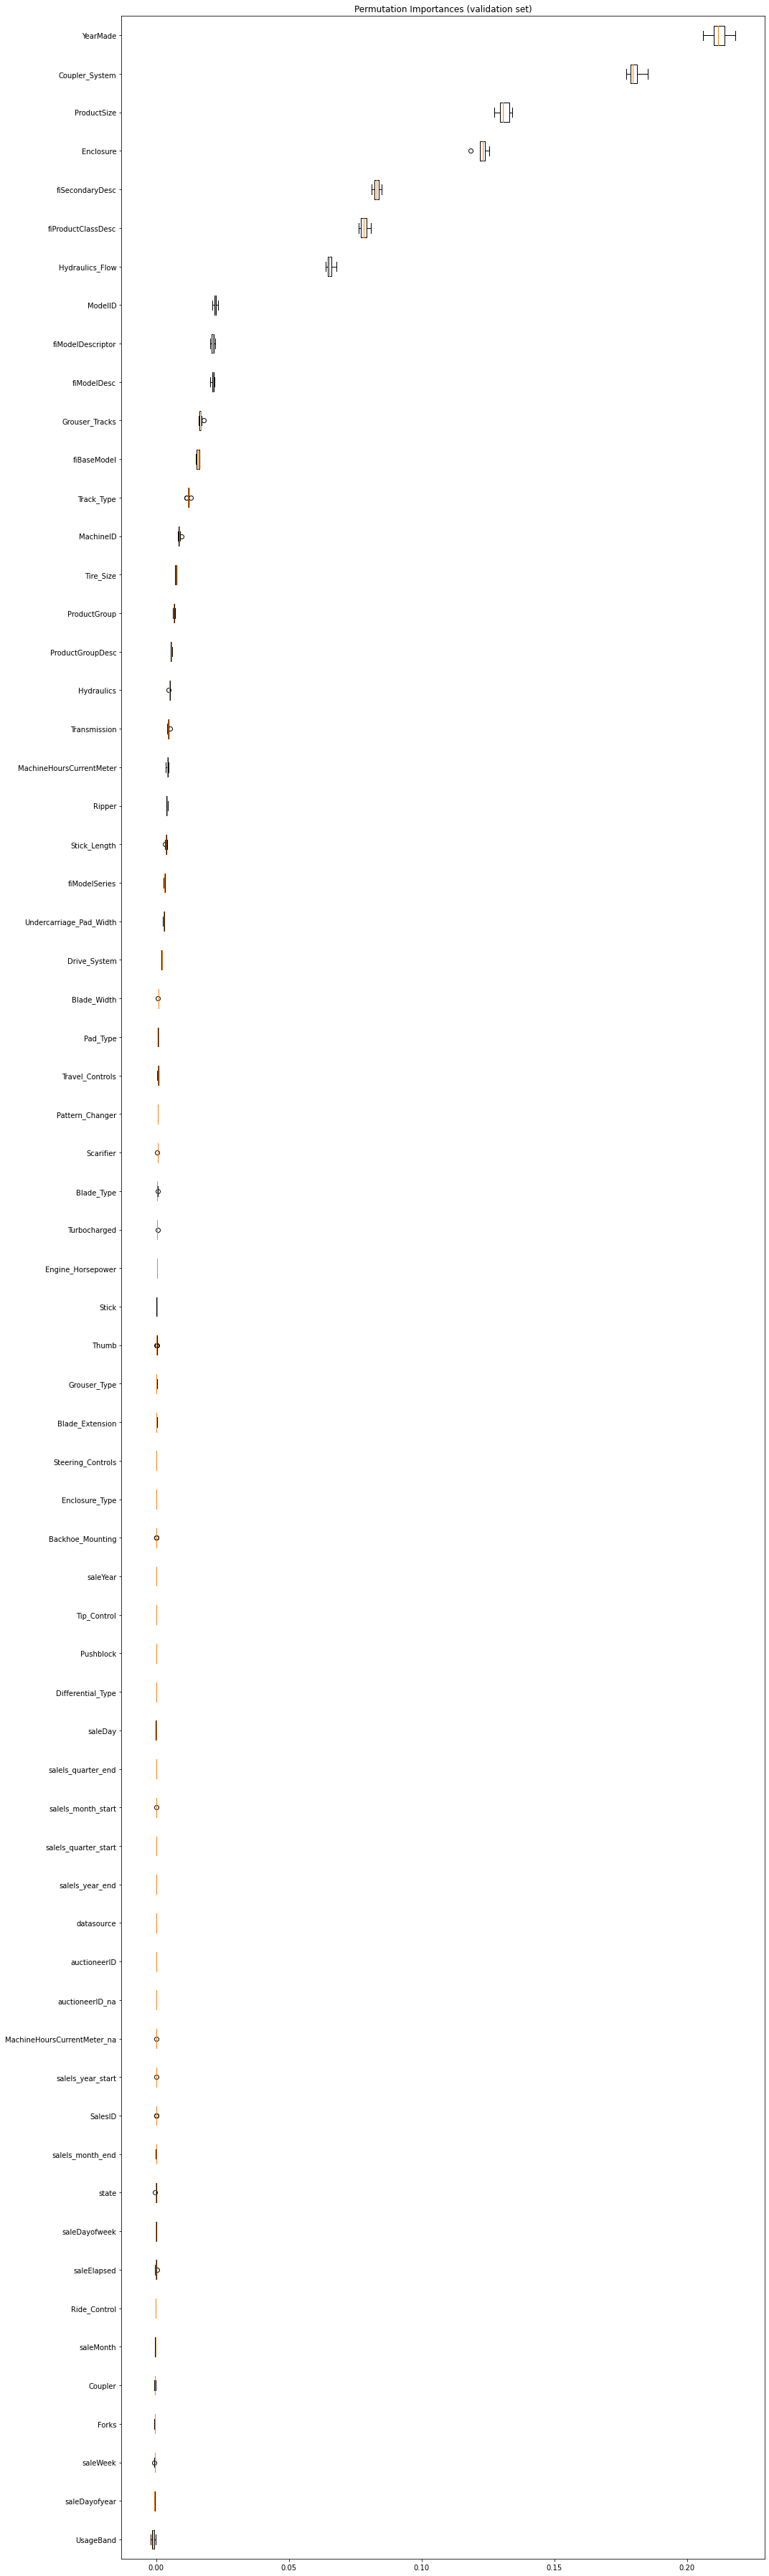

In [46]:
fig, ax = plt.subplots(figsize = (15, 50))
ax.boxplot(
    result.importances[sorted_idx].T,
    vert = False, 
    labels = X_valid.columns[sorted_idx],
)
ax.set_title("Permutation Importances (validation set)")
fig.tight_layout()
plt.show()

#### Ablation of least important features

Least important features can be discarded before re-training the random forest, where it yields a **notable improvement** of the model's validation $R^2$ score :

In [47]:
bool_filter = result.importances_mean > 0.005
bool_filter

array([False,  True,  True, False, False,  True, False, False,  True,  True,  True, False,  True,  True,
        True, False,  True,  True, False,  True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False, False])

In [48]:
to_keep = df.columns[bool_filter]

df_keep = df[to_keep].copy()

n_total = len(df_keep)
n_valid = 12000  # same as Kaggle's test set size
n_train = n_total - n_valid
n_small = 20000

X_train_keep, X_valid_keep = split_vals(df_keep, n_train)
y_train, y_valid = split_vals(y, n_train)

X_small_keep, _ = split_vals(df_keep, n_small)
y_small, _ = split_vals(y, n_small)

print('Number of small training data points: X = {}, y = {}'.format(X_small.shape, y_small.shape))
print('Number of full training data points: X = {}, y = {}'.format(X_train.shape, y_train.shape))
print('Number of validation data points: X = {}, y = {}'.format(X_valid.shape, y_valid.shape))

Number of small training data points: X = (20000, 66), y = (20000,)
Number of full training data points: X = (389125, 66), y = (389125,)
Number of validation data points: X = (12000, 66), y = (12000,)


In [49]:
model = RandomForestRegressor(
    n_estimators = 50,
    min_samples_split = 10,
    max_features = 0.5, # default = 'auto'/None
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = 0.75, # default = None,
)

%time model.fit(X_small_keep, y_small)
print_score(model, X_small_keep, y_small, X_valid_keep, y_valid)

Wall time: 1.14 s
RMSE on train set: 0.1981
RMSE on valid set: 0.2946
R^2 on train set: 0.9207
R^2 on valid set: 0.8450
R^2 on oob set: 0.8509


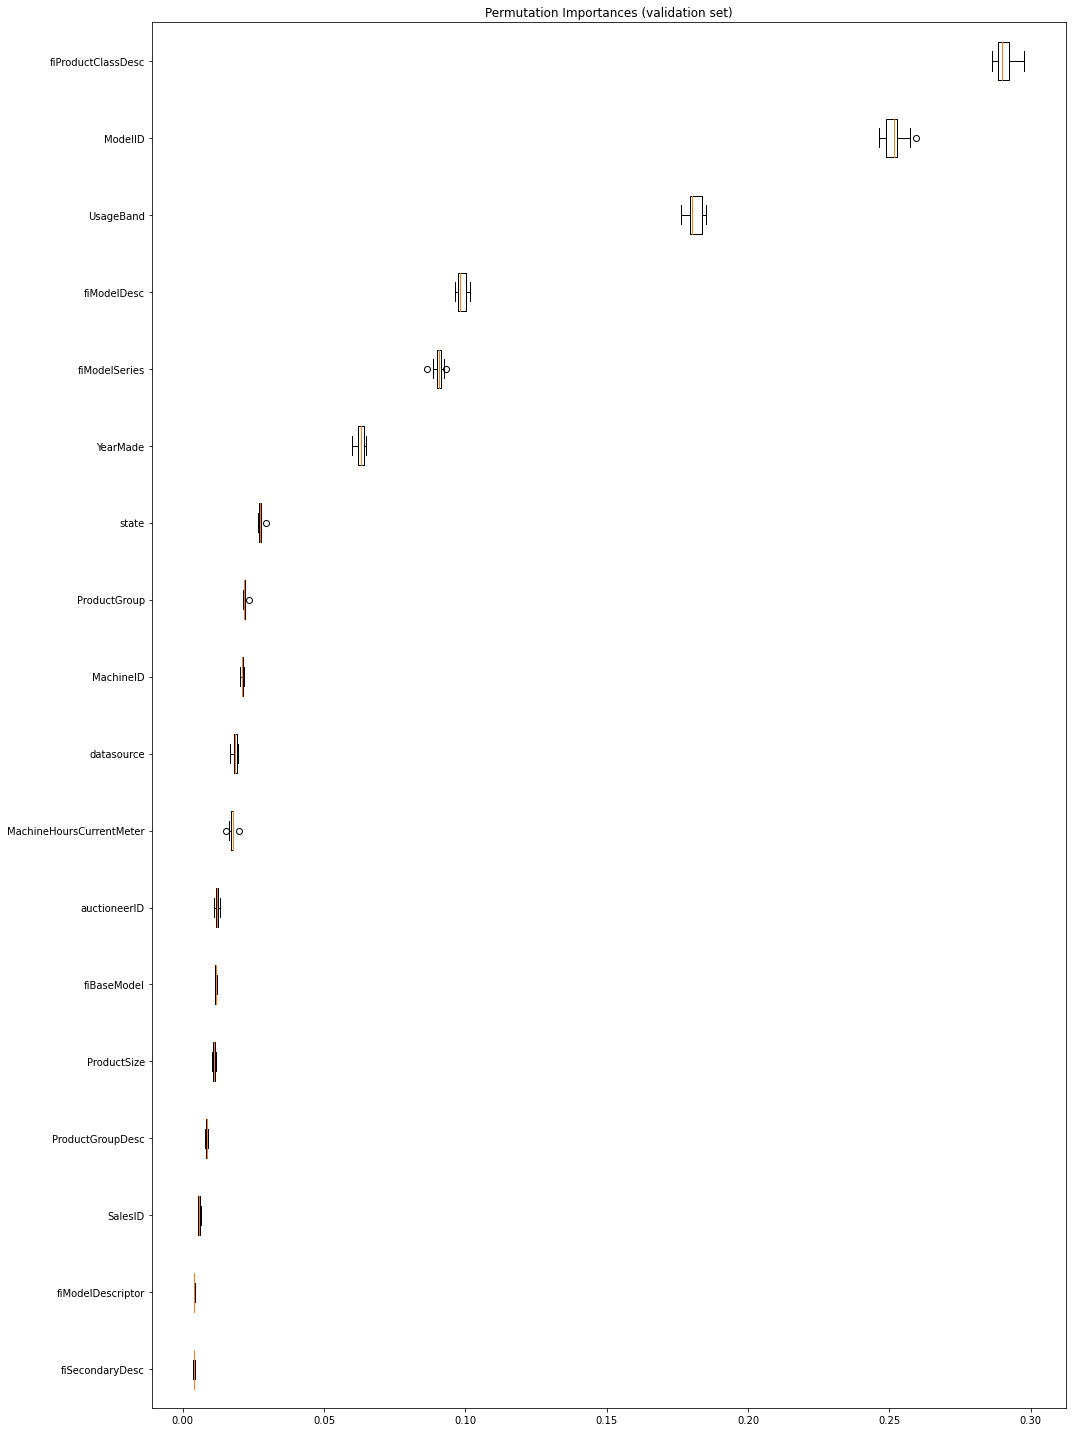

In [50]:
result = permutation_importance(
    model, 
    X_valid_keep, 
    y_valid, 
    n_repeats = 10,
    random_state = 42, n_jobs = -1,
)
sorted_idx = result.importances_mean.argsort()

# plot boxplot
fig, ax = plt.subplots(figsize = (15, 20))
ax.boxplot(
    result.importances[sorted_idx].T,
    vert = False, 
    labels = X_valid.columns[sorted_idx],
)
ax.set_title("Permutation Importances (validation set)")
fig.tight_layout()
plt.show()

#### Ablation after training on full data

Such ablation may hurt performance when the training (and validation) data is abundent :

In [51]:
model = RandomForestRegressor(
    n_estimators = 50,
    max_depth = 15,
    min_samples_split = 10,
    max_features = 0.5, # default = 'auto'/None
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = 0.75, # default = None,
)

%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_valid, y_valid)

Wall time: 55.3 s
RMSE on train set: 0.2070
RMSE on valid set: 0.2451
R^2 on train set: 0.9105
R^2 on valid set: 0.8927
R^2 on oob set: 0.8920


In [52]:
result = permutation_importance(
    model, 
    X_valid, 
    y_valid, 
    n_repeats = 5,
    random_state = 42, 
    n_jobs = -1,
)
sorted_idx = result.importances_mean.argsort()

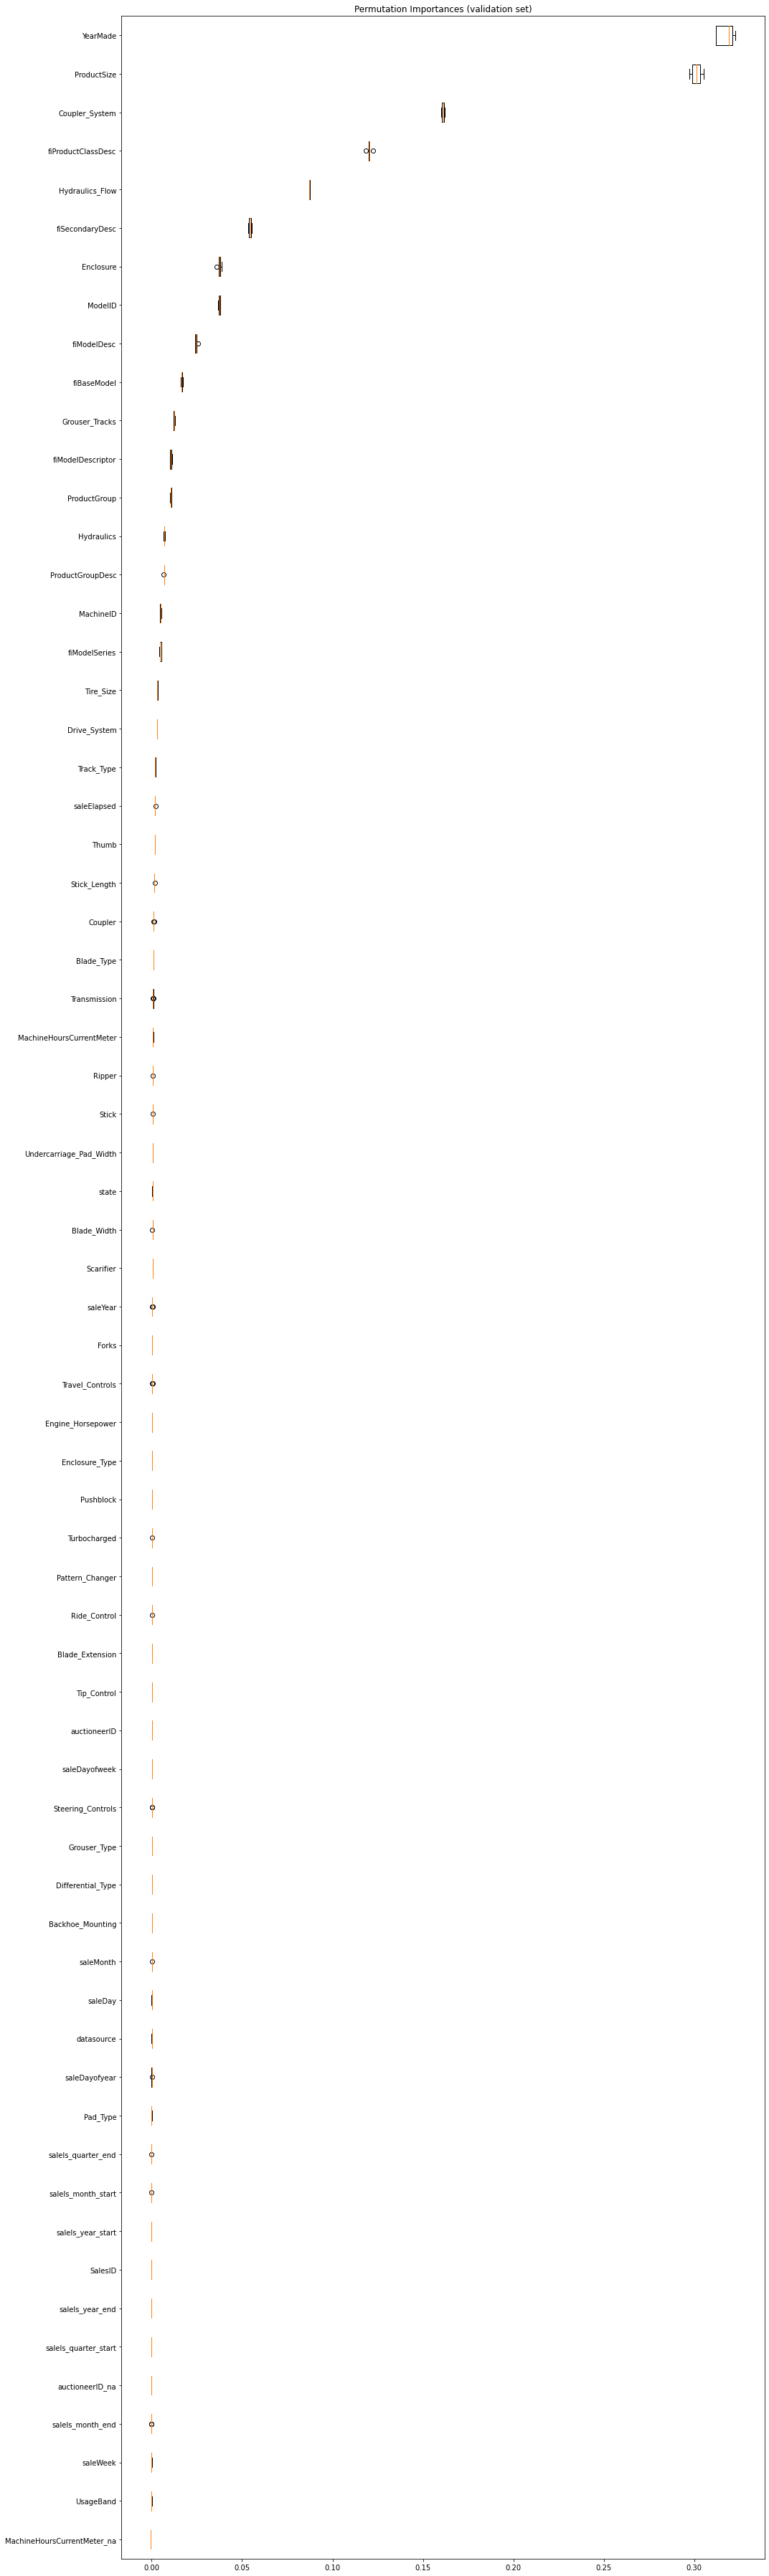

In [53]:
fig, ax = plt.subplots(figsize = (15, 50))
ax.boxplot(
    result.importances[sorted_idx].T,
    vert = False, 
    labels = X_valid.columns[sorted_idx],
)
ax.set_title("Permutation Importances (validation set)")
fig.tight_layout()
plt.show()

In [54]:
bool_filter = result.importances_mean > 0.005
to_keep = df.columns[bool_filter]

df_keep = df[to_keep].copy()

n_total = len(df_keep)
n_valid = 12000  # same as Kaggle's test set size
n_train = n_total - n_valid
n_small = 20000

X_train_keep, X_valid_keep = split_vals(df_keep, n_train)
y_train, y_valid = split_vals(y, n_train)

X_small_keep, _ = split_vals(df_keep, n_small)
y_small, _ = split_vals(y, n_small)

print('Number of small training data points: X = {}, y = {}'.format(X_small.shape, y_small.shape))
print('Number of full training data points: X = {}, y = {}'.format(X_train.shape, y_train.shape))
print('Number of validation data points: X = {}, y = {}'.format(X_valid.shape, y_valid.shape))

Number of small training data points: X = (20000, 66), y = (20000,)
Number of full training data points: X = (389125, 66), y = (389125,)
Number of validation data points: X = (12000, 66), y = (12000,)


In [55]:
model = RandomForestRegressor(
    n_estimators = 50,
    max_depth = 15,
    min_samples_split = 10,
    max_features = 0.5, # default = 'auto'/None
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = 0.75, # default = None,
)

%time model.fit(X_train_keep, y_train)
print_score(model, X_train_keep, y_train, X_valid_keep, y_valid)

Wall time: 13.4 s
RMSE on train set: 0.2956
RMSE on valid set: 0.2840
R^2 on train set: 0.8174
R^2 on valid set: 0.8559
R^2 on oob set: 0.8062


In [56]:
# default is cv = 5
scores = cross_val_score(model, X_small_keep, y_small, cv = 5, n_jobs = -1)

print(scores)
print("r2 is {:.3f} with a standard deviation of {:.3f}".format(scores.mean(), scores.std()))

[0.83642 0.84404 0.82084 0.85428 0.80097]
r2 is 0.831 with a standard deviation of 0.019


<a id='redundant_features'></a>

### $\bullet$ Feature correlations

[Back to top](#plan)

If one computes permutation importance of features when some collinearity occurs, corrupting one feature will have little effect on the models performance because it can get the same information from a correlated feature. Because of that, the permutation importance will show that none of the features are important, which is in contradiction with a high validation that shows that some feature must be important. One approach to handling multicollinearity is by performing hierarchical clustering on the features’ Spearman rank-order correlations, picking a threshold, and keeping a single feature from each cluster.

In [57]:
# something is weird with this column
cols = df.columns.tolist()
cols.index('saleIs_year_start')

62

In [58]:
# something is weird with this column
cols = df.columns.tolist()
cols.remove('saleIs_year_start')
cols

['SalesID',
 'MachineID',
 'ModelID',
 'datasource',
 'auctioneerID',
 'YearMade',
 'MachineHoursCurrentMeter',
 'UsageBand',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls',
 'saleYear',
 'saleMonth',
 'saleWeek',
 'saleDay',
 'saleDayofweek',
 'saleDayofyear',
 'saleIs_month_end',
 'saleIs_month_start',
 'saleIs_q

We compute the Spearman rank-order correlation matrix of the explainatory variables using the `scipy` package. Each coefficient is a measure of the monotonicity of the relationship between two columns : it varies between -1 and +1, with 0 implying no correlation and correlations of -1 or +1 implying an exact monotonic relationship. Positive correlations imply that as x increases, so does y, whereas negative correlations imply that as x increases, y decreases.

In [59]:
len(df.columns)

66

In [60]:
corr = np.round(scipy.stats.spearmanr(df[cols]).correlation, 4)
corr.size

4225

[Text(0, -1.0, ''),
 Text(0, 0.0, 'Transmission'),
 Text(0, 1.0, 'Turbocharged'),
 Text(0, 2.0, 'Blade_Extension'),
 Text(0, 3.0, 'Blade_Width'),
 Text(0, 4.0, 'Enclosure_Type'),
 Text(0, 5.0, 'Engine_Horsepower'),
 Text(0, 6.0, 'Hydraulics'),
 Text(0, 7.0, 'Pushblock'),
 Text(0, 8.0, '')]

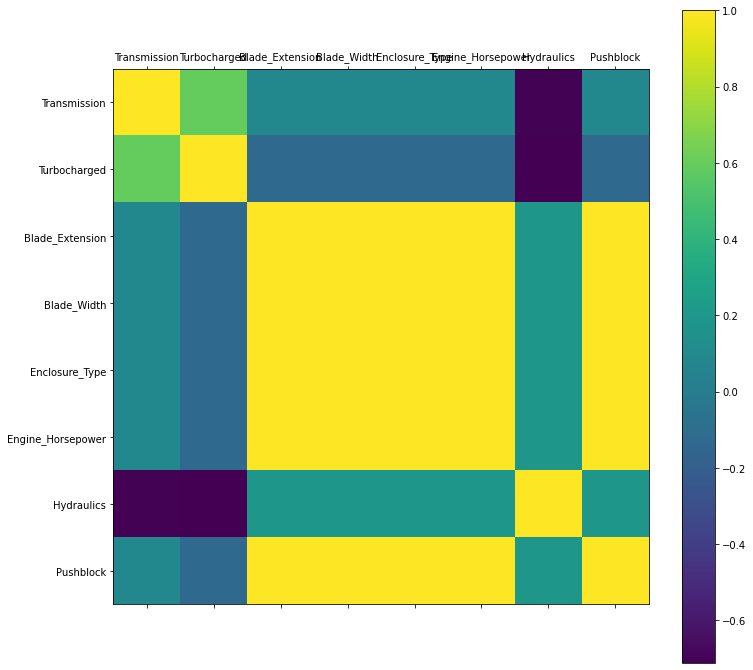

In [61]:
col_small = [
    'Transmission',
    'Turbocharged',
    'Blade_Extension',
    'Blade_Width',
    'Enclosure_Type',
    'Engine_Horsepower',
    'Hydraulics',
    'Pushblock',
]
corr_small = np.round(scipy.stats.spearmanr(df[col_small]).correlation, 4)
corr_small.size

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
cax = ax.matshow(corr_small)

fig.colorbar(cax)

ax.set_xticklabels([''] + col_small)
ax.set_yticklabels([''] + col_small)


In [63]:
corr.shape


(65, 65)

In [64]:
# corr with size = (65, 65) -> corr_condensed with size (65 * 64)/2
corr_condensed = hierarchy.distance.squareform(1 - corr)
corr_condensed.size

2080

In [61]:
(65 * 64)/2

2080.0

In [66]:
corr_condensed.shape


(2080,)

In [67]:
corr_linkage = hierarchy.linkage(corr_condensed, method = 'average')

In [68]:
corr_linkage

array([[ 16.     ,  17.     ,   0.     ,   2.     ],
       [ 26.     ,  29.     ,   0.0001 ,   2.     ],
       [  8.     ,   9.     ,   0.0003 ,   2.     ],
       [ 28.     ,  66.     ,   0.00035,   3.     ],
       [ 38.     ,  39.     ,   0.0005 ,   2.     ],
       [ 31.     ,  68.     ,   0.0005 ,   4.     ],
       [ 34.     ,  70.     ,   0.0007 ,   5.     ],
       [ 27.     ,  71.     ,   0.00086,   6.     ],
       [ 33.     ,  72.     ,   0.00112,   7.     ],
       [ 49.     ,  50.     ,   0.0012 ,   2.     ],
       [ 37.     ,  69.     ,   0.00185,   3.     ],
       [ 51.     ,  62.     ,   0.0024 ,   2.     ],
       [ 53.     ,  56.     ,   0.0024 ,   2.     ],
       [ 21.     ,  25.     ,   0.0025 ,   2.     ],
       [ 52.     ,  77.     ,   0.00605,   3.     ],
       [  6.     ,   7.     ,   0.0061 ,   2.     ],
       [ 44.     ,  45.     ,   0.0078 ,   2.     ],
       [ 23.     ,  78.     ,   0.008  ,   3.     ],
       [ 46.     ,  48.     ,   0.0082 ,   2. 

In [121]:
corr_linkage.shape


(64, 4)

In [62]:
help(hierarchy.linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.
    
    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents t

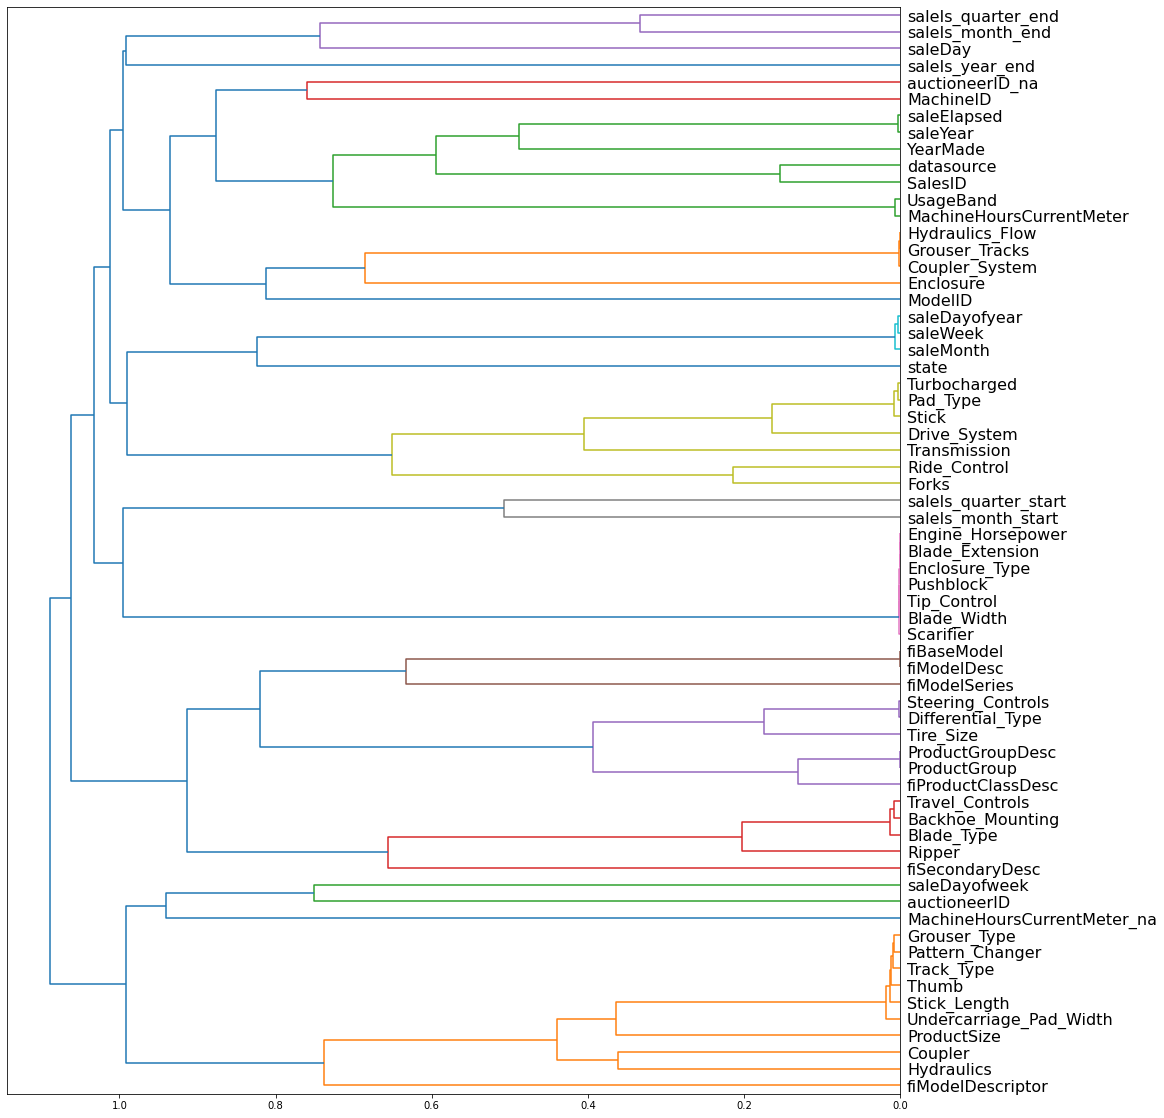

In [69]:


# compute plot
fig = plt.figure(figsize = (16,20))
dendrogram = hierarchy.dendrogram(
    corr_linkage, 
    labels = cols, 
    orientation = 'left', 
    leaf_font_size = 16,
)
plt.show()

In [70]:
from collections import defaultdict

In [71]:
# compute hierarchical clustering
threshold = 0.1
cluster_ids = hierarchy.fcluster(corr_linkage, threshold, criterion = 'distance')

In [72]:
cluster_ids

array([32, 36, 30, 33,  6, 35, 31, 31, 16, 16, 11, 17,  5,  4, 13, 27, 12, 12, 24, 29, 21, 23, 22, 23, 25,
       23, 18, 18, 18, 18,  1, 18, 10, 18, 18, 15,  2, 28, 28, 28,  3,  3,  3,  3,  3,  3,  9,  9,  9, 14,
       14, 34, 26, 26, 40,  7, 26, 38, 19, 39, 20, 41, 34, 37,  8], dtype=int32)

In [73]:
# reshape clustering as {cluster_index : feature_index}
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)

In [68]:
cluster_id_to_feature_ids

defaultdict(list,
            {32: [0],
             36: [1],
             30: [2],
             33: [3],
             6: [4],
             35: [5],
             31: [6, 7],
             16: [8, 9],
             11: [10],
             17: [11],
             5: [12],
             4: [13],
             13: [14],
             27: [15],
             12: [16, 17],
             24: [18],
             29: [19],
             21: [20],
             23: [21, 23, 25],
             22: [22],
             25: [24],
             18: [26, 27, 28, 29, 31, 33, 34],
             1: [30],
             10: [32],
             15: [35],
             2: [36],
             28: [37, 38, 39],
             3: [40, 41, 42, 43, 44, 45],
             9: [46, 47, 48],
             14: [49, 50],
             34: [51, 62],
             26: [52, 53, 56],
             40: [54],
             7: [55],
             38: [57],
             19: [58],
             39: [59],
             20: [60],
             41: [61],
       

In [74]:
# keep only first feature for each cluster
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]

# shift feature index after 62
selected_features = [(i if i < 62 else i+1) for i in selected_features]

In [75]:
selected_features

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 8,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 18,
 19,
 20,
 21,
 22,
 24,
 26,
 30,
 32,
 35,
 36,
 37,
 40,
 46,
 49,
 51,
 52,
 54,
 55,
 57,
 58,
 59,
 60,
 61,
 64,
 65]

In [76]:
# retained set of features
selected_features = [df.columns[i] for i in selected_features]
selected_features

['SalesID',
 'MachineID',
 'ModelID',
 'datasource',
 'auctioneerID',
 'YearMade',
 'MachineHoursCurrentMeter',
 'fiModelDesc',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Transmission',
 'Blade_Extension',
 'Hydraulics',
 'Ripper',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Track_Type',
 'Backhoe_Mounting',
 'Differential_Type',
 'saleYear',
 'saleMonth',
 'saleDay',
 'saleDayofweek',
 'saleIs_month_end',
 'saleIs_month_start',
 'saleIs_quarter_end',
 'saleIs_quarter_start',
 'saleIs_year_end',
 'auctioneerID_na',
 'MachineHoursCurrentMeter_na']

In [77]:
len(selected_features)

41

#### Perform training on ablated set of features

In [78]:
df_keep = df[selected_features].copy()

n_total = len(df_keep)
n_valid = 12000  # same as Kaggle's test set size
n_train = n_total - n_valid
n_small = 20000

X_train_keep, X_valid_keep = split_vals(df_keep, n_train)
y_train, y_valid = split_vals(y, n_train)

X_small_keep, _ = split_vals(df_keep, n_small)
y_small, _ = split_vals(y, n_small)

print('Number of small training data points: X = {}, y = {}'.format(X_small.shape, y_small.shape))
print('Number of full training data points: X = {}, y = {}'.format(X_train.shape, y_train.shape))
print('Number of validation data points: X = {}, y = {}'.format(X_valid.shape, y_valid.shape))

Number of small training data points: X = (20000, 66), y = (20000,)
Number of full training data points: X = (389125, 66), y = (389125,)
Number of validation data points: X = (12000, 66), y = (12000,)


In [116]:
model = RandomForestRegressor(
    n_estimators = 50,
    max_depth = 15,
    min_samples_split = 10,
    max_features = 0.5, # default = 'auto'/None
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = 0.75, # default = None,
)

%time model.fit(X_train_keep, y_train)
print_score(model, X_train_keep, y_train, X_valid_keep, y_valid)

Wall time: 23.1 s
RMSE on train set: 0.2107
RMSE on valid set: 0.2455
R^2 on train set: 0.9072
R^2 on valid set: 0.8924
R^2 on oob set: 0.8882


The model performance does not improve. Let us now see if some features shows up as important and wasn't before due to the correlation issues :

#### Permutation of feature importance after feature selection

In [80]:
result = permutation_importance(
    model, 
    X_valid_keep, 
    y_valid, 
    n_repeats = 5,
    random_state = 42, 
    n_jobs = -1,
)
sorted_idx = result.importances_mean.argsort()

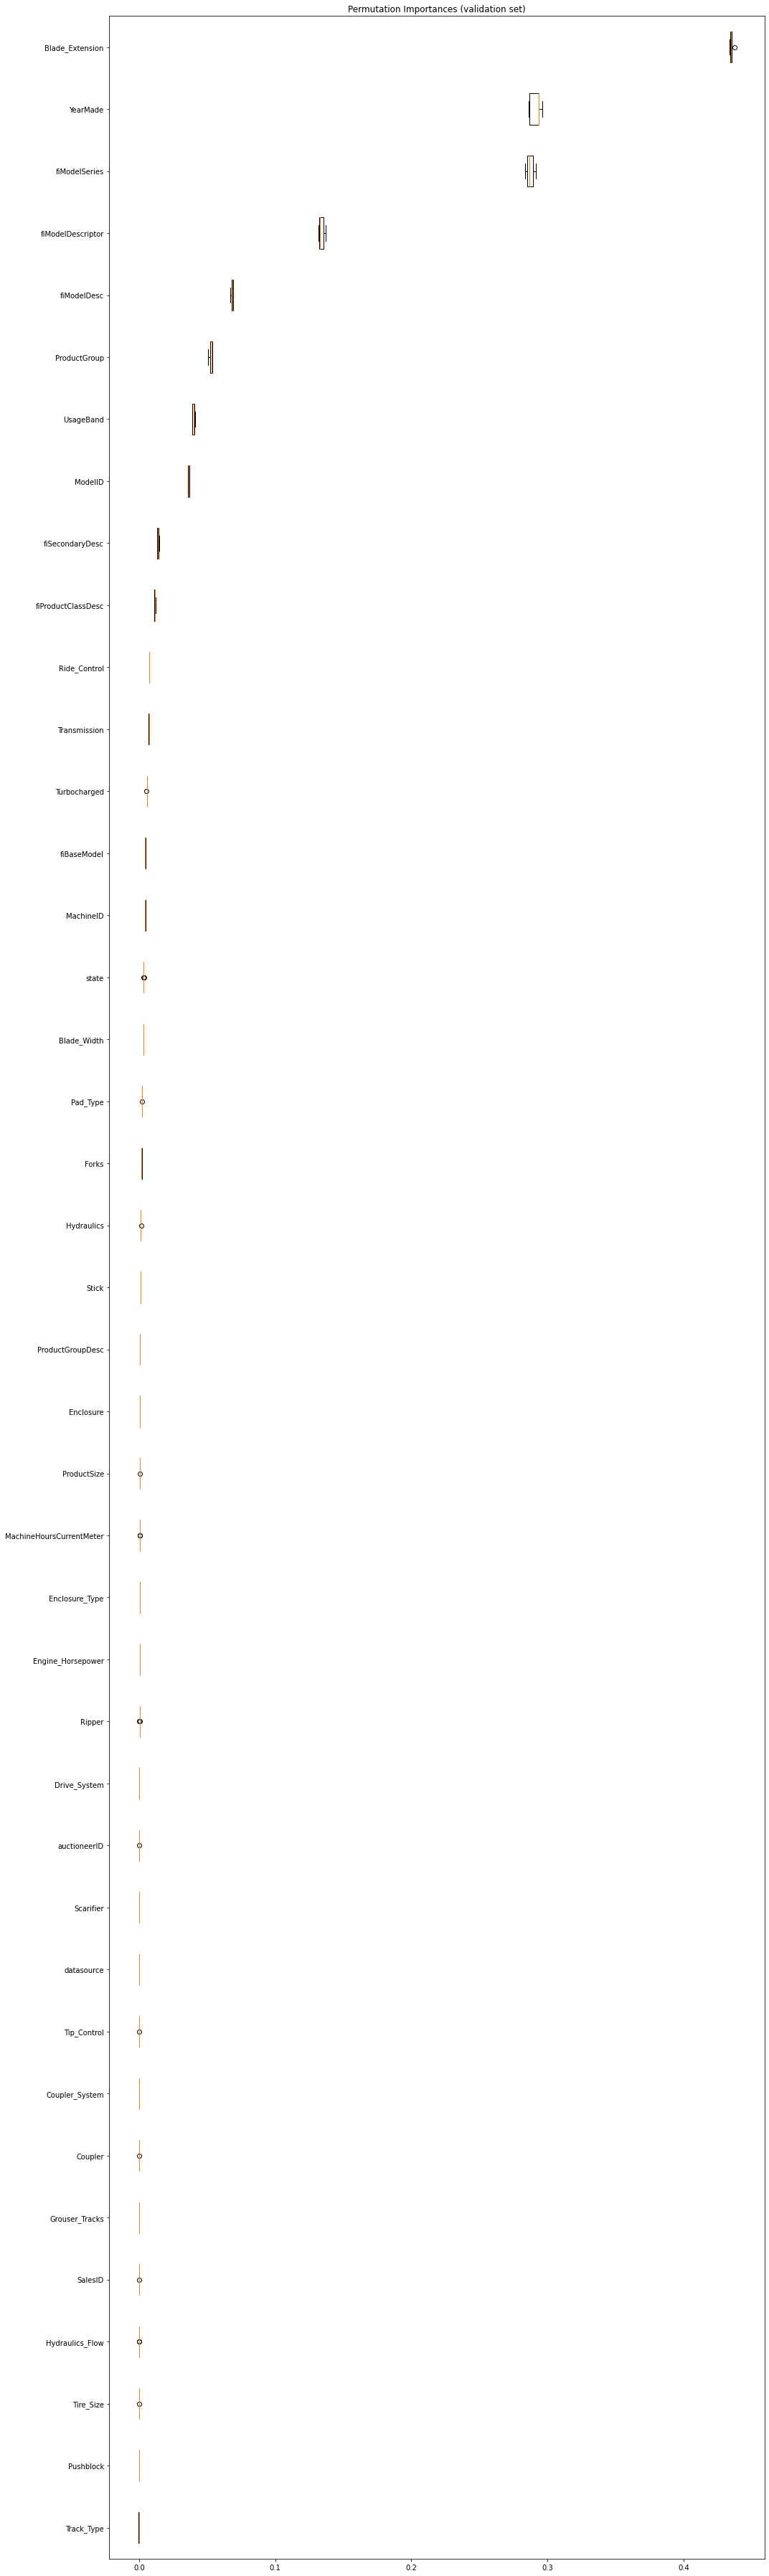

In [81]:
fig, ax = plt.subplots(figsize = (15, 50))
ax.boxplot(
    result.importances[sorted_idx].T,
    vert = False, 
    labels = X_valid.columns[sorted_idx],
)
ax.set_title("Permutation Importances (validation set)")
fig.tight_layout()
plt.show()

**Conclusion** : We now see that `Blade_Extension`overtakes `YearMade`as the most discriminant variable. This makes a lot of sense since according to the previous dendrogram this features is extremely correlated with the feature `Engine_Horsepower`, which indeed must heavily impact the sale price.

<a id='feature_explicability'></a>

### $\bullet$ Individual feature explicability

[Back to top](#plan)

installs requiered:
- `pip install plotnine`
- `conda install matplotlib=2.2.3`

#### Partial Dependance Plots of explanatory variables

In [82]:
sample = get_sample(df_raw[df_raw.YearMade > 1930], 500)

In [85]:
help(get_sample)


Help on function get_sample in module emlyon_module.structured:

get_sample(df, n)
    Gets a random sample of n rows from df, without replacement.
    Parameters:
    -----------
    df: A pandas data frame, that you wish to sample from.
    n: The number of rows you wish to sample.
    Returns:
    --------
    return value: A random sample of n rows of df.
    Examples:
    ---------
    >>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    >>> get_sample(df, 2)
       col1 col2
    1     2    b
    2     3    a



In [83]:
help(stat_smooth)

Help on class stat_smooth in module plotnine.stats.stat_smooth:

class stat_smooth(plotnine.stats.stat.stat)
 |  Calculate a smoothed conditional mean
 |  
 |  
 |  .. rubric:: Usage
 |  
 |  ::
 |  
 |      stat_smooth(mapping=None, data=None, geom='smooth', position='identity',
 |                  na_rm=False, se=True, level=0.95, n=80, method='auto', span=0.75,
 |                  fullrange=False, method_args={}, formula=None, **kwargs)
 |  
 |  Only the ``mapping`` and ``data`` can be positional, the rest must
 |  be keyword arguments. ``**kwargs`` can be aesthetics (or parameters)
 |  used by the ``geom``.
 |  
 |  
 |  Parameters
 |  ----------
 |  mapping : aes, optional
 |      Aesthetic mappings created with :meth:`~plotnine.aes`. If specified and :py:`inherit.aes=True`, it is combined with the default mapping for the plot. You must supply mapping if there is no plot mapping.
 |      
 |      ========= =========
 |      Aesthetic Default value
 |      ========= =========
 |   

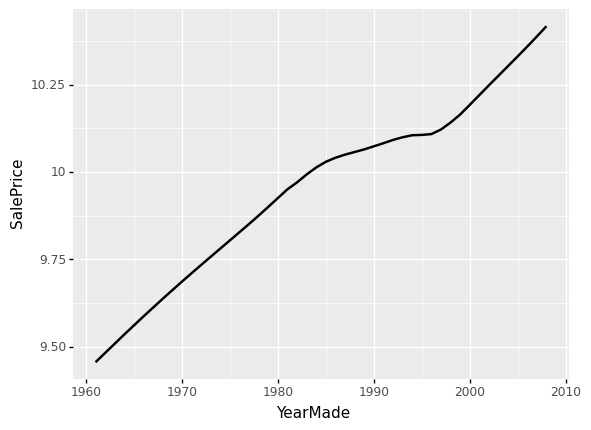

<ggplot: (116906084251)>

In [84]:
plot = ggplot(sample, aes('YearMade', 'SalePrice')) + stat_smooth(se = True, method = 'auto')
plot

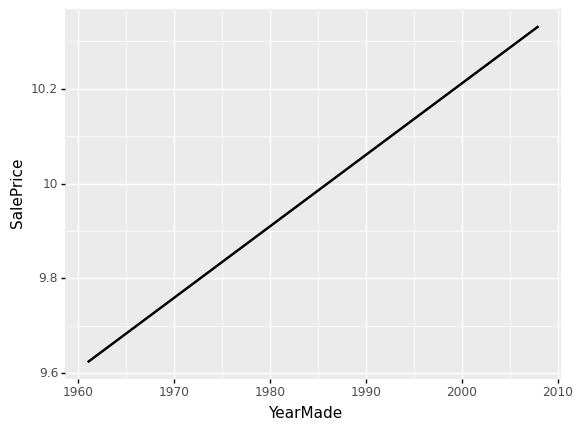

<ggplot: (-9223371919948450637)>

In [122]:
plottest = ggplot(sample, aes('YearMade', 'SalePrice')) + stat_smooth(se = False, method = 'lm')
plottest

In [92]:
plottest = stat_smooth(sample, aes(x='YearMade', y='SalePrice') , se = True, method = 'auto')
plottest

#### Individual Conditional Expectation plots of explanatory variables


Individual Conditional Expectation (ICE) plots display one line per instance that shows how the instance's prediction changes when a feature changes. The values for a line (and one instance) can be computed by keeping all other features the same, creating variants of this instance by replacing the feature's value with values from a grid and making predictions with the black box model for these newly created instances. The result is a set of points for an instance with the feature value from the grid and the respective predictions. An ICE plot is more precise than a partial dependence plot as the latter does not focus on specific instances, but on an overall average, which can obscure a heterogeneous relationship created by interactions.

See more on ICE plots [here](https://christophm.github.io/interpretable-ml-book/ice.html)

In [114]:
# x = get_sample(X_train[X_train.YearMade > 1930], 500)
x = get_sample(df[df.YearMade > 1930], 500)

In [118]:
x2 = get_sample(df_keep[df_keep.YearMade > 1930], 500)

In [112]:
def plot_pdp(model, x, feat, clusters = None, feat_name = None):
    feat_name = feat_name or feat
    p = pdp.pdp_isolate(model, x, feat)
    return pdp.pdp_plot(p, feat_name, plot_lines=True,
                        cluster=clusters is not None,
                        n_cluster_centers=clusters)

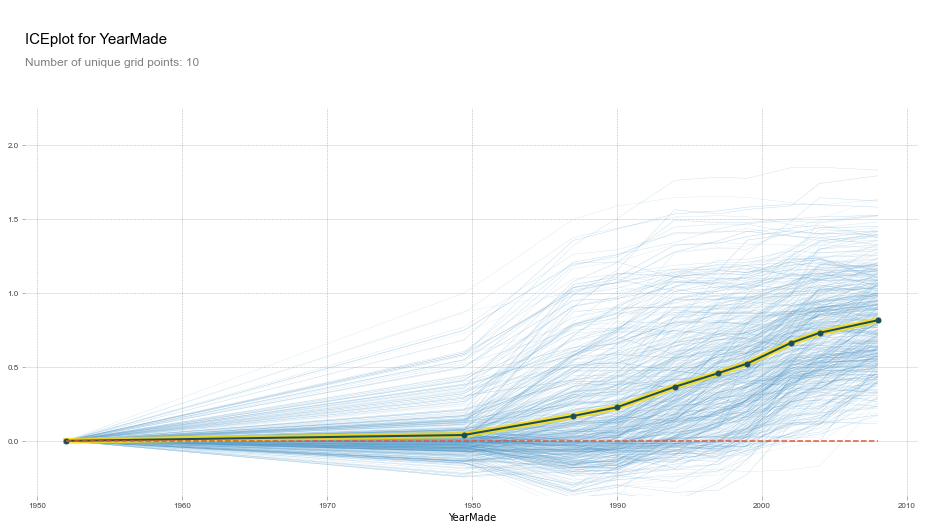

In [119]:
plot_pdp(model, x2, 'YearMade')

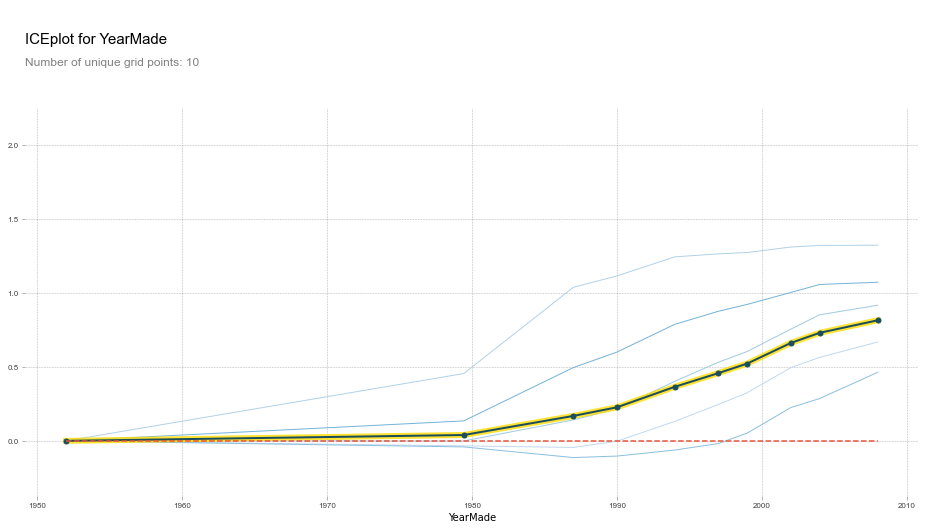

In [120]:
# cluster 500 lines into 5 clusters
plot_pdp(model, x2, 'YearMade', clusters = 5)

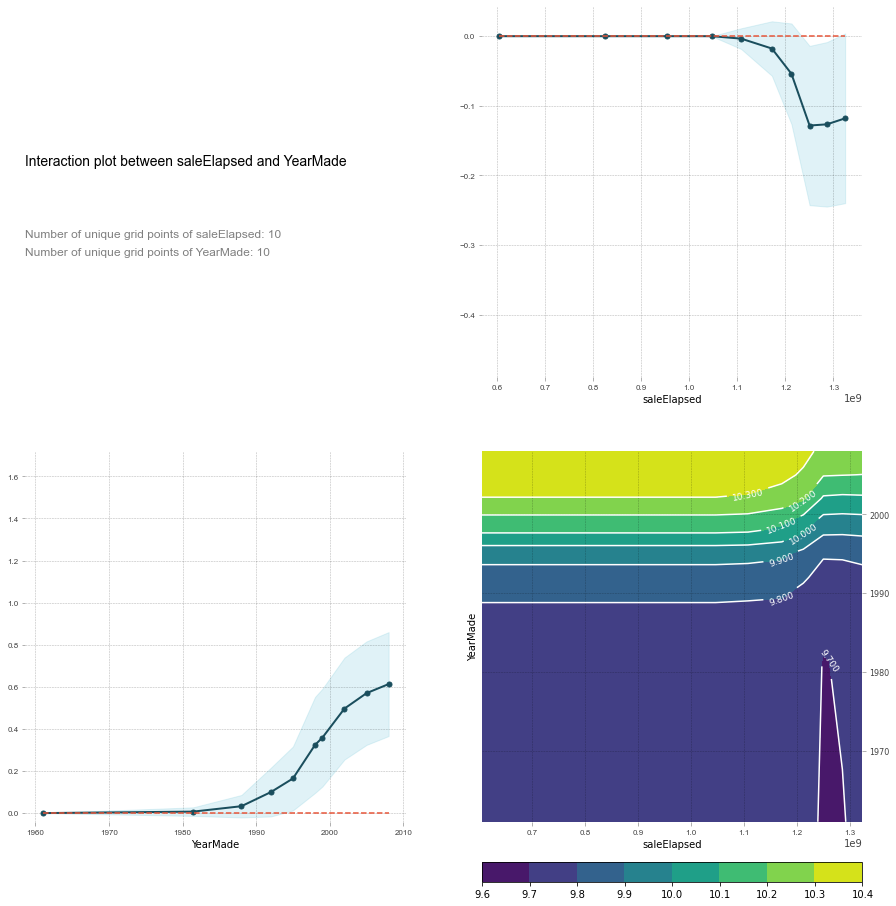

In [47]:
feats = ['saleElapsed', 'YearMade']
p = pdp.pdp_interact(model, x, feats)
pdp.pdp_interact_plot(p, feats)
# handle error of gdp_plot updates: 
# https://forums.fast.ai/t/pbpbox-error-on-pdp-interact-plot/28468/2
# in C:\Users\Jb\.conda\envs\fastai-cpu-v0.7\Lib\site-packages\pdpbox/pdp.py
# Line 1147 change 
# ax.clabel(c2, contour_label_fontsize=9, inline=1) 
# to ax.clabel(c2, fontsize=9, inline=1)

<a id='bottom'></a>

[Back to top](#plan)